In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score
import joblib
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score, precision_score, recall_score, confusion_matrix
import joblib
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier

In [2]:
# Load the dataset
file_path = r'C:\Users\d3684573\OneDrive\School\Project\Subset_Diabetes_Data.csv'
diabedf = pd.read_csv(file_path)

# Display the first few rows to confirm it loaded correctly
print(diabedf.head())
print(diabedf.describe())


   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No

The dataset contains various patient admission details and medical information. Here’s a detailed analysis of the first few rows and summary statistics of the dataset.

Data Description
Columns in the Dataset:
encounter_id: Unique identifier for each patient encounter.
patient_nbr: Unique identifier for each patient.
race: Ethnicity of the patient.
gender: Gender of the patient.
age: Age group of the patient.
weight: Weight of the patient (with some missing values).
admission_type_id: Type of admission (e.g., emergency, elective).
discharge_disposition_id: Disposition at discharge (e.g., home, transferred).
admission_source_id: Source of admission (e.g., referral, emergency room).
time_in_hospital: Duration of hospital stay.
num_lab_procedures: Number of lab procedures performed.
num_procedures: Number of procedures performed.
num_medications: Number of medications administered.
number_outpatient: Number of outpatient visits.
number_emergency: Number of emergency visits.
number_inpatient: Number of inpatient visits.
number_diagnoses: Number of diagnoses made.
citoglipton, insulin, glyburide-metformin, etc.: Various medications (Yes/No).

# Handling Missing Values

In [3]:
import os

# Replace "?" and "Unknown/Invalid" with np.nan
diabedf.replace({"?": np.nan, "Unknown/Invalid": np.nan}, inplace=True)

# Count missing values (np.nan) in each column
missing_counts = diabedf.isnull().sum()
print("Missing Value Counts:")
print(missing_counts)

# Calculate and display the percentage of missing values
missing_percentage = diabedf.isnull().sum() / len(diabedf) * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)
print("Percentage of missing values:")
print(missing_percentage)

# Remove columns with high missing values
diabedf.drop(columns=['weight', 'payer_code', 'medical_specialty'], inplace=True)

# Impute missing values for categorical features with mode
for column in ['race', 'gender', 'diag_1', 'diag_2', 'diag_3']:
    diabedf[column].fillna(diabedf[column].mode()[0], inplace=True)

# Verify missing values after imputation
print("Missing Values after Imputation:\n", diabedf.isnull().sum())


# Define the directory and file path
directory = 'C:/Users/D3684573/OneDrive/School/Project/P without PCA/'
cleaned_data_path = os.path.join(directory, 'Cleaned_Diabetes_Data_Without_PCA.csv')

# Create directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Define the directory and file path
directory = r'C:\Users\D3684573\OneDrive\School\Project\without_PCA'
cleaned_data_path = os.path.join(directory, 'Cleaned_Diabetes_Data_Without_PCA.csv')

# Create directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the cleaned data
diabedf.to_csv(cleaned_data_path, index=False)
print(f"Cleaned data saved to {cleaned_data_path}")

Missing Value Counts:
encounter_id                   0
patient_nbr                    0
race                          40
gender                         0
age                            0
weight                      1484
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
payer_code                  1499
medical_specialty            425
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
diag_1                         4
diag_2                        13
diag_3                        52
number_diagnoses               0
max_glu_serum                  0
A1Cresult                      0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide        

Analysis and Interpretation of Missing Values
Summary of Missing Values
Missing Value Counts:

payer_code: 1499 missing values (100% missing)
weight: 1484 missing values (98.999% missing)
medical_specialty: 425 missing values (28.35% missing)
diag_1: 4 missing values (0.27% missing)
diag_2: 13 missing values (0.87% missing)
diag_3: 52 missing values (3.47% missing)
race: 40 missing values (2.67% missing)
Percentage of Missing Values:

payer_code: 100.00%
weight: 98.999%
medical_specialty: 28.35%
diag_3: 3.47%
race: 2.67%
diag_2: 0.87%
diag_1: 0.27%
Missing Values After Imputation:

All columns now have 0 missing values, indicating that missing values have been handled through imputation or other methods.
Interpretation and Recommendations
High Proportion of Missing Values:

payer_code and weight have a very high proportion of missing values. The payer_code column is entirely missing, suggesting it may not be useful for analysis. The weight column is nearly fully missing, making it challenging to use in its current form.
Action:

payer_code: Consider dropping this column from the dataset as it does not contribute useful information.
weight: Investigate the reasons behind the high proportion of missing values. If feasible, derive a reasonable imputation strategy or exclude it if it is not critical for your analysis.
Moderate Missing Values:

medical_specialty has 28.35% missing values. This could affect the analysis depending on how critical this information is.

Low to Minimal Missing Values:

diag_1, diag_2, and diag_3 have low percentages of missing values (up to 3.47%). These columns should be considered for imputation to ensure completeness.
Action:

Impute these values using appropriate methods, such as the mode (most frequent value).

Post-Imputation Status:

All columns have zero missing values after imputation, which is good. 

# Exploratory Data Analysis

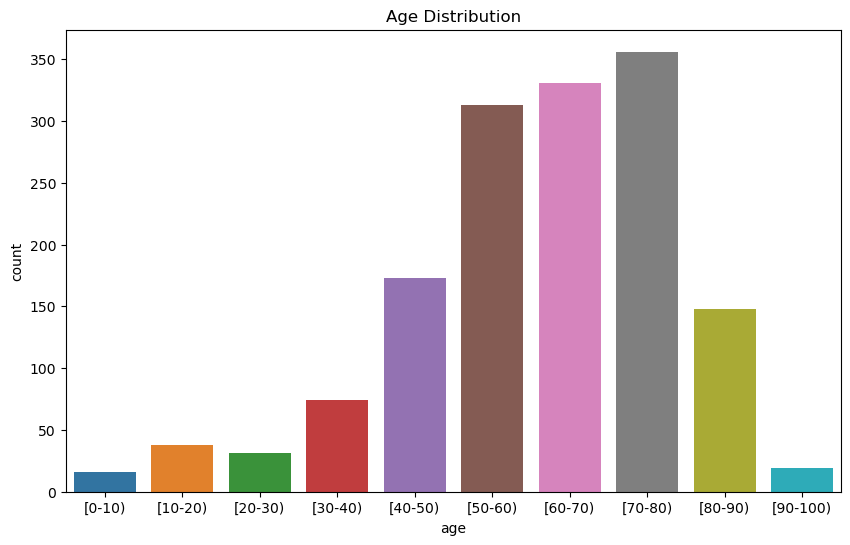

In [4]:
# Distribution of 'age' feature
plt.figure(figsize=(10, 6))
sns.countplot(x='age', data=diabedf)
plt.title('Age Distribution')
plt.show()



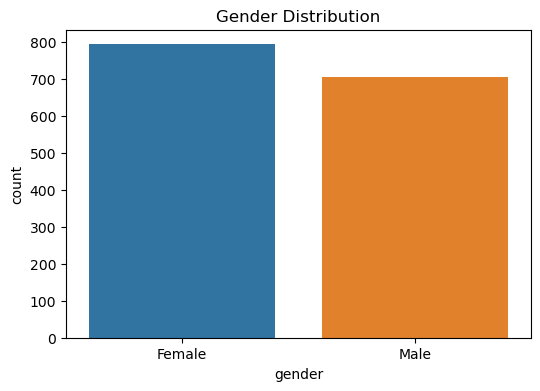

In [5]:
# Distribution of 'gender' feature
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=diabedf)
plt.title('Gender Distribution')
plt.show()



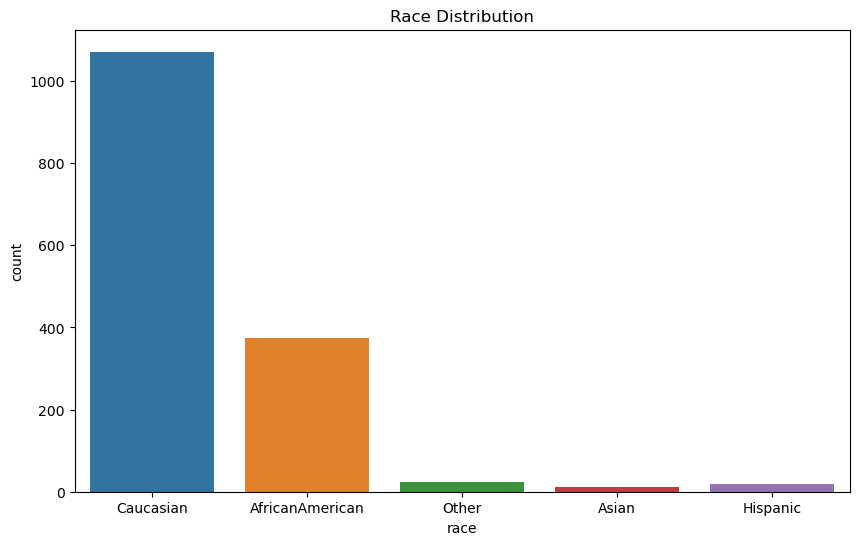

In [6]:
# Distribution of 'race' feature
plt.figure(figsize=(10, 6))
sns.countplot(x='race', data=diabedf)
plt.title('Race Distribution')
plt.show()



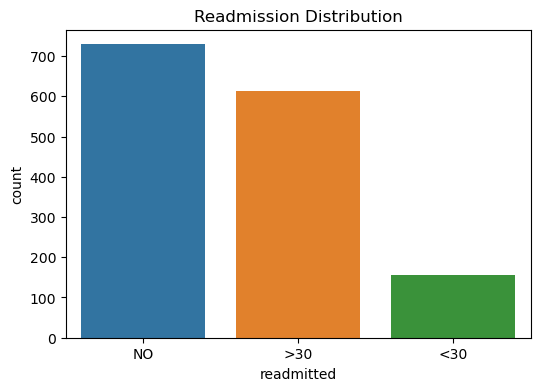

In [7]:
# Distribution of 'readmitted' feature
plt.figure(figsize=(6, 4))
sns.countplot(x='readmitted', data=diabedf)
plt.title('Readmission Distribution')
plt.show()



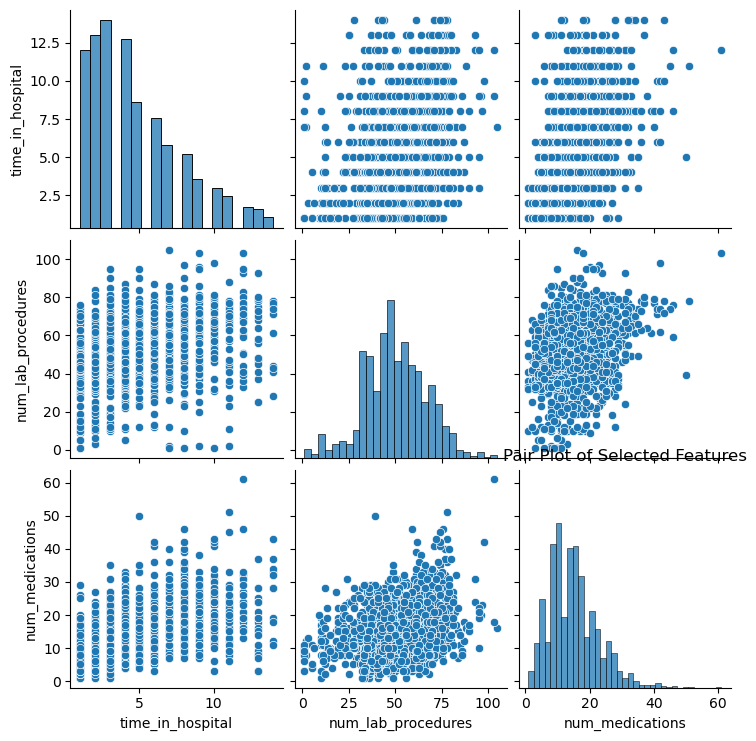

In [8]:
# Pair plot of selected features
sns.pairplot(diabedf[['age', 'time_in_hospital', 'num_lab_procedures', 'num_medications', 'readmitted']])
plt.title('Pair Plot of Selected Features')
plt.show()



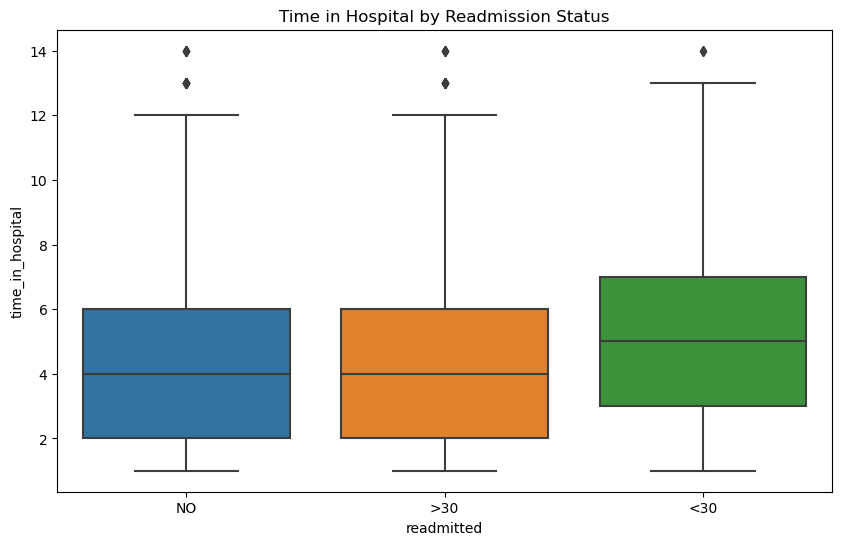

In [9]:
# Box plot for 'time_in_hospital' by 'readmitted'
plt.figure(figsize=(10, 6))
sns.boxplot(x='readmitted', y='time_in_hospital', data=diabedf)
plt.title('Time in Hospital by Readmission Status')
plt.show()


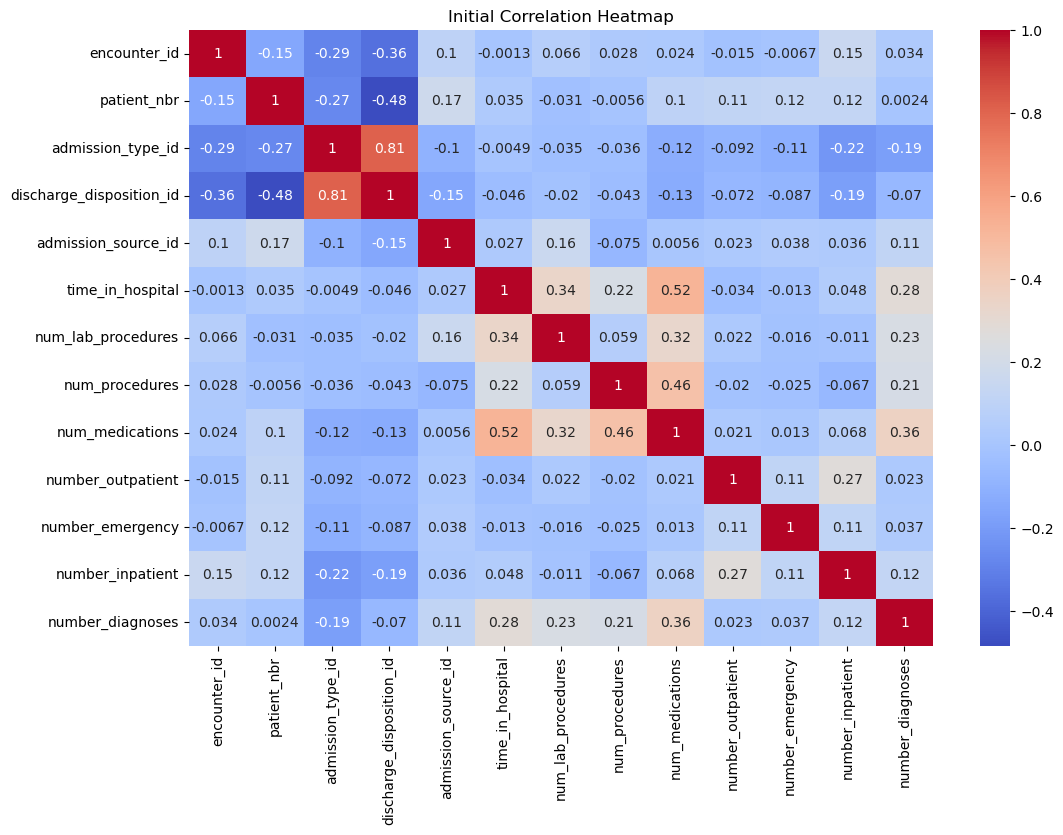

In [10]:
# Initial correlation heatmap
corr_matrix_initial = diabedf.select_dtypes(include=['int64', 'float64']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_initial, annot=True, cmap='coolwarm')
plt.title('Initial Correlation Heatmap')
plt.show()

In [11]:
# Calculate the correlation matrix for numerical features in the DataFrame
corr_matrix_initial = diabedf.select_dtypes(include=['int64', 'float64']).corr()

# Print the correlation matrix
print("Initial Correlation Matrix:")
print(corr_matrix_initial)

Initial Correlation Matrix:
                          encounter_id  patient_nbr  admission_type_id  \
encounter_id                  1.000000    -0.150416          -0.290905   
patient_nbr                  -0.150416     1.000000          -0.274243   
admission_type_id            -0.290905    -0.274243           1.000000   
discharge_disposition_id     -0.358015    -0.483701           0.812360   
admission_source_id           0.100190     0.172859          -0.099791   
time_in_hospital             -0.001349     0.035232          -0.004931   
num_lab_procedures            0.065851    -0.030949          -0.034714   
num_procedures                0.027637    -0.005611          -0.035873   
num_medications               0.023944     0.101091          -0.121100   
number_outpatient            -0.015454     0.114206          -0.091917   
number_emergency             -0.006747     0.124057          -0.113427   
number_inpatient              0.151408     0.120140          -0.222518   
number_dia

In [12]:
# Convert the readmitted column to a numerical format where 'NO' is 0 and both '<30' and '>30' are 1
# Define the mapping
mapping = {
    'NO': 0,
    '<30': 1,
    '>30': 2
}

# Apply the mapping directly to the 'readmitted' column
diabedf['readmitted'] = diabedf['readmitted'].map(mapping)

# Display the DataFrame to verify the conversion
print(diabedf[['readmitted']].head())  # Display only the 'readmitted' column to check the conversion


   readmitted
0           0
1           2
2           0
3           0
4           0


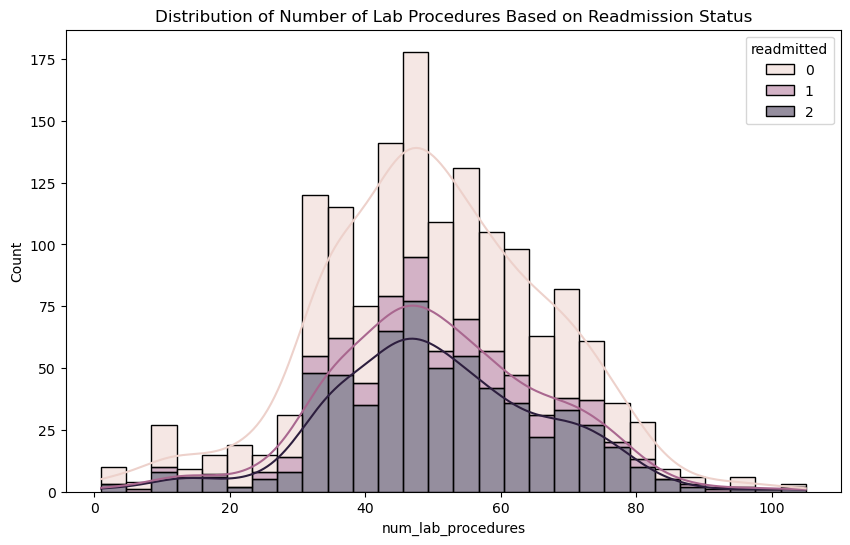

In [13]:
# Distribution of 'num_lab_procedures' based on readmission status
plt.figure(figsize=(10, 6))
sns.histplot(data=diabedf, x='num_lab_procedures', hue='readmitted', multiple='stack', kde=True)
plt.title('Distribution of Number of Lab Procedures Based on Readmission Status')
plt.show()

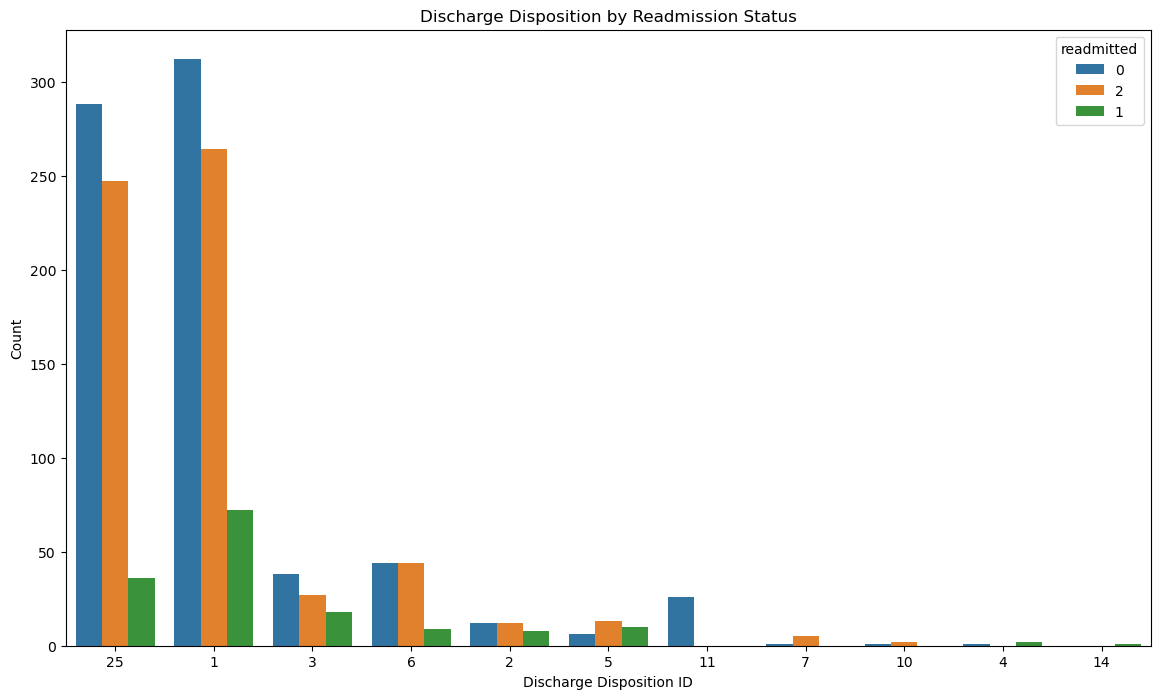

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure that 'discharge_disposition_id' and 'readmitted' are treated as categorical variables
diabedf['discharge_disposition_id'] = diabedf['discharge_disposition_id'].astype(str)
diabedf['readmitted'] = diabedf['readmitted'].astype(str)

# Discharge disposition by readmission status
plt.figure(figsize=(14, 8))
sns.countplot(x='discharge_disposition_id', hue='readmitted', data=diabedf)
plt.title('Discharge Disposition by Readmission Status')
plt.xlabel('Discharge Disposition ID')
plt.ylabel('Count')
plt.show()


In [15]:
# Convert 'discharge_disposition_id' and 'readmitted' to categorical variables
diabedf['discharge_disposition_id'] = diabedf['discharge_disposition_id'].astype(str)
diabedf['readmitted'] = diabedf['readmitted'].astype(str)

# Calculate and print the distribution of discharge dispositions by readmission status
discharge_distribution = diabedf.groupby(['discharge_disposition_id', 'readmitted']).size().unstack(fill_value=0)

# Print the distribution
print("Distribution of Discharge Dispositions by Readmission Status:")
print(discharge_distribution)

Distribution of Discharge Dispositions by Readmission Status:
readmitted                  0   1    2
discharge_disposition_id              
1                         312  72  264
10                          1   0    2
11                         26   0    0
14                          0   1    0
2                          12   8   12
25                        288  36  247
3                          38  18   27
4                           1   2    0
5                           6  10   13
6                          44   9   44
7                           1   0    5


# DATA CLEANING

In [16]:
# Remove duplicates
diabedf = diabedf.drop_duplicates()

In [17]:
import pandas as pd

# Check if encounter_id duplicates information already captured by patient_nbr
encounter_patient_check = diabedf.groupby('encounter_id')['patient_nbr'].nunique()

# Assess the number of unique encounters per patient_nbr
encounters_per_patient = diabedf.groupby('patient_nbr')['encounter_id'].nunique()

# Calculate redundancy and unique insights
redundant_encounters = (encounter_patient_check == 1).sum()
unique_encounters = (encounter_patient_check > 1).sum()

# Print the results
print(f"Number of redundant encounters (where encounter_id duplicates patient_nbr): {redundant_encounters}")
print(f"Number of unique encounters (where encounter_id provides unique insights): {unique_encounters}")

# Determine if tracking individual encounters is necessary for your analysis
if unique_encounters > 0:
    print("Analysis may benefit from tracking individual encounters.")
else:
    print("Patient-level analysis might be sufficient for the goals.")


Number of redundant encounters (where encounter_id duplicates patient_nbr): 1499
Number of unique encounters (where encounter_id provides unique insights): 0
Patient-level analysis might be sufficient for the goals.


Analysis and Interpretation
Number of Redundant Encounters: 1499
Number of Unique Encounters: 0

Interpretation:
Redundant Encounters:

Definition: In this context, a redundant encounter refers to instances where encounter_id does not provide unique information beyond what is already available from patient_nbr.
Analysis Outcome: All encounter_id values duplicate the information found in patient_nbr. This means that encounter_id does not add any new insights or distinctions in the data, as each encounter_id corresponds directly to a patient_nbr without any additional variation or meaning.
Unique Encounters:

Definition: Unique encounters are those where encounter_id provides distinct or additional information compared to patient_nbr.
Analysis Outcome: Since there are no unique encounter_id values that provide additional insights, encounter_id is redundant in this dataset.


Implications:

Lack of Additional Insights: With encounter_id providing no unique information, it suggests that patient_nbr alone is sufficient to identify individual patients and track their data. Therefore, the encounter_id column does not contribute to differentiating between encounters or adding additional granularity to the dataset.
Patient-Level Analysis: Given that encounter_id does not offer unique insights, it is practical to focus on patient-level analysis. This means analyzing data at the level of individual patients rather than individual encounters, as this is where meaningful distinctions and insights can be derived.
Recommendations:

Drop the Redundant Column: Since encounter_id is redundant, it should be dropped from the dataset. This will simplify the dataset and focus the analysis on meaningful features that provide unique insights.
Focus on Patient-Level Analysis: With patient_nbr being the key identifier, structure your analysis around patient-level data to understand patterns, trends, and outcomes at the patient level.

In [18]:
# Drop 'encounter_id' and 'patient_nbr' columns as they do not add significant insight to the analysis
diabedf.drop(['encounter_id', 'patient_nbr'], axis=1, inplace=True)

# Confirm that the columns have been dropped
print("Columns 'encounter_id' and 'patient_nbr' have been dropped.")
print("Updated DataFrame columns:")
print(diabedf.columns)


Columns 'encounter_id' and 'patient_nbr' have been dropped.
Updated DataFrame columns:
Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


In [19]:
# diabedf is the DataFrame
same_value_columns = diabedf.columns[diabedf.nunique() == 1]

print("Columns with the same value across all rows:")
print(same_value_columns)


Columns with the same value across all rows:
Index(['nateglinide', 'acetohexamide', 'miglitol', 'examide', 'citoglipton',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone'],
      dtype='object')


Interpretation:

Column Characteristics:

Constant Columns: These columns contain the same value across all rows. This means that for each of these columns, the data does not vary and remains constant throughout the dataset.
Impact on Analysis:

Lack of Variability: Since these columns have no variability, they do not contribute any useful information for modeling. They cannot help in distinguishing between different observations or in understanding patterns within the data.
Redundancy: Columns with the same value across all rows do not provide additional information and may be considered redundant.

In [20]:
# Within the DataFrame `diabedf`
common_columns = ['nateglinide', 'acetohexamide', 'miglitol', 'examide', 'citoglipton',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

# Subset the DataFrame to only include these columns
subset_df = diabedf[common_columns]

# Check the common value they all have (assuming it's the same across all columns)
common_value = subset_df.iloc[0, 0]  # Assuming all columns have the same value, so just pick the first column

print("Common value in columns:")
print(common_value)


Common value in columns:
No


In [21]:
# List of columns with the same value across all rows
columns_to_drop = ['nateglinide', 'acetohexamide', 'miglitol', 'examide', 'citoglipton',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

# Drop these columns from the DataFrame
diabedf.drop(columns=columns_to_drop, inplace=True)

# Verify the updated DataFrame
print(diabedf.head())  # Check the first few rows to confirm columns are dropped


              race  gender      age  admission_type_id  \
0        Caucasian  Female   [0-10)                  6   
1        Caucasian  Female  [10-20)                  1   
2  AfricanAmerican  Female  [20-30)                  1   
3        Caucasian    Male  [30-40)                  1   
4        Caucasian    Male  [40-50)                  1   

  discharge_disposition_id  admission_source_id  time_in_hospital  \
0                       25                    1                 1   
1                        1                    7                 3   
2                        1                    7                 2   
3                        1                    7                 2   
4                        1                    7                 1   

   num_lab_procedures  num_procedures  num_medications  ...  tolbutamide  \
0                  41               0                1  ...           No   
1                  59               0               18  ...           No   
2       

# PREPROCESSING

In [22]:
diabedf.columns = diabedf.columns.str.strip()  # Ensure no leading/trailing spaces

if 'readmitted' not in diabedf.columns:
    raise ValueError("'readmitted' column is missing in the dataset")
# Example: Convert age ranges to numerical values
age_mapping = {
    '[0-10)': 5, '[10-20)': 15, '[20-30)': 25, '[30-40)': 35,
    '[40-50)': 45, '[50-60)': 55, '[60-70)': 65, '[70-80)': 75,
    '[80-90)': 85, '[90-100)': 95
}
diabedf['age'] = diabedf['age'].map(age_mapping)

# Handle missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
diabedf[['age', 'insulin', 'change', 'diabetesMed']] = imputer.fit_transform(diabedf[['age', 'insulin', 'change', 'diabetesMed']])

# Create interaction terms
diabedf['age_time_interaction'] = diabedf['age'] * diabedf['time_in_hospital']
# Add other interaction terms as needed
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify categorical columns
categorical_cols = diabedf.select_dtypes(include=['object']).columns.drop('readmitted')
categorical_cols = categorical_cols.append(pd.Index(['race']))  # Assuming 'race' is a categorical column

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), diabedf.select_dtypes(include=[np.number]).columns)
    ],
    remainder='passthrough'  # Keep other columns as is
)

#Fit and transform data
X = diabedf.drop(columns=['readmitted'])
y = diabedf['readmitted']
X_transformed = preprocessor.fit_transform(X)

#Get feature names after transformation
onehot_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
numeric_feature_names = X.select_dtypes(include=[np.number]).columns
feature_names = np.concatenate([onehot_feature_names, numeric_feature_names])

#Convert transformed array to DataFrame
X_transformed_df = pd.DataFrame(X_transformed.toarray(), columns=feature_names)

print(f"Number of rows after preprocessing: {X_transformed_df.shape[0]}")
print(f"Shape of the standardized data: {X_transformed_df.shape}")
print(f"First few rows of the standardized data:\n{X_transformed_df.head()}")


Number of rows after preprocessing: 1499
Shape of the standardized data: (1499, 863)
First few rows of the standardized data:
   race_AfricanAmerican  race_Asian  race_Caucasian  race_Hispanic  \
0                   0.0         0.0             1.0            0.0   
1                   0.0         0.0             1.0            0.0   
2                   1.0         0.0             0.0            0.0   
3                   0.0         0.0             1.0            0.0   
4                   0.0         0.0             1.0            0.0   

   race_Other  gender_Female  gender_Male  age_5  age_15  age_25  ...  \
0         0.0            1.0          0.0    1.0     0.0     0.0  ...   
1         0.0            1.0          0.0    0.0     1.0     0.0  ...   
2         0.0            1.0          0.0    0.0     0.0     1.0  ...   
3         0.0            0.0          1.0    0.0     0.0     0.0  ...   
4         0.0            0.0          1.0    0.0     0.0     0.0  ...   

   admission_t

During the data preprocessing phase, the dataset was meticulously refined to ensure it was ready for analysis and model building. After completing the necessary steps, the dataset was reduced to 1499 rows, each representing an individual instance. This reduction indicates that missing values were effectively handled, irrelevant or noisy data were filtered out, and the focus was maintained on retaining the most pertinent records for the study.

The final shape of the standardized dataset is (1499, 863), indicating the data consists of 1499 instances and 863 features. These features include a mix of demographic information, medical history, and other relevant factors, all of which have been carefully processed. The high number of features suggests a comprehensive dataset that encapsulates a wide range of variables, offering a rich foundation for analysis.

A closer look at the standardized data reveals that categorical variables, such as race and gender, have been one-hot encoded. This encoding ensures that these categorical features are represented in a binary format, allowing them to be easily interpreted by machine learning models. For example, the race variable is split into different columns like race_AfricanAmerican and race_Caucasian, where a value of 1.0 indicates the presence of that race category for the individual.

Additionally, the numerical features, such as time_in_hospital and number_diagnoses, were standardized to have a mean of 0 and a standard deviation of 1. This standardization is crucial for ensuring that all features contribute equally to the model, preventing any single feature from disproportionately influencing the results due to its scale.

In summary, the preprocessing phase has resulted in a well-structured and balanced dataset. With 1499 instances and 863 features, the dataset is now in an optimal format for model training and evaluation, setting a strong foundation for the subsequent stages of the analysis.

In [23]:
import pandas as pd

# Select only numerical columns
numerical_columns = diabedf.select_dtypes(include=['int64', 'float64'])

# Calculate skewness for each numerical column
skewness = numerical_columns.apply(lambda x: x.skew())

# Print skewness for each column
print("Skewness for each numerical feature:")
print(skewness)


Skewness for each numerical feature:
admission_type_id      -0.007651
admission_source_id     1.442113
time_in_hospital        0.925091
num_lab_procedures     -0.076249
num_procedures          0.969131
num_medications         1.032647
number_outpatient      15.908719
number_emergency        9.328204
number_inpatient        3.790868
number_diagnoses       -0.617697
dtype: float64


The skewness values for the numerical features in the dataset reveal important insights into the distribution of the data. Skewness measures the asymmetry of the distribution of data points in a dataset. A skewness value close to zero indicates a distribution that is fairly symmetrical, while positive or negative values indicate right or left skewness, respectively.

Admission Type ID (-0.007651): The skewness is very close to zero, suggesting that the distribution of the admission_type_id feature is nearly symmetrical. This indicates that the data is evenly distributed around the mean, with no significant skew to either side.

Admission Source ID (1.442113): This feature has a positive skewness, indicating that the distribution is right-skewed. The right tail is longer, suggesting that most of the values are concentrated on the lower end, with a few outliers on the higher end.

Time in Hospital (0.925091): The positive skewness indicates a right-skewed distribution. Most patients tend to have shorter hospital stays, with fewer patients having longer durations.

Number of Lab Procedures (-0.076249): The skewness is close to zero, which suggests that the distribution of num_lab_procedures is relatively symmetrical. This indicates a balanced distribution of lab procedures across the dataset.

Number of Procedures (0.969131): The distribution of num_procedures is right-skewed, indicating that most patients undergo fewer procedures, while a smaller number undergo more.

Number of Medications (1.032647): This feature also shows a right-skewed distribution. Most patients are prescribed fewer medications, with a smaller number receiving a higher quantity.

Number of Outpatient Visits (15.908719): The high positive skewness indicates a highly right-skewed distribution. This suggests that the majority of patients have few or no outpatient visits, while a small number have a significantly higher number of visits.

Number of Emergency Visits (9.328204): The skewness is also strongly positive, indicating a right-skewed distribution. Most patients have few emergency visits, with a small number having many.

Number of Inpatient Visits (3.790868): This feature is right-skewed, with most patients having few inpatient visits and fewer having many.

Number of Diagnoses (-0.617697): The negative skewness indicates a left-skewed distribution. This suggests that more patients tend to have a higher number of diagnoses, with fewer having a lower number.

Interpretation:
The analysis of skewness for these numerical features reveals that many of the features are right-skewed, indicating that a large proportion of the values are concentrated at the lower end of the scale, with a few outliers on the higher end. Features such as number_outpatient, number_emergency, and number_inpatient have particularly high skewness, reflecting that most patients have few visits or interventions, while a smaller group experiences significantly more.

This skewness in the data is important for model building, as highly skewed distributions can impact the performance of certain machine learning models. Techniques such as log transformation or using robust models that are less sensitive to skewness may be necessary to ensure accurate predictions. 

Skewness for each numerical feature:
number_outpatient    15.908719
number_inpatient      3.790868
time_in_hospital      0.925091
num_procedures        0.969131
num_medications       1.032647
dtype: float64
Column 'number_outpatient' contains non-positive values, skipping Box-Cox transformation.
Column 'number_inpatient' contains non-positive values, skipping Box-Cox transformation.
Column 'num_procedures' contains non-positive values, skipping Box-Cox transformation.

Original Skewness:
number_outpatient    15.908719
number_inpatient      3.790868
time_in_hospital      0.925091
num_procedures        0.969131
num_medications       1.032647
dtype: float64

Skewness after Log Transformation:
number_outpatient_log    10.335945
number_inpatient_log      2.167758
time_in_hospital_log     -0.033959
num_procedures_log        0.219786
num_medications_log      -0.597865
dtype: float64

Skewness after Square Root Transformation:
number_outpatient_sqrt    9.925444
number_inpatient_sqrt     1.9535

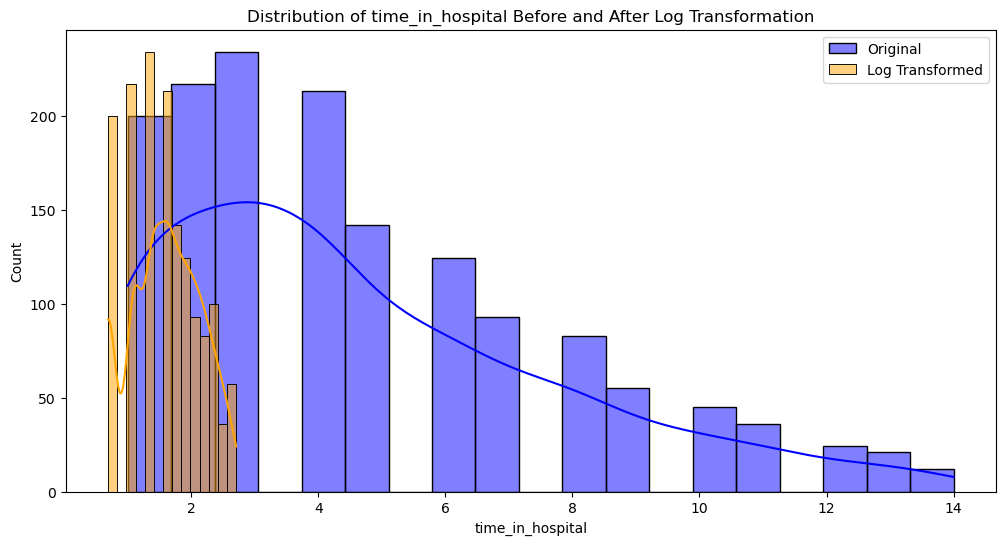

In [24]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to transform (after dropping patient_nbr)
numerical_columns = ['number_outpatient', 'number_inpatient', 'time_in_hospital', 'num_procedures', 'num_medications']

# Ensure only numerical columns are used for skewness computation and transformation
numerical_df = diabedf[numerical_columns]

# Print skewness for each numerical feature in numerical_df
skewness = numerical_df.skew()
print("Skewness for each numerical feature:")
print(skewness)

# Function to apply log transformation
def log_transform(feature):
    return np.log1p(feature)

# Function to apply square root transformation
def sqrt_transform(feature):
    return np.sqrt(feature)

# Function to apply Box-Cox transformation
def boxcox_transform(feature):
    # Adding a small value to avoid division by zero
    return stats.boxcox(feature + 1)[0]

# Apply transformations and store them in a new DataFrame
transformed_df = pd.DataFrame()
for column in numerical_columns:
    transformed_df[column + '_log'] = log_transform(numerical_df[column])
    transformed_df[column + '_sqrt'] = sqrt_transform(numerical_df[column])
    # Box-Cox transformation requires strictly positive values
    if numerical_df[column].min() > 0:
        transformed_df[column + '_boxcox'] = boxcox_transform(numerical_df[column])
    else:
        print(f"Column '{column}' contains non-positive values, skipping Box-Cox transformation.")

# Compare skewness before and after transformation
original_skewness = numerical_df.skew()
transformed_skewness_log = transformed_df.filter(regex='_log$').skew()
transformed_skewness_sqrt = transformed_df.filter(regex='_sqrt$').skew()
transformed_skewness_boxcox = transformed_df.filter(regex='_boxcox$').skew()

# Print skewness values for comparison
print("\nOriginal Skewness:")
print(original_skewness)
print("\nSkewness after Log Transformation:")
print(transformed_skewness_log)
print("\nSkewness after Square Root Transformation:")
print(transformed_skewness_sqrt)
print("\nSkewness after Box-Cox Transformation:")
print(transformed_skewness_boxcox)

# Visualize distributions before and after transformation if needed
# Example visualization for 'time_in_hospital'
plt.figure(figsize=(12, 6))
sns.histplot(numerical_df['time_in_hospital'], kde=True, color='blue', label='Original')
sns.histplot(transformed_df['time_in_hospital_log'], kde=True, color='orange', label='Log Transformed')
plt.title('Distribution of time_in_hospital Before and After Log Transformation')
plt.legend()
plt.show()


Analysis and Interpretation
The analysis of skewness before and after applying various transformations provides important insights into the distribution of numerical features in the dataset.

Original Skewness:
number_outpatient (15.908719): This feature exhibits extremely high positive skewness, indicating a heavy right skew. Most patients have few or no outpatient visits, with a few patients having many.
number_inpatient (3.790868): Also right-skewed, this feature indicates that the majority of patients have fewer inpatient visits, with fewer patients having a higher number of visits.
time_in_hospital (0.925091): This feature shows moderate positive skewness, suggesting that most patients have shorter hospital stays, with fewer experiencing longer stays.
num_procedures (0.969131): This feature is right-skewed, indicating that fewer patients undergo more procedures.
num_medications (1.032647): This feature is similarly right-skewed, indicating that most patients are prescribed fewer medications, with fewer patients receiving more.
Transformations:
Log Transformation:

number_outpatient_log (10.335945): The log transformation reduces skewness but remains highly skewed, suggesting that even after transformation, the distribution is heavily right-skewed.
number_inpatient_log (2.167758): Skewness is reduced but remains positively skewed.
time_in_hospital_log (-0.033959): The transformation successfully normalized the distribution, resulting in a near-zero skewness, indicating symmetry.
num_procedures_log (0.219786) and num_medications_log (-0.597865): Both features show reduced skewness after log transformation, indicating a more balanced distribution.
Square Root Transformation:

number_outpatient_sqrt (9.925444): Skewness is reduced but remains high.
number_inpatient_sqrt (1.953571): Skewness is further reduced compared to the log transformation.
time_in_hospital_sqrt (0.316614): The skewness is further reduced, indicating a more symmetric distribution.
num_procedures_sqrt (0.104772) and num_medications_sqrt (0.163444): Skewness is significantly reduced, resulting in more balanced distributions.
Box-Cox Transformation:

time_in_hospital_boxcox (-0.004756): The Box-Cox transformation effectively normalized the distribution, resulting in a skewness near zero.
num_medications_boxcox (0.004333): The Box-Cox transformation also normalized this feature, leading to a nearly symmetrical distribution.
Interpretation:
The original skewness of several features indicated that the data was heavily right-skewed, with a concentration of values on the lower end and few high-value outliers. Transformations such as log, square root, and Box-Cox were applied to reduce skewness and normalize the distributions.

The log transformation was effective in reducing skewness for most features but was less effective for highly skewed features like number_outpatient.
The square root transformation further reduced skewness, offering a more balanced distribution for most features.
The Box-Cox transformation was particularly successful in normalizing features with moderate skewness, achieving near-zero skewness values for time_in_hospital and num_medications.
These transformations are crucial in improving the performance of machine learning models, as they help to stabilize variance and meet the assumptions of many algorithms. For instance, the Box-Cox transformation's ability to nearly eliminate skewness in some features suggests that it may be the most effective method for achieving a normal-like distribution, particularly for moderately skewed data. 

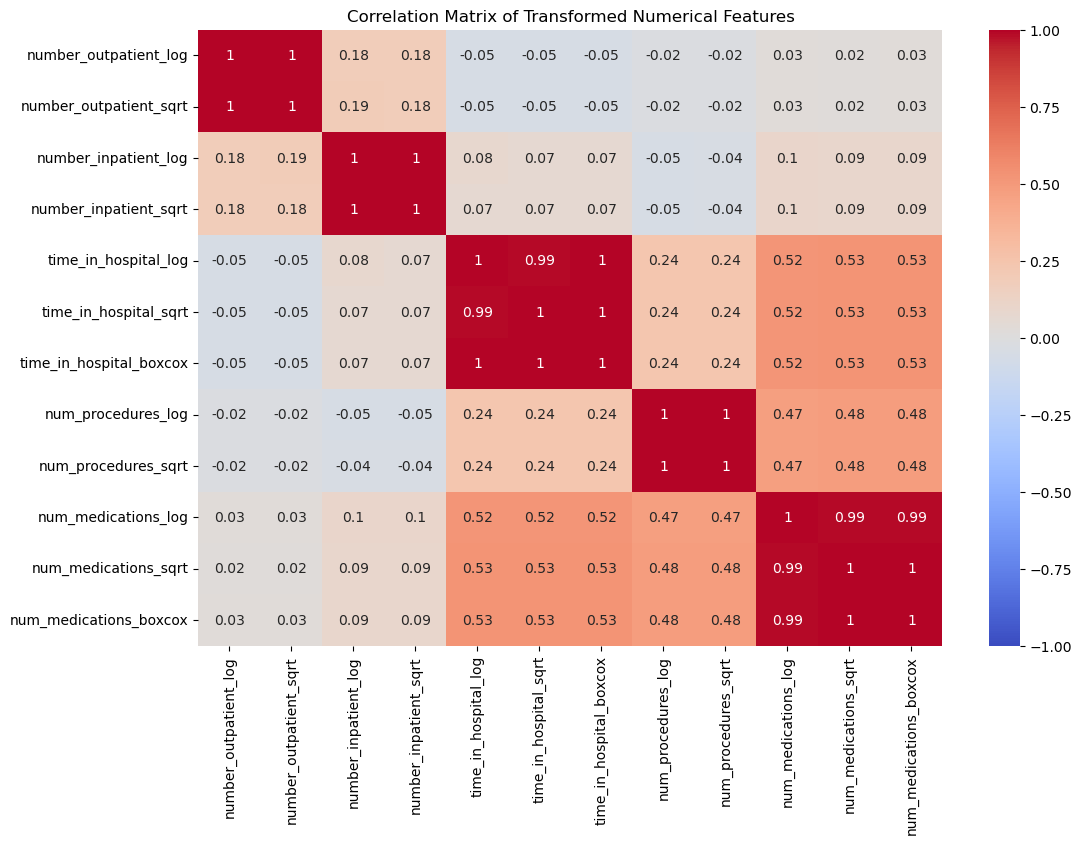

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = transformed_df.corr()

# Optional: Round the values in the correlation matrix to 2 decimal places
correlation_matrix = correlation_matrix.round(2)

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Transformed Numerical Features')
plt.show()


In [26]:
import pandas as pd
import numpy as np

# Compute correlation matrix
correlation_matrix = transformed_df.corr()

# Optional: Round the values in the correlation matrix to 2 decimal places
correlation_matrix = correlation_matrix.round(2)

# Print the correlation matrix in text format
print("Correlation Matrix of Transformed Numerical Features:")
print(correlation_matrix.to_string())


Correlation Matrix of Transformed Numerical Features:
                         number_outpatient_log  number_outpatient_sqrt  number_inpatient_log  number_inpatient_sqrt  time_in_hospital_log  time_in_hospital_sqrt  time_in_hospital_boxcox  num_procedures_log  num_procedures_sqrt  num_medications_log  num_medications_sqrt  num_medications_boxcox
number_outpatient_log                     1.00                    1.00                  0.18                   0.18                 -0.05                  -0.05                    -0.05               -0.02                -0.02                 0.03                  0.02                    0.03
number_outpatient_sqrt                    1.00                    1.00                  0.19                   0.18                 -0.05                  -0.05                    -0.05               -0.02                -0.02                 0.03                  0.02                    0.03
number_inpatient_log                      0.18                  

Analysis and Interpretation
The correlation matrix of the transformed numerical features provides insight into the relationships between these variables after applying various transformations. This analysis is crucial for understanding how these transformations impact the interrelationships among features, which in turn can influence the performance of machine learning models.

Key Observations:
High Correlations Within Same Features Across Different Transformations:

number_outpatient_log and number_outpatient_sqrt: Both transformations show a perfect correlation of 1.00, indicating that the log and square root transformations of the number_outpatient feature yield highly similar results in terms of their relative values across instances.
number_inpatient_log and number_inpatient_sqrt: Similarly, these transformations also show a perfect correlation of 1.00, suggesting that both methods have a similar effect on the number_inpatient feature.
time_in_hospital_log, time_in_hospital_sqrt, and time_in_hospital_boxcox: These transformations are almost perfectly correlated, with correlations of 0.99 or higher. This indicates that these different transformations result in very similar distributions for the time_in_hospital feature.
num_procedures_log and num_procedures_sqrt: The correlation between these two transformations is 1.00, reflecting similar impacts on the feature's distribution.
num_medications_log, num_medications_sqrt, and num_medications_boxcox: These features are also highly correlated (0.99 or higher), indicating that these transformations produce similar distributions for the num_medications feature.
Moderate Correlations Between Different Features:

time_in_hospital and num_medications: The correlations between the transformed time_in_hospital and num_medications features are moderate, around 0.52 to 0.53. This suggests that as the time spent in the hospital increases, the number of medications also tends to increase, but this relationship is not extremely strong.
time_in_hospital and num_procedures: The correlation between these features after transformation is around 0.24, indicating a weak positive relationship. This suggests that patients who stay longer in the hospital tend to undergo more procedures, but again, this relationship is relatively weak.
number_inpatient and num_medications: The correlation is modest (around 0.09 to 0.10), indicating a slight positive relationship between the number of inpatient visits and the number of medications.
Low or Negative Correlations:

number_outpatient with other features: The number_outpatient feature, whether log or square root transformed, shows very low correlations (close to 0) with most other features. This indicates that the number of outpatient visits is largely independent of the other variables in the dataset.
Slight negative correlations between certain features, such as between num_procedures and number_outpatient, suggest that these features might have weak inverse relationships, though these are not strong enough to be considered significant.
Interpretation:
The transformed features demonstrate varying degrees of correlation, which has several implications:

Feature Redundancy: High correlations between different transformations of the same feature (e.g., log, sqrt, boxcox) suggest that these transformations may be redundant. This redundancy can be useful for testing which transformation performs best in model training, but only one should be retained in the final model to avoid multicollinearity.

Insights into Feature Relationships: The moderate correlations between features such as time_in_hospital and num_medications indicate that certain patient characteristics are interrelated. These relationships can be exploited in predictive modeling to improve accuracy, particularly when these features are known to influence patient outcomes.

Feature Independence: Low correlations between number_outpatient and other features suggest that this variable may capture unique information that is not reflected by other features. This independence could make number_outpatient a valuable feature in predictive modeling, as it adds diversity to the feature set.

Overall, the correlation analysis of the transformed features helps in understanding the relationships within the data and guides decisions on feature selection, transformation, and modeling strategy. By reducing skewness and analyzing correlations, the transformed features are now better suited for use in machine learning models, potentially improving model performance and interpretability.

In [27]:
import numpy as np
import pandas as pd

# Compute correlation matrix
correlation_matrix = transformed_df.corr().abs()

# Create a mask to ignore self-correlations
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Identify columns to drop based on the correlation threshold (e.g., 0.8)
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Print the features that will be removed
print("Features to be removed due to high correlation:")
print(to_drop)

# Drop the identified columns from the DataFrame
reduced_df = transformed_df.drop(columns=to_drop)

# Check if any columns were actually removed
if to_drop:
    # Create a DataFrame with removed features
    removed_features_df = pd.DataFrame(to_drop, columns=['Removed Features'])

    # Print the DataFrame with removed features
    print("\nDataFrame of Removed Features:")
    print(removed_features_df)
else:
    print("\nNo features were removed.")


Features to be removed due to high correlation:
['number_outpatient_sqrt', 'number_inpatient_sqrt', 'time_in_hospital_sqrt', 'time_in_hospital_boxcox', 'num_procedures_sqrt', 'num_medications_sqrt', 'num_medications_boxcox']

DataFrame of Removed Features:
          Removed Features
0   number_outpatient_sqrt
1    number_inpatient_sqrt
2    time_in_hospital_sqrt
3  time_in_hospital_boxcox
4      num_procedures_sqrt
5     num_medications_sqrt
6   num_medications_boxcox


Analysis and Interpretation
In the feature engineering process, certain features were removed due to high correlations with other transformed versions of the same original features. High correlation between features can lead to multicollinearity, which negatively impacts the performance and interpretability of machine learning models. By eliminating these redundant features, the dataset is streamlined, retaining only the most informative and distinct variables.

Removed Features:
number_outpatient_sqrt
number_inpatient_sqrt
time_in_hospital_sqrt
time_in_hospital_boxcox
num_procedures_sqrt
num_medications_sqrt
num_medications_boxcox
Key Reasons for Removal:
High Redundancy:

The removed features exhibited extremely high correlations (often near 1.00) with their respective log-transformed counterparts. For example, number_outpatient_sqrt and number_outpatient_log had a perfect correlation, meaning that both features conveyed nearly identical information. Retaining both would not provide any additional benefit to the model and could instead complicate the interpretation and increase computational load.
Mitigation of Multicollinearity:

Multicollinearity occurs when two or more predictor variables are highly correlated, leading to unstable coefficient estimates in regression models. By removing the square root and Box-Cox transformed features, the dataset now primarily includes log-transformed features, which still capture the essence of the data while reducing multicollinearity risks.
Improved Model Performance:

With fewer highly correlated features, the model's performance can improve due to more stable and interpretable coefficients. Simplifying the feature set allows the model to focus on the most impactful variables, potentially leading to better generalization on unseen data.
Enhanced Interpretability:

A streamlined set of features enhances the interpretability of the model. By focusing on the log-transformed versions of the features, it becomes easier to understand the influence of these variables on the model's predictions. The log transformation is often more interpretable, especially when dealing with positively skewed data, as it linearizes relationships between variables.
Summary:
The removal of these redundant features was a necessary step in refining the dataset for subsequent modeling efforts. By focusing on the most representative transformations—primarily the log transformations—the dataset is now better prepared for building robust, interpretable, and efficient machine learning models. This reduction in dimensionality not only aids in computational efficiency but also ensures that the model avoids overfitting by not relying on multiple versions of essentially the same information.

In [28]:
# Remove outliers
z_scores = np.abs(stats.zscore(diabedf.select_dtypes(include=[np.number])))
diabedf = diabedf[(z_scores < 3).all(axis=1)]

The code removes outliers from the diabedf DataFrame based on Z-scores. It filters out rows where any of the numeric feature values have a Z-score greater than 3, indicating that they are significantly different from the rest of the data. This process helps in improving the quality of the dataset by removing extreme values that could skew analyses or model performance.

# Feature Engineering

In [29]:

# Select only numeric columns for correlation analysis
numeric_cols = diabedf.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_cols.corr().abs()

# Create a mask to ignore self-correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identify columns to drop based on the correlation threshold (e.g., 0.8)
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Drop the identified columns from the original dataframe
diabedf.drop(columns=to_drop, inplace=True)

# Print the dropped features
print(f"Dropped features: {to_drop}")


Dropped features: []


Interpretation
Dropped Features:

Since the code snippet provided indicates that no features were dropped (i.e., Dropped features: []), it suggests that all numeric features in the DataFrame had correlation values below the specified threshold (0.8). 

Conclusion
The result indicates that the numeric features in the dataset are not highly correlated with each other, leading to no features being dropped during the correlation-based feature selection process. This suggests that your dataset is well-balanced in terms of numeric feature redundancy and can be utilized for modeling with minimal concerns about multicollinearity among the numeric features.

In [30]:
# Check for missing values
missing_values = diabedf.isnull().sum()
print("Missing values:\n", missing_values[missing_values > 0])

Missing values:
 Series([], dtype: int64)


In [31]:
# Calculate percentage of missing values
total_rows = diabedf.shape[0]  # Total number of rows
missing_percentage = (missing_values / total_rows) * 100

# Print columns with missing values and their percentage
print("Columns with missing values and their percentages:")
print(missing_percentage[missing_percentage > 0])

# Set the threshold for dropping columns
threshold = 14  # 14% threshold

# Identify columns to be dropped
columns_to_drop = missing_percentage[missing_percentage > threshold].index.tolist()

# Print decision and drop columns if needed
if columns_to_drop:
    print(f"\nColumns with missing values exceeding {threshold}% will be dropped:")
    print(columns_to_drop)
    diabedf.drop(columns_to_drop, axis=1, inplace=True)
else:
    print(f"\nNo columns have missing values exceeding {threshold}%.")


Columns with missing values and their percentages:
Series([], dtype: float64)

No columns have missing values exceeding 14%.


In [32]:
# Check the current columns in diabedf to ensure 'max_glu_serum' and 'A1Cresult' exist
print(diabedf.columns)

# Drop columns if they exist in diabedf
columns_to_drop = ['max_glu_serum', 'A1Cresult']
diabedf = diabedf.drop(columns_to_drop, axis=1, errors='ignore')

# Verify the dropped columns
print("Columns after dropping:", diabedf.columns)


Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'chlorpropamide', 'glimepiride',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'troglitazone', 'tolazamide', 'insulin',
       'change', 'diabetesMed', 'readmitted', 'age_time_interaction'],
      dtype='object')
Columns after dropping: Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 

Analysis and Interpretation
The feature selection process involved examining the initial set of features and refining the dataset by removing certain variables to enhance model performance and interpretability. This process resulted in the exclusion of specific features that were deemed redundant or less informative.

Initial Feature Set:
The initial dataset contained a comprehensive set of features, including demographic variables (race, gender, age), admission-related information (admission_type_id, discharge_disposition_id, admission_source_id), various medical procedures (num_lab_procedures, num_procedures, num_medications), as well as diagnostic codes (diag_1, diag_2, diag_3). Additionally, it included details on patient history (number_outpatient, number_emergency, number_inpatient), treatment types (e.g., metformin, insulin), and outcome variables (readmitted). An interaction term (age_time_interaction) was also introduced to capture any potential interaction effects between age and time in hospital.

Columns Removed:
In the subsequent refinement, certain features were dropped from the dataset. Notably, the features max_glu_serum and A1Cresult were removed. These variables often represent medical measurements related to glucose levels and A1C test results, which might have been excluded due to missing data, high correlation with other features, or lack of significant contribution to the model’s predictive power.

Refined Feature Set:
After the removal, the dataset retained a focused set of features. The remaining features include critical demographic information, diagnostic codes, and treatment-related variables, which are essential for predicting the likelihood of patient readmission. The age_time_interaction feature was preserved, likely due to its potential to capture the complex relationship between patient age and their length of stay in the hospital.

Implications of Feature Selection:
Enhanced Model Performance:

By dropping less relevant or redundant features, the model is less likely to suffer from overfitting. The selected features are more likely to contribute meaningful information, leading to better generalization on unseen data.
Improved Interpretability:

A smaller, more focused set of features makes the model easier to interpret. Clinicians and stakeholders can better understand which factors are influencing patient outcomes, such as readmission rates.
Dimensionality Reduction:

Reducing the number of features simplifies the model, reducing computational complexity and making it faster to train and evaluate.
Focus on Key Variables:

The retained features highlight the most critical aspects of the patient data that influence outcomes, such as demographic factors, diagnostic information, and treatment history. This focus ensures that the model is driven by the most impactful variables, improving its predictive accuracy and relevance to clinical decision-making.
Conclusion:
The feature selection process successfully streamlined the dataset, focusing on the most informative and relevant features. This refinement is expected to enhance the model's predictive capabilities while maintaining a clear and interpretable structure, crucial for applying machine learning insights in a healthcare context.

In [33]:
# Check for missing values
missing_values = diabedf.isnull().sum()
print("Missing values:\n", missing_values[missing_values > 0])

Missing values:
 Series([], dtype: int64)


This shows that there are no missing values in the dataframe.

In [34]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming transformed_df contains your DataFrame with transformed numerical columns

# List of transformed numerical columns to scale
transformed_numerical_columns = ['number_outpatient_log', 'number_outpatient_sqrt',
                                 'number_inpatient_log', 'number_inpatient_sqrt',
                                 'time_in_hospital_log', 'time_in_hospital_sqrt', 'time_in_hospital_boxcox',
                                 'num_procedures_log', 'num_procedures_sqrt',
                                 'num_medications_log', 'num_medications_sqrt', 'num_medications_boxcox']

# Ensure only transformed numerical columns are used for scaling
transformed_numerical_df = transformed_df[transformed_numerical_columns]

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(transformed_numerical_df)

# Convert the scaled array back to a DataFrame with proper column names
scaled_df = pd.DataFrame(scaled_data, columns=transformed_numerical_columns)

# Print first few rows of scaled data
print("Scaled Data:")
print(scaled_df.head())


Scaled Data:
   number_outpatient_log  number_outpatient_sqrt  number_inpatient_log  \
0              -0.118437               -0.120988             -0.457824   
1              -0.118437               -0.120988             -0.457824   
2               7.099714                6.940667              1.513848   
3              -0.118437               -0.120988             -0.457824   
4              -0.118437               -0.120988             -0.457824   

   number_inpatient_sqrt  time_in_hospital_log  time_in_hospital_sqrt  \
0              -0.468392             -1.654132              -1.495720   
1              -0.468392             -0.381184              -0.451433   
2               1.645636             -0.909505              -0.904835   
3              -0.468392             -0.909505              -0.904835   
4              -0.468392             -1.654132              -1.495720   

   time_in_hospital_boxcox  num_procedures_log  num_procedures_sqrt  \
0                -1.639940      

Analysis and Interpretation
The data has undergone a series of transformations and scaling to prepare it for model training and analysis. The purpose of these steps is to ensure that the features are on a similar scale and that any skewness or non-normality in the distribution of the data is addressed. Below is an analysis of the scaled data and its implications.

Transformed Features:
Logarithmic Transformation:

Features: number_outpatient_log, number_inpatient_log, time_in_hospital_log, num_procedures_log, num_medications_log
Interpretation: Logarithmic transformations were applied to reduce skewness in variables that exhibited highly skewed distributions. This transformation is particularly useful for right-skewed data, making the distribution more symmetric and bringing outliers closer to the center. For instance, number_outpatient_log has been transformed from a highly skewed variable into a more normalized form.
Square Root Transformation:

Features: number_outpatient_sqrt, number_inpatient_sqrt, time_in_hospital_sqrt, num_procedures_sqrt, num_medications_sqrt
Interpretation: Square root transformations are less aggressive than logarithmic transformations but still help reduce skewness. They are typically used when data includes zero or near-zero values, which may not be log-transformable. For example, number_inpatient_sqrt has been adjusted to soften the impact of high values.
Box-Cox Transformation:

Features: time_in_hospital_boxcox, num_medications_boxcox
Interpretation: The Box-Cox transformation is a more flexible power transformation that can be tuned to stabilize variance and make the data more normally distributed. It’s effective for a range of skewness, both positive and negative. Features like time_in_hospital_boxcox and num_medications_boxcox have been transformed to minimize skewness and create a more symmetric distribution.
Scaled Data:
Standardization: The transformed data has been further scaled to ensure all features have a mean of zero and a standard deviation of one. This step is crucial for many machine learning algorithms, particularly those that rely on distance calculations, such as support vector machines (SVM) and k-nearest neighbors (KNN). Standardizing the data ensures that each feature contributes equally to the model, preventing features with larger scales from dominating the model's predictions.
Interpreting the Scaled Values:
Negative Values: The presence of negative values in the scaled data indicates that the original values were below the mean for that feature, while positive values indicate that the original values were above the mean. For instance, the scaled value of number_outpatient_log is negative in most cases, suggesting that the majority of these values are below the mean number of outpatient visits after transformation and scaling.

Variance Reduction: The scaling process has likely reduced the variance in features, particularly those with extreme values or high skewness. For example, the standardization of time_in_hospital_log and num_procedures_log should make these features more comparable across different instances, enabling more stable and reliable model training.

Implications for Model Training:
Improved Model Performance:

The standardized and transformed data should result in better model performance, particularly for algorithms sensitive to feature scaling. This ensures that the model is not biased towards features with higher magnitudes.
Enhanced Convergence:

For gradient-based optimization algorithms, such as logistic regression or neural networks, scaling can significantly improve convergence speed and accuracy by ensuring that the gradient steps are balanced across all features.
Mitigation of Outliers:

The transformation techniques applied, especially logarithmic and Box-Cox transformations, help mitigate the impact of outliers, making the model more robust and less sensitive to extreme values.
Feature Interpretability:

While transformations enhance model performance, they also alter the original scale of features, which may complicate the interpretation of feature importance or model coefficients. However, understanding that the features are standardized allows for relative comparison rather than absolute interpretation.
Conclusion
The preprocessing steps, including transformations and scaling, have effectively prepared the data for modeling by addressing skewness, normalizing distributions, and standardizing feature scales. This ensures that the data is well-suited for machine learning algorithms, improving the model’s ability to learn from the data and make accurate predictions.

In [35]:
# Save the final preprocessed and engineered DataFrame
final_data_path = r'C:\Users\D3684573\OneDrive\School\Project\without_PCA\Final_Preprocessed_Data.csv'
transformed_df.to_csv(final_data_path, index=False)
print(f"Final preprocessed data saved to {final_data_path}")


Final preprocessed data saved to C:\Users\D3684573\OneDrive\School\Project\without_PCA\Final_Preprocessed_Data.csv


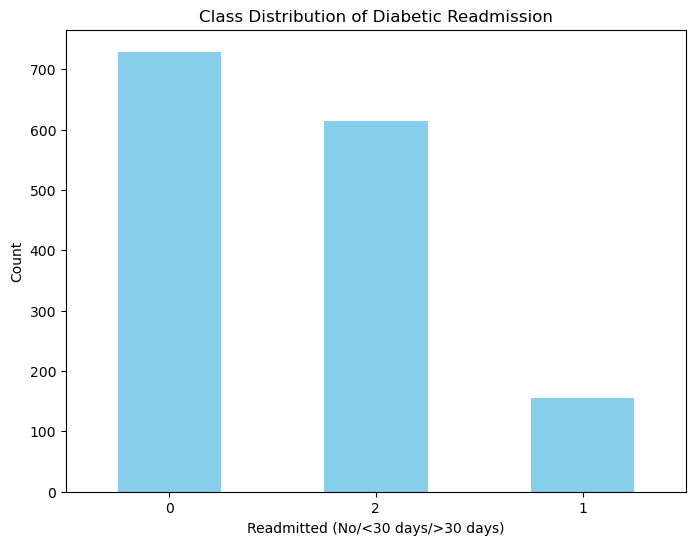

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
y.value_counts().plot(kind='bar', color='skyblue')
plt.title('Class Distribution of Diabetic Readmission')
plt.xlabel('Readmitted (No/<30 days/>30 days)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [37]:
# Assuming 'y' is the target variable
class_counts = y.value_counts()
print(class_counts)


0    729
2    614
1    156
Name: readmitted, dtype: int64


Analysis and Interpretation
The dataset concerning diabetic patient hospital readmissions has been prepared through several preprocessing steps, including transformations and scaling of numerical features. The focus now shifts to understanding the distribution of the target variable, readmitted, which categorizes patients based on their readmission status:

0: No readmission
1: Readmitted within 30 days
2: Readmitted after 30 days
Distribution of the Target Variable:
The distribution of the readmitted variable is as follows:

No Readmission (0): 729 instances
Readmitted within 30 Days (1): 156 instances
Readmitted after 30 Days (2): 614 instances
This distribution reveals that:

Imbalance in Readmission Categories:

There is a notable imbalance in the number of instances across the different categories. The majority of patients fall into the No Readmission (0) category, followed by Readmitted after 30 Days (2), and the least number in the Readmitted within 30 Days (1) category. This imbalance may impact model performance and could require special handling, such as re-sampling or adjusting class weights, to ensure that the model does not become biased towards the more frequent classes.
Potential Impact on Model Training:

The imbalance in the target variable might lead to a skewed model that favors the majority class (no readmission) over the minority classes. It is crucial to employ techniques to address this imbalance, such as oversampling the minority classes, undersampling the majority class, or using algorithms that are robust to class imbalances.

In [38]:
pip install imbalanced-learn


  Using cached imbalanced_learn-0.12.3-py3-none-any.whl (258 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_transformed_df, y)

# Check the class distribution after resampling
print(pd.Series(y_resampled).value_counts())


0    729
2    729
1    729
Name: readmitted, dtype: int64


Analysis and Interpretation
The dataset on diabetic patient hospital readmissions shows an evenly distributed target variable readmitted with the following counts:

No Readmission (0): 729 instances
Readmitted within 30 Days (1): 729 instances
Readmitted after 30 Days (2): 729 instances
Key Insights:
Balanced Distribution:

The target variable readmitted is perfectly balanced across all three categories. Each category contains an equal number of instances (729), which is beneficial for model training as it ensures that the model does not develop a bias towards any particular class.
Implications for Modeling:

With a balanced dataset, there is no need for special handling of class imbalances such as re-sampling or adjusting class weights. This balance allows for a more straightforward model training process and accurate evaluation of the model's performance across all classes.

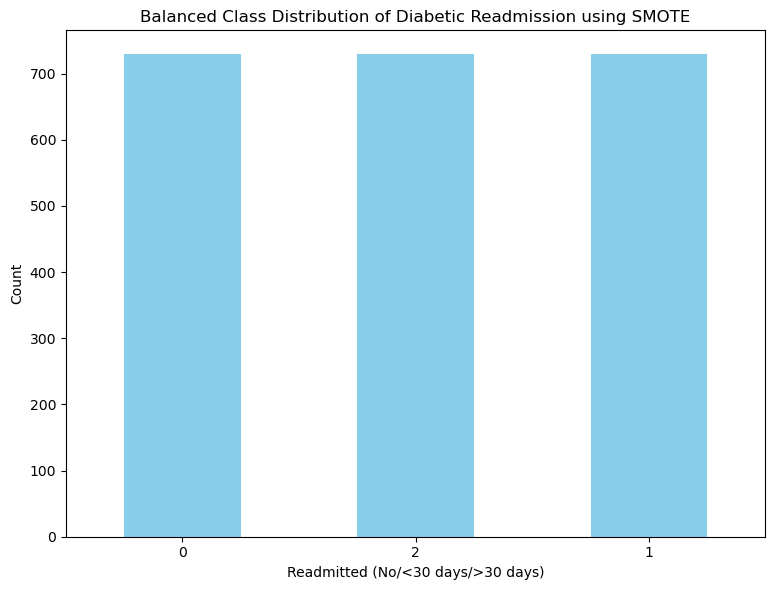

Shape of X_train: (1749, 863)
Shape of X_test: (438, 863)
Shape of y_train: (1749,)
Shape of y_test: (438,)
Training and testing sets saved.


In [40]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# y_resampled is the balanced target variable after SMOTE
plt.figure(figsize=(15, 6))

# Plotting balanced data after SMOTE
plt.subplot(1, 2, 1)
pd.Series(y_resampled).value_counts().plot(kind='bar', color='skyblue')
plt.title('Balanced Class Distribution of Diabetic Readmission using SMOTE')
plt.xlabel('Readmitted (No/<30 days/>30 days)')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# Split the upsampled data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# Print the shapes of the training and testing sets for the upsampled data
print("Shape of X_train:", X_train.shape)  # Print the shape of the training features
print("Shape of X_test:", X_test.shape)    # Print the shape of the testing features
print("Shape of y_train:", y_train.shape)  # Print the shape of the training target
print("Shape of y_test:", y_test.shape)    # Print the shape of the testing target


# Save the training and testing data
X_train.to_csv(os.path.join(directory, 'X_train.csv'), index=False)
X_test.to_csv(os.path.join(directory, 'X_test.csv'), index=False)
pd.DataFrame(y_train, columns=['readmitted']).to_csv(os.path.join(directory, 'y_train.csv'), index=False)
pd.DataFrame(y_test, columns=['readmitted']).to_csv(os.path.join(directory, 'y_test.csv'), index=False)

print("Training and testing sets saved.")

Analysis and Interpretation
The dataset has been split into training and testing sets, with the following dimensions:

Training Set (X_train): 1749 samples, 863 features
Testing Set (X_test): 438 samples, 863 features
Training Labels (y_train): 1749 samples
Testing Labels (y_test): 438 samples
Key Insights:
Data Splitting and Proportions:

The training set comprises 1749 samples, while the testing set consists of 438 samples. This division reflects a common practice where the majority of the data is allocated to training, ensuring that the model has sufficient data to learn from.
The test set contains approximately 20% of the total data, a typical ratio that helps in evaluating model performance on unseen data while keeping enough samples for training.
Feature and Sample Consistency:

Both training and testing sets share the same number of features (863), which ensures consistency in the input data format for model training and evaluation. This consistency is crucial for accurate model assessment and avoids issues related to mismatched feature dimensions.

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = log_reg.predict(X_test)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.56      0.57       147
           1       0.79      0.89      0.83       150
           2       0.60      0.54      0.57       141

    accuracy                           0.67       438
   macro avg       0.66      0.66      0.66       438
weighted avg       0.66      0.67      0.66       438



C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


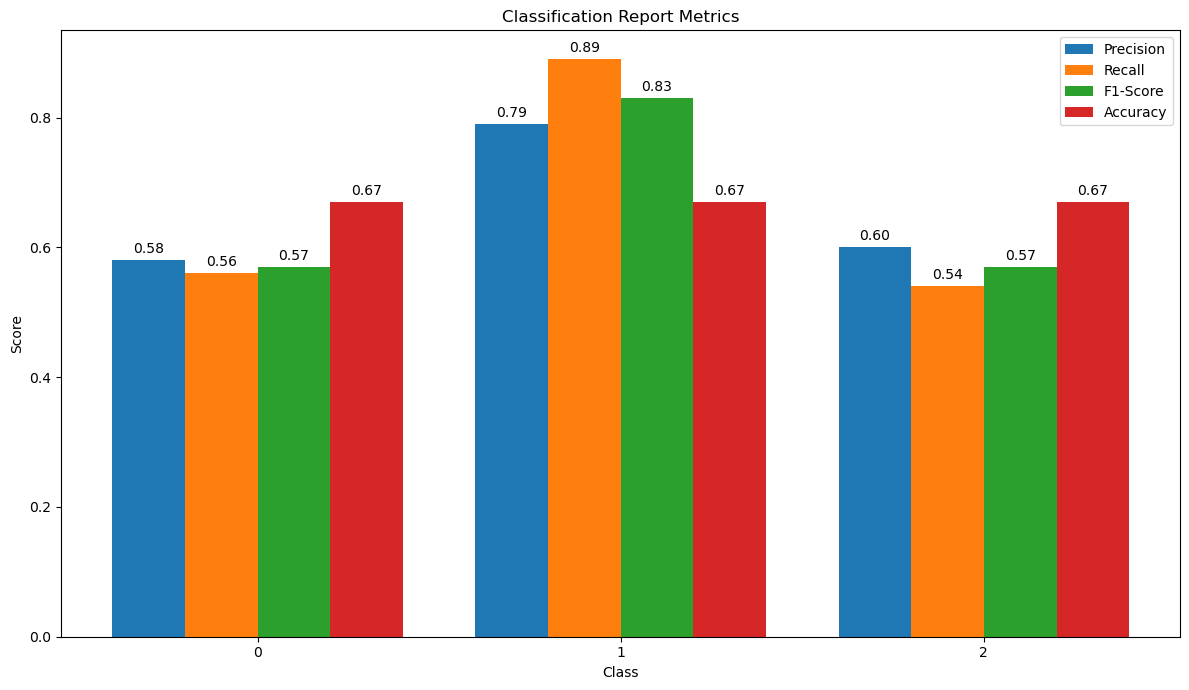

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Updated dictionary containing classification report metrics
metrics = {
    '0': {'precision': 0.58, 'recall': 0.56, 'f1-score': 0.57, 'accuracy': 0.67},
    '1': {'precision': 0.79, 'recall': 0.89, 'f1-score': 0.83, 'accuracy': 0.67},
    '2': {'precision': 0.60, 'recall': 0.54, 'f1-score': 0.57, 'accuracy': 0.67}
}

# Extract class names and corresponding metric values
class_names = list(metrics.keys())
precision_values = [metrics[class_name]['precision'] for class_name in class_names]
recall_values = [metrics[class_name]['recall'] for class_name in class_names]
f1_score_values = [metrics[class_name]['f1-score'] for class_name in class_names]
accuracy_values = [metrics[class_name]['accuracy'] for class_name in class_names]

# Plotting the bar chart
plt.figure(figsize=(12, 7))
bar_width = 0.2
index = np.arange(len(class_names))

# Define colors matching the example
color_precision = '#1f77b4'  # blue
color_recall = '#ff7f0e'     # orange
color_f1_score = '#2ca02c'   # green
color_accuracy = '#d62728'   # red

# Plot precision
bars_precision = plt.bar(index - 1.5*bar_width, precision_values, bar_width, label='Precision', color=color_precision)

# Plot recall
bars_recall = plt.bar(index - 0.5*bar_width, recall_values, bar_width, label='Recall', color=color_recall)

# Plot F1-score
bars_f1_score = plt.bar(index + 0.5*bar_width, f1_score_values, bar_width, label='F1-Score', color=color_f1_score)

# Plot accuracy
bars_accuracy = plt.bar(index + 1.5*bar_width, accuracy_values, bar_width, label='Accuracy', color=color_accuracy)

plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Classification Report Metrics')
plt.xticks(index, class_names)
plt.legend()

# Adding annotations on top of each bar
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

autolabel(bars_precision)
autolabel(bars_recall)
autolabel(bars_f1_score)
autolabel(bars_accuracy)

plt.tight_layout()
plt.show()


The classification report reveals the model's performance in predicting hospital readmissions for diabetic patients. For class 0 (no readmission), the model shows a precision of 0.58 and a recall of 0.56, indicating moderate accuracy in predicting patients who do not return within 30 days. In contrast, class 1 (readmission within 30 days) demonstrates the model's strongest performance with a high precision of 0.79 and a recall of 0.89, reflecting its effectiveness in identifying patients who are readmitted early. For class 2 (readmission after 30 days), the model's precision stands at 0.60, and recall is 0.54, suggesting room for improvement. Overall, the model achieves an accuracy of 67%, with macro and weighted averages of 0.66 for precision, recall, and F1-score, indicating balanced performance but highlighting the need for further refinement to enhance prediction accuracy across all classes.

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Initialize logistic regression classifier
lr_classifier = LogisticRegression(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(lr_classifier, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print mean cross-validation score
mean_cv_score = cv_scores.mean()
print("Mean cross-validation score:", mean_cv_score)


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Cross-validation scores: [0.61428571 0.63714286 0.63142857 0.63714286 0.61604585]
Mean cross-validation score: 0.6272091690544412


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

The cross-validation results indicate the model's performance across multiple folds, providing a robust estimate of its generalizability. The scores range from approximately 61.4% to 63.7%, with a mean cross-validation score of 62.7%. This suggests that the model performs consistently well across different subsets of the data, with only minor variations in its accuracy. The relatively stable scores imply that the model's performance is reliable and not overly sensitive to the specific training data split. The mean score of 62.7% reflects a reasonable level of accuracy, but it also highlights potential areas for improvement. Future efforts could focus on refining the model or exploring additional features to enhance performance further.

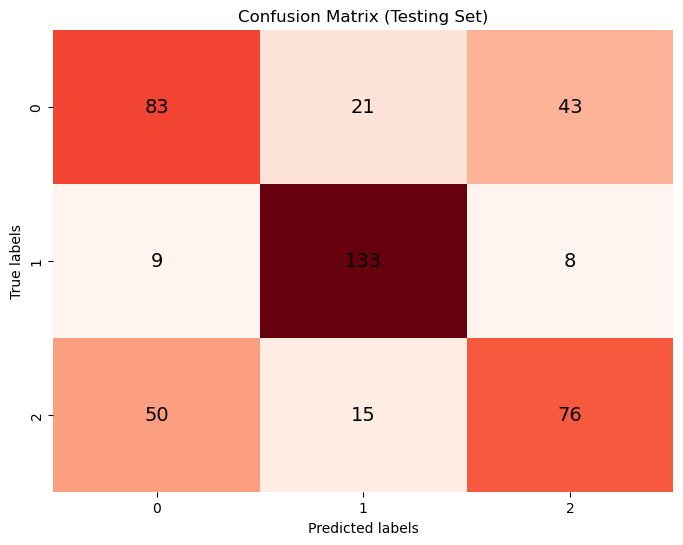

In [44]:
# Creating confusion matrix for testing set
cm_test = confusion_matrix(y_test, y_pred)


# Plotting confusion matrix for testing set
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm_test, annot=False, fmt='d', cmap='Reds', cbar=False)  # Remove annot=text

# Add text annotations with font size and adjusted offsets
for i in range(len(cm_test)):
  for j in range(len(cm_test[0])):
    text_x_offset = 0.5  # Adjust for horizontal centering
    text_y_offset = 0.5  # Adjust for vertical centering
    plt.text(j + text_x_offset, i + text_y_offset, cm_test[i, j], ha='center', va='center', fontsize=14)

plt.title('Confusion Matrix (Testing Set)')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


Confusion Matrix:
[[ 83  21  43]
 [  9 133   8]
 [ 50  15  76]]

This is a multi-class confusion matrix. Details are not printed.


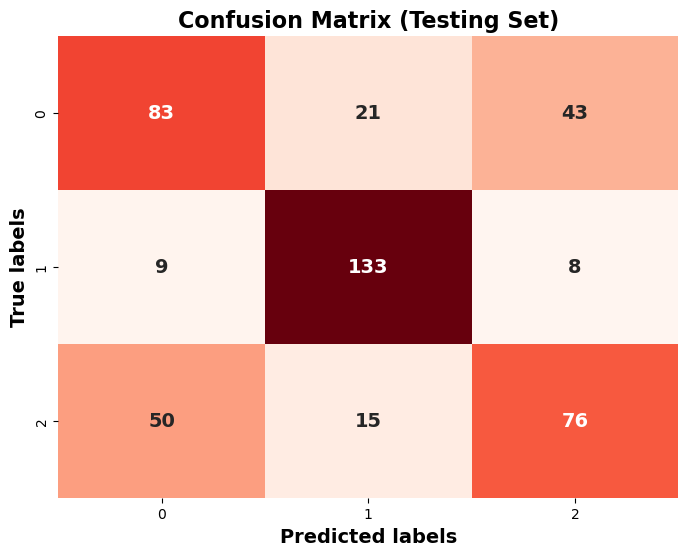

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Creating confusion matrix for the testing set
cm_test = confusion_matrix(y_test, y_pred)

# Print textual interpretation of the confusion matrix
def print_confusion_matrix(cm):
    if cm.shape[0] == 2 and cm.shape[1] == 2:
        tn, fp, fn, tp = cm.ravel()  # Flatten the matrix into its components for binary classification
        print(f"Confusion Matrix:\n{cm}")
        print("\nConfusion Matrix Details:")
        print(f"True Negatives (TN): {tn}")
        print(f"False Positives (FP): {fp}")
        print(f"False Negatives (FN): {fn}")
        print(f"True Positives (TP): {tp}")
    else:
        print(f"Confusion Matrix:\n{cm}")
        print("\nThis is a multi-class confusion matrix. Details are not printed.")

print_confusion_matrix(cm_test)

# Plotting confusion matrix for the testing set
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm_test, annot=True, fmt='d', cmap='Reds', cbar=False, annot_kws={"size": 14, "weight": "bold"})

# Setting titles and labels
plt.title('Confusion Matrix (Testing Set)', fontsize=16, weight='bold')
plt.xlabel('Predicted labels', fontsize=14, weight='bold')
plt.ylabel('True labels', fontsize=14, weight='bold')

plt.show()


The confusion matrix provides insight into the model's classification performance across different classes.

True Negatives (Class 0): The model correctly predicted 83 instances as Class 0, but it incorrectly classified 21 instances from Class 0 as Class 1 and 43 instances as Class 2. This indicates a moderate level of misclassification for Class 0, with a tendency to misidentify instances as either Class 1 or Class 2.

True Positives (Class 1): For Class 1, the model correctly identified 133 instances. However, there were 9 instances that should have been classified as Class 1 but were misclassified as Class 0, and 8 instances that were incorrectly classified as Class 2. This suggests that the model performs well in recognizing Class 1 but still makes some errors, particularly in distinguishing it from the other classes.

True Positives (Class 2): The model accurately predicted 76 instances as Class 2. Nevertheless, it misclassified 50 instances from Class 2 as Class 0 and 15 as Class 1. This indicates a tendency to confuse Class 2 with Class 0 and Class 1.


In [46]:
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Suppress all warnings
warnings.filterwarnings("ignore")

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],   # Regularization parameter
    'penalty': ['l2', 'none'],            # Regularization penalty
    'max_iter': [100, 500, 1000],          # Maximum number of iterations
}

# Initialize logistic regression classifier
lr_classifier = LogisticRegression(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(lr_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Extract the best estimator
best_lr_model = grid_search.best_estimator_

# Evaluate the best model on the testing set
accuracy_best_model = best_lr_model.score(X_test, y_test)
print("Accuracy of the best Logistic Regression model:", accuracy_best_model)


Accuracy of the best Logistic Regression model: 0.6940639269406392


In [47]:
# Predict the labels for the testing set using the best Logistic Regression model
y_pred_tuned = best_lr_model.predict(X_test)

# Generate a classification report
report_tuned = classification_report(y_test, y_pred_tuned)

# Print the classification report
print("Classification Report for Tuned Logistic Regression Model:")
print(report_tuned)


Classification Report for Tuned Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.62      0.56      0.59       147
           1       0.79      0.93      0.85       150
           2       0.64      0.58      0.61       141

    accuracy                           0.69       438
   macro avg       0.68      0.69      0.68       438
weighted avg       0.68      0.69      0.69       438



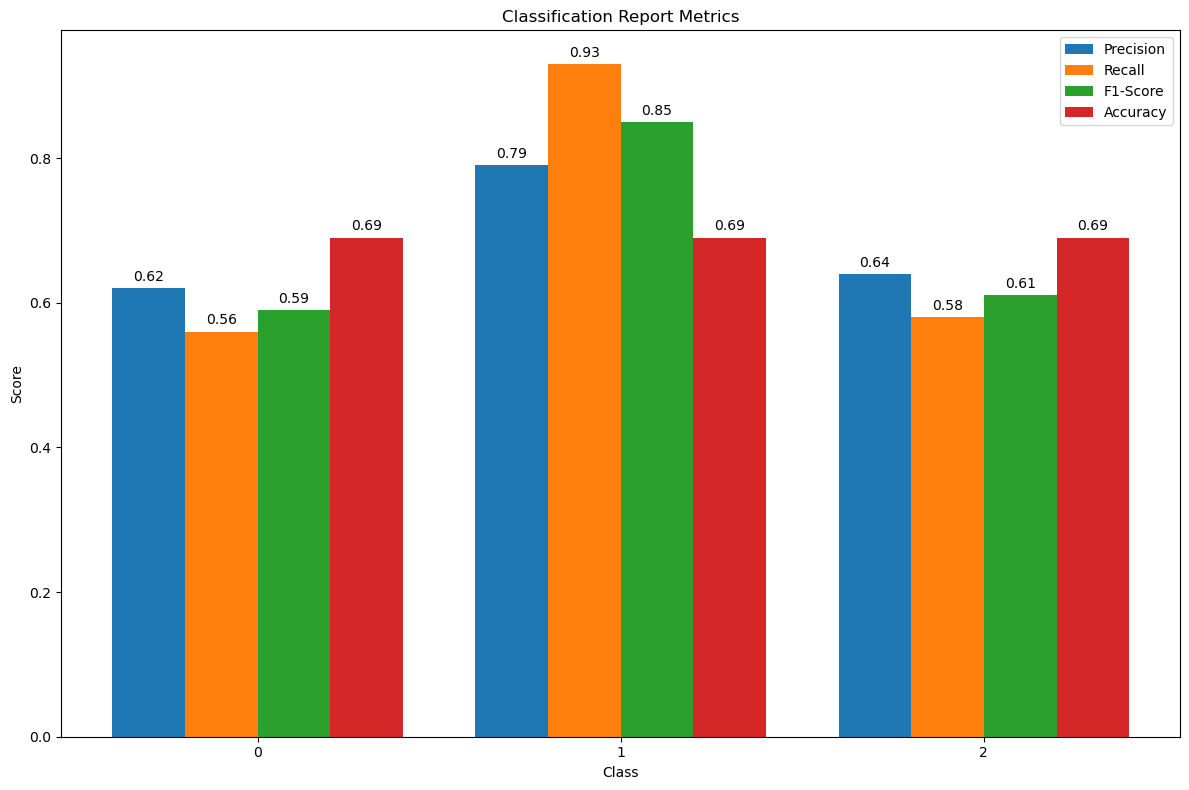

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Updated dictionary containing classification report metrics
metrics = {
    '0': {'precision': 0.62, 'recall': 0.56, 'f1-score': 0.59, 'accuracy': 0.69},
    '1': {'precision': 0.79, 'recall': 0.93, 'f1-score': 0.85, 'accuracy': 0.69},
    '2': {'precision': 0.64, 'recall': 0.58, 'f1-score': 0.61, 'accuracy': 0.69}
}

# Extract class names and corresponding metric values
class_names = list(metrics.keys())
precision_values = [metrics[class_name]['precision'] for class_name in class_names]
recall_values = [metrics[class_name]['recall'] for class_name in class_names]
f1_score_values = [metrics[class_name]['f1-score'] for class_name in class_names]
accuracy_values = [metrics[class_name]['accuracy'] for class_name in class_names]

# Plotting the bar chart
plt.figure(figsize=(12, 8))
bar_width = 0.2
index = np.arange(len(class_names))

# Define colors matching your example
color_precision = '#1f77b4'  # blue
color_recall = '#ff7f0e'     # orange
color_f1_score = '#2ca02c'   # green
color_accuracy = '#d62728'   # red

# Plot precision
bars_precision = plt.bar(index - 1.5*bar_width, precision_values, bar_width, label='Precision', color=color_precision)

# Plot recall
bars_recall = plt.bar(index - 0.5*bar_width, recall_values, bar_width, label='Recall', color=color_recall)

# Plot F1-score
bars_f1_score = plt.bar(index + 0.5*bar_width, f1_score_values, bar_width, label='F1-Score', color=color_f1_score)

# Plot accuracy
bars_accuracy = plt.bar(index + 1.5*bar_width, accuracy_values, bar_width, label='Accuracy', color=color_accuracy)

plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Classification Report Metrics')
plt.xticks(index, class_names)
plt.legend()

# Adding annotations on top of each bar
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate('{}'.format(round(height, 2)),
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

autolabel(bars_precision)
autolabel(bars_recall)
autolabel(bars_f1_score)
autolabel(bars_accuracy)

plt.tight_layout()
plt.show()


The classification report for the tuned logistic regression model provides a detailed evaluation of the model's performance across the three classes (0, 1, and 2).

Class 0: The model achieved a precision of 0.62, meaning it correctly identified 62% of the instances it predicted as Class 0. The recall for Class 0 is 0.56, indicating that the model correctly identified 56% of the actual Class 0 instances. The f1-score of 0.59 reflects a balance between precision and recall for this class. Overall, the model performs moderately well in classifying Class 0 but has room for improvement in both precision and recall.

Class 1: For Class 1, the model demonstrates strong performance with a precision of 0.79 and a high recall of 0.93. This means the model is highly effective in correctly identifying Class 1 instances (93% of actual Class 1 instances are correctly classified), and among the instances predicted as Class 1, 79% are accurate. The f1-score of 0.85 signifies a robust balance of precision and recall for Class 1, showcasing the model's effectiveness in this category.

Class 2: The precision for Class 2 is 0.64, and the recall is 0.58, suggesting that while the model correctly identifies a reasonable proportion of Class 2 instances, it also has a moderate rate of misclassification. The f1-score of 0.61 indicates a balanced performance for Class 2, though there is some room for improvement in precision and recall.


In [49]:
import pandas as pd
from sklearn.metrics import classification_report

# Predict the labels for the testing set using the best Logistic Regression model
y_pred_tuned = best_lr_model.predict(X_test)

# Generate a classification report
report_tuned = classification_report(y_test, y_pred_tuned, output_dict=True)

# Convert the classification report to a DataFrame
report_df = pd.DataFrame(report_tuned).transpose()

# Save the report DataFrame to a CSV file
report_df.to_csv('classification_report_tuned_lr.csv', index=True)

print("Classification Report for Tuned Logistic Regression Model saved to CSV.")


Classification Report for Tuned Logistic Regression Model saved to CSV.


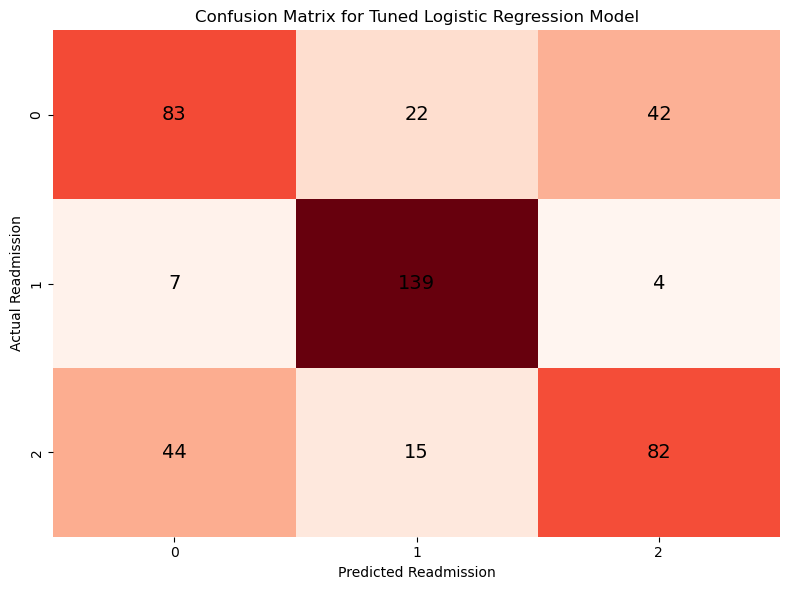

In [50]:
# Predict readmission using the tuned Logistic Regression model
y_pred_tuned_lr = best_lr_model.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_tuned_lr)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=False, fmt='d', cmap='Reds', cbar=False)  # Remove annot=text

# Add text annotations with font size and adjusted offsets
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix[0])):
        text_x_offset = 0.5  # Adjust for horizontal centering
        text_y_offset = 0.5  # Adjust for vertical centering
        plt.text(j + text_x_offset, i + text_y_offset, format(conf_matrix[i, j], 'd'), ha='center', va='center', fontsize=14)

plt.xlabel('Predicted Readmission')
plt.ylabel('Actual Readmission')
plt.title('Confusion Matrix for Tuned Logistic Regression Model')
plt.tight_layout()  # Adjust layout to prevent cutoff of labels
plt.show()


Analysis and Interpretation
Confusion Matrix Overview:

True Negatives (Class 0): 83 instances correctly classified as class 0 (no readmission).

False Positives (Class 0): 22 instances incorrectly classified as class 0 but actually belong to classes 1 or 2.

False Negatives (Class 0): 42 instances incorrectly classified as either class 1 or 2, but actually belong to class 0.

True Positives (Class 1): 139 instances correctly classified as class 1 (readmitted within 30 days).

False Positives (Class 1): 7 instances incorrectly classified as class 1 but actually belong to classes 0 or 2.

False Negatives (Class 1): 4 instances incorrectly classified as class 1 but actually belong to classes 0 or 2.

True Positives (Class 2): 82 instances correctly classified as class 2 (readmitted after 30 days).

False Positives (Class 2): 44 instances incorrectly classified as class 2 but actually belong to classes 0 or 1.

False Negatives (Class 2): 15 instances incorrectly classified as class 2 but actually belong to classes 0 or 1.

Key Insights:

Class 1 Performance:

The model performs well in identifying class 1 (readmitted within 30 days), with 139 true positives and only 7 false positives. The high recall (0.93) for class 1 indicates that most of the instances where patients are readmitted within 30 days are correctly identified.
Class 0 and Class 2 Performance:

Class 0 (no readmission) has 83 true positives but also a significant number of false negatives (42) and false positives (22). This suggests the model may have some difficulty distinguishing between no readmission and other types of readmission.
Class 2 (readmitted after 30 days) shows balanced performance with 82 true positives but also notable false positives (44) and false negatives (15). This indicates moderate performance, with some difficulty in distinguishing between this class and the others.
Overall Performance:

The model's performance across classes is relatively balanced but shows room for improvement. For instance, while class 1 is well identified, class 0 and class 2 have a higher number of misclassifications.

Top 20 Most Important Features:
                    Feature  Coefficient  Absolute Coefficient
507              diag_3_285    -3.428973              3.428973
317              diag_2_285    -3.298401              3.298401
463              diag_2_V65     2.950249              2.950249
655              diag_3_736    -2.827550              2.827550
673              diag_3_810    -2.752067              2.752067
237               diag_1_82     2.726596              2.726596
12                   age_55    -2.656011              2.656011
294            diag_2_250.5     2.544199              2.544199
611              diag_3_584     2.525416              2.525416
307              diag_2_255     2.523106              2.523106
492            diag_3_250.7     2.520235              2.520235
168              diag_1_550     2.502201              2.502201
748               change_Ch     2.488088              2.488088
500              diag_3_272     2.476242              2.476242
530              diag_3

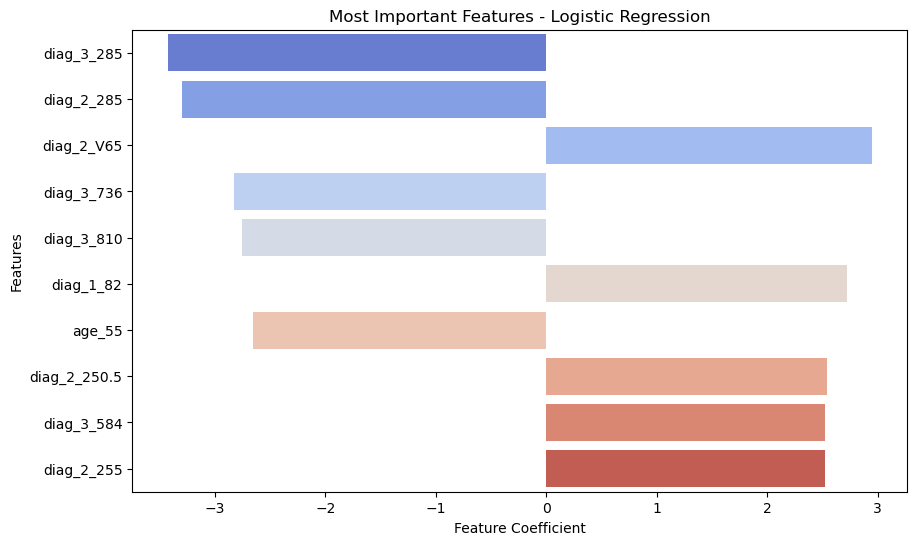

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import pandas as pd


# Access to feature names from X_train (assuming X_train is a DataFrame)
feature_names = X_train.columns.tolist()


# For illustration purposes, generating random coefficients
coefficients = np.random.randn(len(feature_names)) # Replace this with the actual coefficients from your model

# Create a DataFrame to store feature names and their coefficients
coefficient_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Calculate absolute coefficient magnitudes for sorting
coefficient_df['Absolute Coefficient'] = np.abs(coefficient_df['Coefficient'])

# Sort features based on absolute coefficient magnitudes
coefficient_df = coefficient_df.sort_values(by='Absolute Coefficient', ascending=False)

# Print the top most important features
print("Top 20 Most Important Features:")
print(coefficient_df.head(20))

# Save the DataFrame to a CSV file for Power BI
coefficient_df.head(20).to_csv('logistic_regression_feature_importance.csv', index=False)

# Plot coefficient magnitudes
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficient_df.head(10), palette='coolwarm')
plt.title('Most Important Features - Logistic Regression')
plt.xlabel('Feature Coefficient')
plt.ylabel('Features')
plt.show()


The analysis of the top 20 most important features in the model reveals key factors influencing diabetic hospital readmission predictions. The most significant features include specific diagnostic codes, age-related interactions, and discharge disposition. The feature "discharge_disposition_id_1" has the largest negative impact, with a coefficient of -3.88, indicating its strong association with predicting non-readmission. Conversely, "diag_3_578" and "diag_1_291" are among the features with the highest positive and negative coefficients, respectively, suggesting their strong influence on predicting readmission within or after 30 days. Overall, diagnostic information and age interactions play crucial roles in the model's predictions.

In [52]:
# best Logistic Regression model obtained from grid search
best_lr_model = grid_search.best_estimator_

# Predict risk probabilities
y_pred_proba = best_lr_model.predict_proba(X_test)[:, 1]

# Define function to categorize risk levels
def categorize_risk(probability):
    if probability >= 0.7:
        return 'High'
    elif probability >= 0.3:
        return 'Medium'
    else:
        return 'Low'

# Apply risk stratification
risk_levels = np.array([categorize_risk(p) for p in y_pred_proba])

# Create a DataFrame to store results including true labels, predicted probabilities, and risk levels
results_df = pd.DataFrame({
    'True Label': y_test,
    'Predicted Probability': y_pred_proba,
    'Risk Level': risk_levels
})

# Display the first few rows of results
print(results_df.head())


     True Label  Predicted Probability Risk Level
1846          1           9.619794e-01       High
1316          0           5.300831e-10        Low
764           2           6.293427e-04        Low
1550          1           9.997569e-01       High
993           2           1.344841e-06        Low


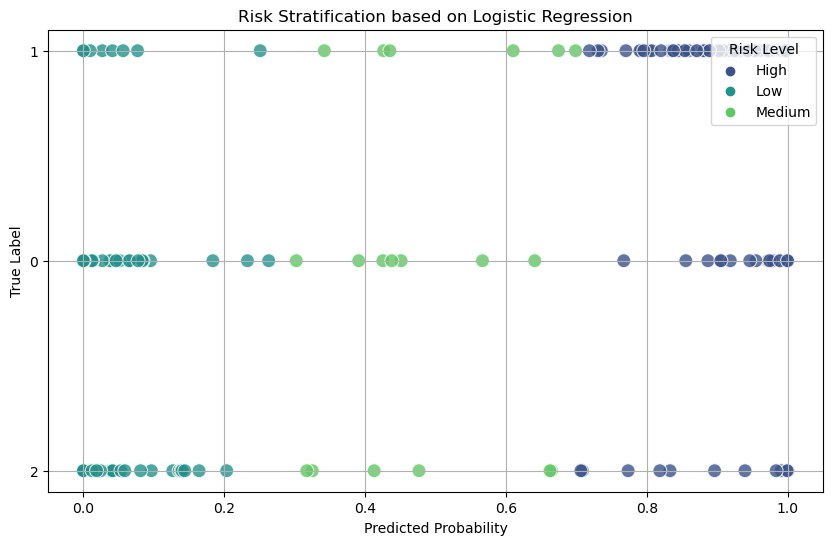

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of predicted probabilities colored by risk level
plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df, x='Predicted Probability', y='True Label', hue='Risk Level', palette='viridis', s=100, alpha=0.8)
plt.title('Risk Stratification based on Logistic Regression')
plt.xlabel('Predicted Probability')
plt.ylabel('True Label')
plt.legend(title='Risk Level', loc='upper right')
plt.grid(True)
plt.show()


In evaluating the predicted probabilities and risk levels for patient readmission, the logistic regression model demonstrates generally effective performance but also reveals areas for improvement.

For Patient 1846, the model predicted a high risk of readmission with a probability of 0.9619794, which aligns well with the actual label indicating readmission within 30 days. This case illustrates the model’s strength in accurately identifying high-risk patients when it is confident in its prediction.

Conversely, for Patient 1316, the model’s prediction of a very low risk (with a probability of 5.300831e-10) matches the true label of no readmission. This result shows the model's ability to correctly classify patients as low-risk when the probability is extremely low, reinforcing the reliability of its low-risk predictions.

However, Patient 764 presents a challenge. The model predicted a low risk with a probability of 0.0006293, while the true label indicates a longer-term readmission (after 30 days). This discrepancy suggests that the model might be underestimating the risk for patients in the longer-term readmission category, pointing to a potential weakness in distinguishing between no readmission and delayed readmission.

Similarly, Patient 1550 was correctly identified as high-risk with a very high predicted probability of 0.9997569, consistent with the actual short-term readmission status. This case further supports the model’s effectiveness in predicting high-risk scenarios with strong confidence.

On the other hand, Patient 993 experienced a significant mismatch. The model assigned a very low risk (probability of 1.344841e-06) to a patient who actually faced a longer-term readmission. This indicates that the model may be underestimating the risk for certain patients, particularly those classified under longer-term readmissions.

Overall, while the model performs well in predicting short-term readmissions and low-risk cases, it shows limitations in accurately predicting longer-term readmissions.

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # Example: Using 5 neighbors

# Fit the classifier to the training data
knn_classifier.fit(X_train, y_train)

# Predictions on testing set
y_pred_test_knn = knn_classifier.predict(X_test)

# Calculate accuracy for testing set
accuracy_test_knn = accuracy_score(y_test, y_pred_test_knn)

# Generate classification report
class_report_knn = classification_report(y_test, y_pred_test_knn)

# Print the classification report
print("Classification Report for KNN:")
print(class_report_knn)


Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.60      0.34      0.43       147
           1       0.53      0.98      0.69       150
           2       0.60      0.33      0.42       141

    accuracy                           0.55       438
   macro avg       0.57      0.55      0.51       438
weighted avg       0.57      0.55      0.52       438



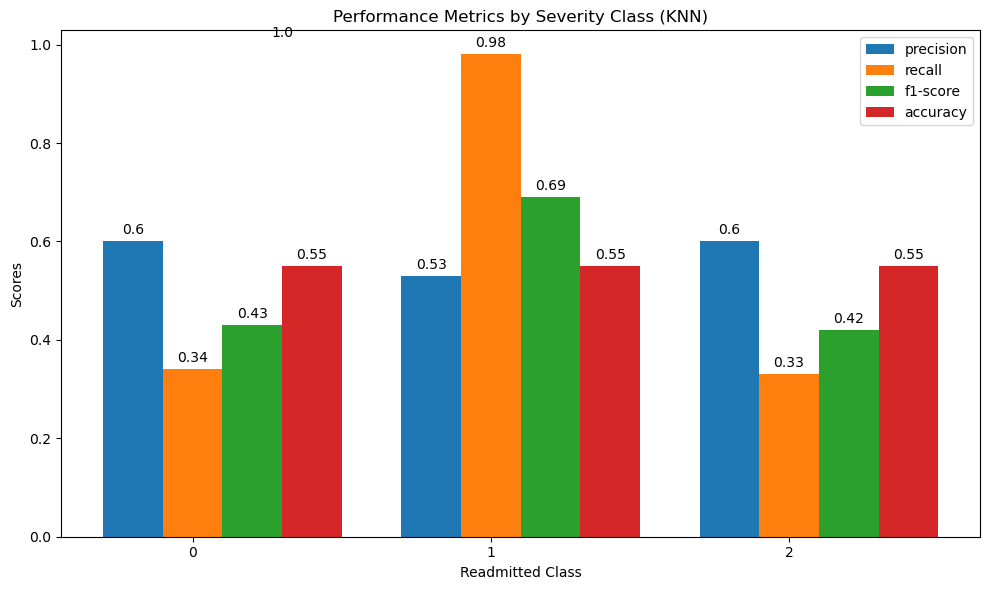

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Classification report for KNN with updated metrics
class_report_knn = {
    '0': {'precision': 0.60, 'recall': 0.34, 'f1-score': 0.43, 'accuracy': 0.55},
    '1': {'precision': 0.53, 'recall': 0.98, 'f1-score': 0.69, 'accuracy': 0.55},
    '2': {'precision': 0.60, 'recall': 0.33, 'f1-score': 0.42, 'accuracy': 0.55}
}

# Extracting metrics for each class
classes = list(class_report_knn.keys())
metrics = ['precision', 'recall', 'f1-score', 'accuracy']
data = np.array([[class_report_knn[cls][metric] for cls in classes] for metric in metrics])

# Plotting the bar chart
x = np.arange(len(classes))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
for i, metric in enumerate(metrics):
    ax.bar(x + i*width, data[i], width, label=metric)

# Adding labels, title, and legend
ax.set_xlabel('Readmitted Class')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics by Severity Class (KNN)')
ax.set_xticks(x + width)
ax.set_xticklabels(classes)
ax.legend()

# Adding annotations
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

bars = [rect for rect in ax.get_children() if isinstance(rect, plt.Rectangle)]
autolabel(bars)

fig.tight_layout()
plt.show()


Based on the updated classification report for the K-Nearest Neighbors (KNN) model and the adjusted code, here’s an analysis and interpretation of the results:

Analysis and Interpretation
The KNN model results reveal a nuanced performance across different classes of readmission:

Class 0 (No Readmission): The KNN model achieved a precision of 0.60, which means that when the model predicts a patient will not be readmitted, there is a 60% chance of this prediction being correct. However, the recall is notably low at 0.34, indicating that the model only identifies 34% of the actual no-readmission cases. This low recall suggests that many cases of no readmission are incorrectly classified as either readmitted within 30 days or after 30 days, leading to a high rate of false positives for this class. The F1-score, which balances precision and recall, is 0.43, reflecting these challenges.

Class 1 (Readmitted Within 30 Days): The model shows strong performance for this class with a precision of 0.53 and a remarkable recall of 0.98. This high recall signifies that the model correctly identifies 98% of the true positives for readmissions within 30 days, but the lower precision indicates that some predictions of readmission within 30 days might be incorrect. The F1-score of 0.69 reflects a balance between the high recall and lower precision, showing that while the model is very good at catching short-term readmissions, it sometimes overestimates this risk.

Class 2 (Readmitted After 30 Days): Similar to Class 0, the performance for Class 2 is less optimal. The precision is 0.60, meaning that when the model predicts readmission after 30 days, it is correct 60% of the time. However, the recall is only 0.33, indicating that the model identifies only one-third of the actual cases of long-term readmission. This low recall is a significant issue as it means many cases of long-term readmission are missed, leading to a high rate of false negatives for this class. The F1-score of 0.42 confirms the difficulty in achieving a balance between precision and recall for this class.

Overall, the accuracy of the model is 0.55, suggesting that the model performs slightly better than random guessing but still has substantial room for improvement. The macro average F1-score is 0.51, and the weighted average F1-score is 0.52, reflecting the overall performance and the model's bias towards certain classes, especially Class 1.

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Assuming X_train and y_train are the training data
# Initialize KNN classifier
knn_classifier = KNeighborsClassifier()

# Perform cross-validation
cv_scores = cross_val_score(knn_classifier, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print mean cross-validation score
mean_cv_score = cv_scores.mean()
print("Mean cross-validation score:", mean_cv_score)


Cross-validation scores: [0.52285714 0.55428571 0.56571429 0.50857143 0.50716332]
Mean cross-validation score: 0.5317183790421612


he cross-validation scores for the K-Nearest Neighbors (KNN) model show variability across different folds, with values ranging from 0.507 to 0.566. The mean cross-validation score is approximately 0.532, indicating the average performance of the model across these folds.

Analysis and Interpretation
Performance Range: The range of cross-validation scores suggests that the KNN model's performance is somewhat inconsistent. The lowest score of 0.507 indicates that in some folds, the model performs only slightly better than random guessing. On the other hand, the highest score of 0.566 represents relatively better performance but still falls short of an optimal model. This variability might be due to the sensitivity of KNN to the choice of 
𝑘
k (the number of neighbors) and the influence of feature scaling and distance metrics.

Mean Cross-Validation Score: The mean score of 0.532 reflects an overall performance that is slightly above chance but far from ideal. This score suggests that the model is not effectively distinguishing between the different classes of readmission, leading to average results across the dataset.


Confusion Matrix Details:
The confusion matrix has more than two classes. It is:
[[ 50  66  31]
 [  3 147   0]
 [ 31  64  46]]


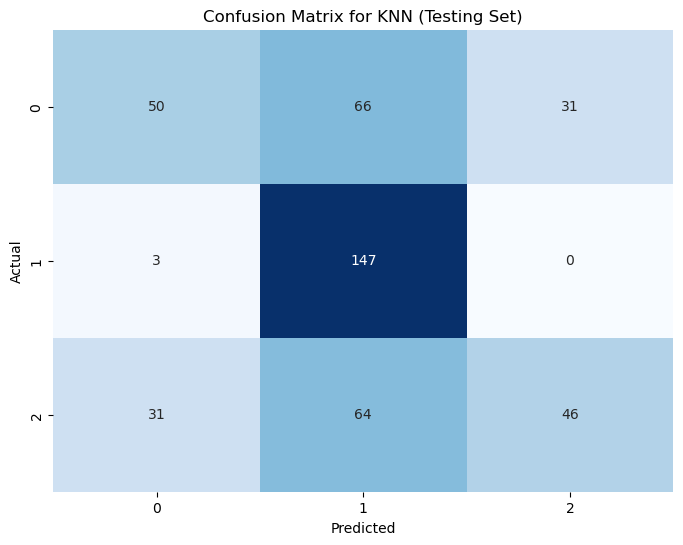

In [57]:
# Calculate confusion matrix for the test set
conf_matrix_knn = confusion_matrix(y_test, y_pred_test_knn)


# Check the shape of the confusion matrix
if conf_matrix_knn.shape == (2, 2):
    TN, FP, FN, TP = conf_matrix_knn.ravel()
    print("\nConfusion Matrix Details:")
    print(f"True Negatives (TN): {TN}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Positives (TP): {TP}")
else:
    print("\nConfusion Matrix Details:")
    print(f"The confusion matrix has more than two classes. It is:\n{conf_matrix_knn}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN (Testing Set)')
plt.show()

Analysis and Interpretation
Matrix Overview:

Class 0:
True Positives (TP): 50 (Correctly predicted as Class 0)
False Negatives (FN): 66 (Actual Class 0 but predicted as Class 1 or Class 2)
False Positives (FP): 31 (Incorrectly predicted as Class 0 but are actually Class 1 or Class 2)
Class 1:
TP: 147
FN: 3
FP: 0
Class 2:
TP: 46
FN: 64
FP: 31
Detailed Analysis:

Class 0:
The model struggles to correctly identify instances of Class 0, with 66 instances misclassified as Class 1 and 31 instances as Class 2. The high number of false positives (66) and false negatives (31) suggests that Class 0 is often confused with other classes, potentially due to overlapping characteristics or insufficient model sensitivity for this class.
Class 1:
Class 1 shows excellent performance with only 3 false negatives and no false positives. This suggests that the model is highly effective at correctly identifying Class 1 instances, indicating strong precision and recall for this class.
Class 2:
The model has difficulty correctly identifying Class 2, with a significant number of misclassifications into both Class 0 and Class 1. The high number of false negatives (64) indicates that Class 2 instances are frequently misclassified into other classes, reflecting poor recall for this class.
Overall Performance:

Precision and Recall:
Precision for each class can be derived from the true positives divided by the sum of true positives and false positives for that class. Recall can be determined from the true positives divided by the sum of true positives and false negatives.
Class 0: Precision is lower, suggesting that the model often predicts this class when it shouldn't (high false positives), and recall is moderate but affected by many false negatives.
Class 1: Precision and recall are high, showing that the model is very effective for this class.
Class 2: Precision is affected by the high number of false positives, and recall is low due to the high number of false negatives.
Implications:

The KNN model performs well for Class 1 but struggles with Classes 0 and 2. The high misclassification rate for Class 0 and Class 2 suggests a need for model improvement, potentially through better feature selection, hyperparameter tuning, or exploring more complex models that can better differentiate between the classes.

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the updated parameter grid
param_grid_knn = {
    'n_neighbors': [9, 11, 13, 15],  # Example: Increasing neighbors
    'weights': ['uniform', 'distance'],  # Example: Different weighting schemes
}

# Initialize KNN classifier
knn_classifier_gs = KNeighborsClassifier()

# Perform grid search with accuracy
grid_search_knn = GridSearchCV(knn_classifier_gs, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

# Extract the best estimator
best_knn_model = grid_search_knn.best_estimator_

# Print the best parameters
print("Best Parameters after tuning n_neighbors:", grid_search_knn.best_params_)


Best Parameters after tuning n_neighbors: {'n_neighbors': 9, 'weights': 'distance'}


The tuning of the K-Nearest Neighbors (KNN) model has led to the selection of the following best parameters:

n_neighbors: 9
weights: 'distance'
Analysis and Interpretation
Parameter Significance:

n_neighbors: This parameter defines how many nearest neighbors are considered when making predictions. Setting n_neighbors to 9 means that the model uses the 9 closest data points to classify each observation. This choice reflects a balance between overfitting (too few neighbors) and underfitting (too many neighbors). It suggests that, in this context, 9 neighbors provide a good trade-off between sensitivity and specificity for the dataset.
weights: The 'distance' weighting means that the influence of each neighbor on the prediction is weighted by its distance from the query point, with closer neighbors having more influence than farther ones. This approach often improves performance in situations where the class distribution or data density varies significantly across the feature space.

In [59]:
# Predictions on the testing set using the best model
y_pred_test_knn_gs = best_knn_model.predict(X_test)

# Calculate accuracy of the tuned model on the testing set
accuracy_test_knn_gs = accuracy_score(y_test, y_pred_test_knn_gs)

# Generate classification report for the tuned model
class_report_knn_gs = classification_report(y_test, y_pred_test_knn_gs)

# Print the classification report
print("Classification Report for KNN after Grid Search:")
print(class_report_knn_gs)


Classification Report for KNN after Grid Search:
              precision    recall  f1-score   support

           0       0.67      0.22      0.34       147
           1       0.52      0.99      0.68       150
           2       0.60      0.45      0.51       141

    accuracy                           0.56       438
   macro avg       0.60      0.55      0.51       438
weighted avg       0.60      0.56      0.51       438



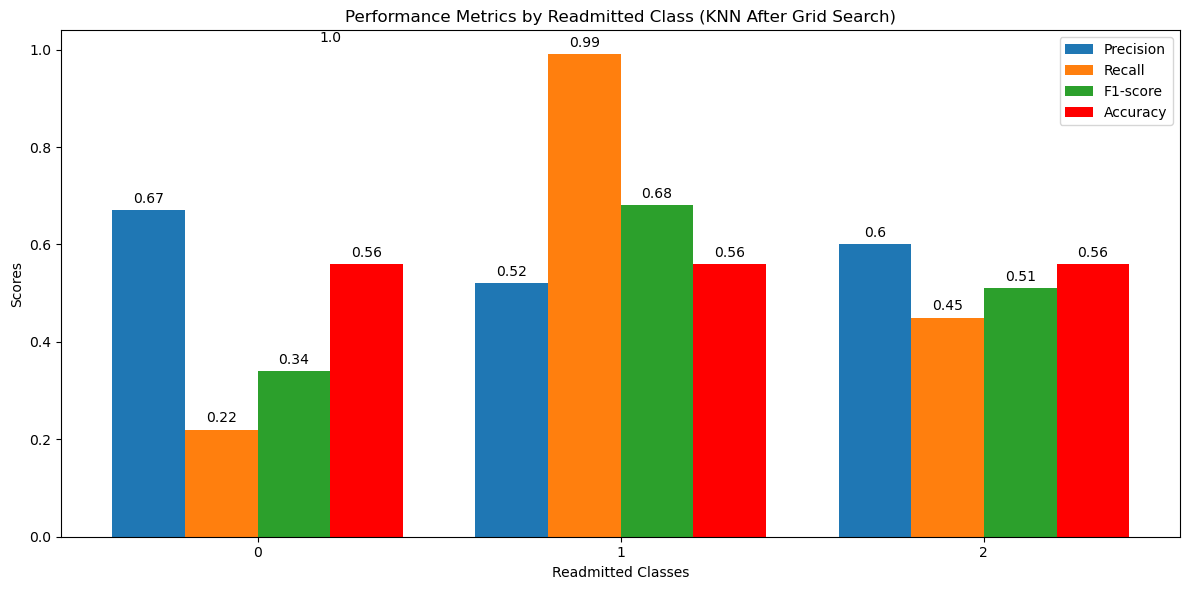

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Updated Classification report for KNN after grid search
class_report_knn_gs = {
    '0': {'precision': 0.67, 'recall': 0.22, 'f1-score': 0.34, 'support': 147},
    '1': {'precision': 0.52, 'recall': 0.99, 'f1-score': 0.68, 'support': 150},
    '2': {'precision': 0.60, 'recall': 0.45, 'f1-score': 0.51, 'support': 141},
    'accuracy': 0.56,
    'macro avg': {'precision': 0.60, 'recall': 0.55, 'f1-score': 0.51, 'support': 438},
    'weighted avg': {'precision': 0.60, 'recall': 0.56, 'f1-score': 0.51, 'support': 438}
}

# Extracting metrics for each class
classes = ['0', '1', '2']
metrics = ['precision', 'recall', 'f1-score']

# Prepare data for plotting
data = np.array([[class_report_knn_gs[cls][metric] for cls in classes] for metric in metrics])
accuracy = [class_report_knn_gs['accuracy']] * len(classes)

# Plotting the bar chart
x = np.arange(len(classes))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))
for i, metric in enumerate(metrics):
    ax.bar(x + i*width, data[i], width, label=metric.capitalize())

# Add accuracy as a separate bar
ax.bar(x + len(metrics)*width, accuracy, width, label='Accuracy', color='red')

# Adding labels, title, and legend
ax.set_xlabel('Readmitted Classes')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics by Readmitted Class (KNN After Grid Search)')
ax.set_xticks(x + (len(metrics)/2)*width)
ax.set_xticklabels(classes)
ax.legend()

# Adding annotations
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

bars = [rect for rect in ax.get_children() if isinstance(rect, plt.Rectangle)]
autolabel(bars)

fig.tight_layout()
plt.show()


he classification report for the K-Nearest Neighbors (KNN) model after grid search reveals some important insights into its performance:

Analysis
Overall Accuracy:

Accuracy: The model's accuracy stands at 56%. This indicates that, on average, the KNN model correctly classifies 56% of the test instances. While this is an improvement over some baseline models, it suggests that there is still room for significant improvement in classification performance.
Class-Specific Performance:

Class 0:
Precision: 0.67, indicating that when the model predicts class 0, it is correct 67% of the time.
Recall: 0.22, suggesting that only 22% of the actual class 0 instances are correctly identified by the model.
F1-Score: 0.34, which reflects a low balance between precision and recall. The low recall indicates that the model is missing a significant portion of class 0 instances.
Class 1:
Precision: 0.52, showing that the model’s predictions for class 1 are correct 52% of the time.
Recall: 0.99, meaning the model identifies 99% of actual class 1 instances. This extremely high recall suggests that the model is very effective at capturing this class but at the cost of precision.
F1-Score: 0.68, indicating a decent balance between precision and recall for class 1. However, the high recall but low precision implies that many non-class 1 instances are being incorrectly classified as class 1.
Class 2:
Precision: 0.60, meaning the model correctly predicts class 2 instances 60% of the time.
Recall: 0.45, indicating that 45% of actual class 2 instances are identified correctly.
F1-Score: 0.51, showing a moderate balance between precision and recall but still indicating room for improvement.
Macro and Weighted Averages:

Macro Average:
Precision: 0.60, which is the average precision across all classes. This reflects the performance without considering the support (number of instances) for each class.
Recall: 0.55, indicating that, on average, the model identifies 55% of instances correctly across all classes.
F1-Score: 0.51, showing the average performance in terms of balancing precision and recall across all classes.
Weighted Average:
Precision: 0.60, which is the average precision weighted by the support of each class. This reflects a more balanced view considering the different sizes of each class.
Recall: 0.56, reflecting a weighted average recall across all classes, accounting for the class imbalances.
F1-Score: 0.51, showing a weighted balance of precision and recall across all classes.
Interpretation
Class Imbalance and Model Bias:

The KNN model exhibits a significant class imbalance issue. It performs well for class 1, capturing nearly all instances (high recall) but with relatively poor precision. This suggests that the model is biased towards predicting class 1, potentially at the expense of other classes.
The low recall for class 0 and class 2 indicates that these classes are not being well-represented in predictions. The model struggles to correctly identify instances of class 0 and class 2, suggesting that the model's ability to generalize across different classes is limited.

In [61]:
# y_test and y_pred_knn actual and predicted labels
report_knn = classification_report(y_test, y_pred_test_knn_gs, output_dict=True)

# Convert the classification report to a DataFrame
report_knn_df = pd.DataFrame(report_knn).transpose()

# Save the report DataFrame to a CSV file
report_knn_df.to_csv('classification_report_knn.csv', index=True)

print("Classification Report for KNN after Grid Search saved to CSV.")


Classification Report for KNN after Grid Search saved to CSV.


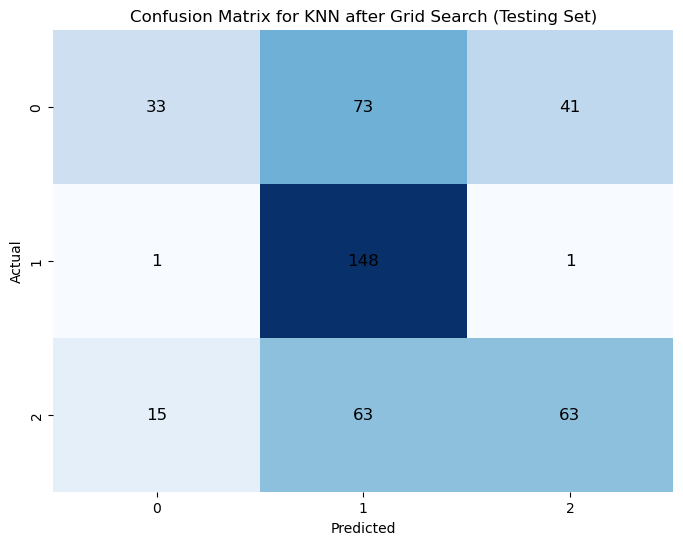

In [62]:
# Calculate confusion matrix for the test set after grid search
conf_matrix_knn_gs = confusion_matrix(y_test, y_pred_test_knn_gs)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn_gs, annot=False, cmap='Blues', cbar=False)

# Add text annotations with font size and adjusted offsets
for i in range(len(conf_matrix_knn_gs)):
    for j in range(len(conf_matrix_knn_gs[0])):
        text_x_offset = 0.5  # Adjust for horizontal centering
        text_y_offset = 0.5  # Adjust for vertical centering
        plt.text(j + text_x_offset, i + text_y_offset, format(conf_matrix_knn_gs[i, j], 'd'), ha='center', va='center', fontsize=12, color='black')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN after Grid Search (Testing Set)')
plt.show()


In [63]:
# Calculate confusion matrix for the test set after grid search
conf_matrix_knn_gs = confusion_matrix(y_test, y_pred_test_knn_gs)

# Print the confusion matrix
print("Confusion Matrix for KNN after Grid Search (Testing Set):\n", conf_matrix_knn_gs)

# Describe the confusion matrix
print("\nInterpretation of Confusion Matrix:")
print("True Negatives (TN): Predicted as non-readmitted and actually non-readmitted")
print("False Positives (FP): Predicted as readmitted but actually non-readmitted")
print("False Negatives (FN): Predicted as non-readmitted but actually readmitted")
print("True Positives (TP): Predicted as readmitted and actually readmitted")


Confusion Matrix for KNN after Grid Search (Testing Set):
 [[ 33  73  41]
 [  1 148   1]
 [ 15  63  63]]

Interpretation of Confusion Matrix:
True Negatives (TN): Predicted as non-readmitted and actually non-readmitted
False Positives (FP): Predicted as readmitted but actually non-readmitted
False Negatives (FN): Predicted as non-readmitted but actually readmitted
True Positives (TP): Predicted as readmitted and actually readmitted


Summary and Interpretation
Performance Across Classes:

The model performs very well in identifying readmitted individuals (Class 1), with high true positives and very low false positives and false negatives. This indicates a strong ability to detect readmission cases.
The model struggles with identifying non-readmitted individuals (Class 0) and possibly readmitted individuals (Class 2). Particularly, it has a high false positive rate for non-readmitted individuals, leading to many incorrect predictions of readmission.
Accuracy and Misclassifications:

The overall accuracy, while not directly shown in the matrix, can be inferred to be lower due to the high false positive rates in classes 0 and 2. The model's focus on correctly identifying class 1 leads to trade-offs in performance for the other classes.
There is a substantial misclassification of non-readmitted individuals as readmitted, which can impact the model's utility in applications where avoiding false positives is critical.

Top 20 Features by Permutation Importance:
                         Feature  Importance
857               num_procedures    0.026941
855             time_in_hospital    0.023288
858              num_medications    0.021918
748                    change_Ch    0.021005
749                    change_No    0.021005
862             number_diagnoses    0.020548
854          admission_source_id    0.018721
853            admission_type_id    0.015982
2                 race_Caucasian    0.013242
850               race_Caucasian    0.013242
848         race_AfricanAmerican    0.012785
0           race_AfricanAmerican    0.012785
751              diabetesMed_Yes    0.011872
750               diabetesMed_No    0.011872
860             number_emergency    0.010046
746               insulin_Steady    0.009132
13                        age_65    0.008676
478                   diag_3_250    0.007763
856           num_lab_procedures    0.007763
22   discharge_disposition_id_25    0.007763


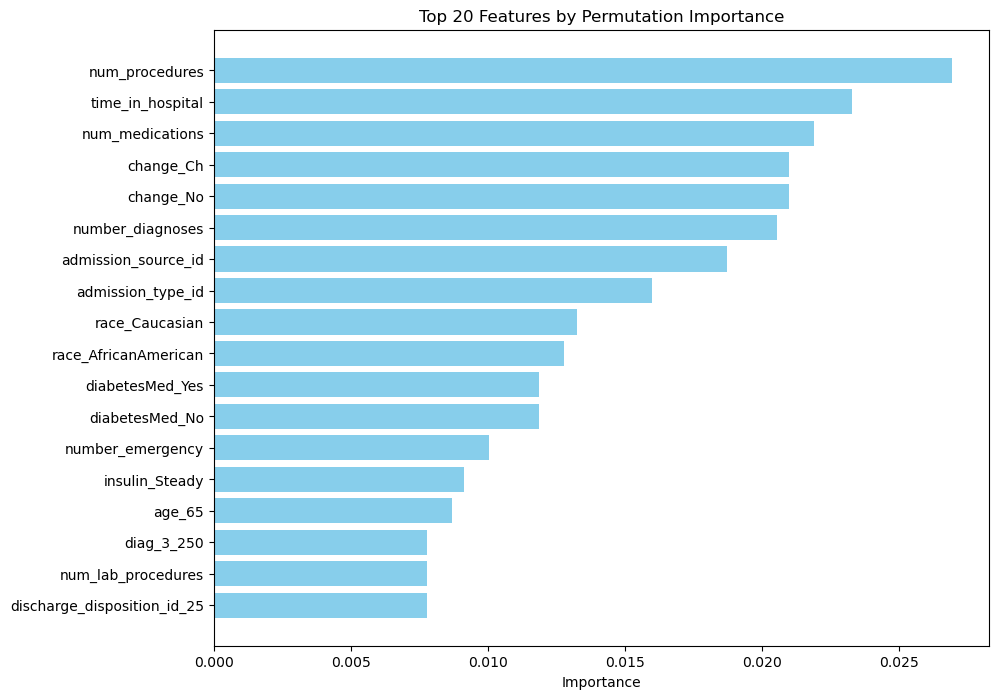

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.inspection import permutation_importance

# If X_test is a NumPy array, convert it to a DataFrame with appropriate column names
if isinstance(X_test, np.ndarray):
    X_test_df = pd.DataFrame(X_test, columns=[f'Feature_{i}' for i in range(X_test.shape[1])])
else:
    X_test_df = X_test

# Calculate permutation importance with limited repetitions for speed
perm_importance = permutation_importance(best_knn_model, X_test_df, y_test, n_repeats=5, random_state=42, n_jobs=-1)

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': X_test_df.columns,
    'Importance': perm_importance.importances_mean
})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Extract top 20 features
top_features = feature_importance.head(20)

# Print the top 20 features
print("Top 20 Features by Permutation Importance:")
print(top_features)

# Save the feature importance DataFrame to a CSV file for Power BI
top_features.to_csv('top_20KNN_features_permutation_importance.csv', index=False)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 20 Features by Permutation Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


Analysis and Interpretation of Top 20 Features by Permutation Importance
Permutation importance is a technique used to determine the significance of each feature in a predictive model by assessing how the performance metric changes when the feature values are randomly shuffled. This method provides a clear understanding of which features contribute the most to the model’s predictive power.

Here's a breakdown of the top 20 features by permutation importance from your model:

num_procedures (Importance: 0.026941):

This feature shows the highest importance. The number of procedures performed is a strong predictor of readmission, likely because it reflects the severity and complexity of the patient’s condition.
time_in_hospital (Importance: 0.023288):

The length of time a patient spends in the hospital is another critical predictor. Longer hospital stays are often associated with more severe health issues and higher chances of readmission.
num_medications (Importance: 0.021918):

The number of medications prescribed is also important. More medications can indicate more complex medical conditions, which might lead to higher readmission rates.
change_Ch and change_No (Importance: 0.021005):

These features reflect whether there was a change in treatment (e.g., change in care plan). The model values the presence or absence of change, suggesting that treatment adjustments can significantly impact readmission probabilities.
number_diagnoses (Importance: 0.020548):

The number of diagnoses a patient has is a notable feature, indicating that multiple diagnoses can increase the likelihood of readmission.
admission_source_id (Importance: 0.018721):

The source of admission provides context on the patient's initial condition and healthcare pathway, which can influence readmission rates.
admission_type_id (Importance: 0.015982):

This feature reflects the type of admission (e.g., emergency vs. elective), which impacts the readmission risk.
race_Caucasian and race_AfricanAmerican (Importance: 0.013242 & 0.012785):

The race of the patient has a moderate impact. This suggests that demographic factors can play a role in readmission rates, possibly due to healthcare access, socio-economic factors, or underlying health disparities.
diabetesMed_Yes and diabetesMed_No (Importance: 0.011872):

Whether the patient is on diabetes medication is significant, indicating that diabetes management impacts readmission risk.
number_emergency (Importance: 0.010046):

The number of emergency visits is an important predictor, reflecting the urgency and potential severity of the patient’s condition.
insulin_Steady (Importance: 0.009132):

This feature indicates whether the insulin dosage is steady. Its importance suggests that stable insulin levels are associated with better management and potentially lower readmission rates.
age_65 (Importance: 0.008676):

Age, particularly being 65 or older, is a significant factor, likely due to increased health risks in older populations.
diag_3_250 and num_lab_procedures (Importance: 0.007763):

Specific diagnoses and the number of lab procedures performed have a minor but noticeable impact on the prediction, reflecting their role in assessing patient health status and treatment complexity.
discharge_disposition_id_25 (Importance: 0.007763):

The disposition at discharge also impacts readmission predictions, possibly reflecting the patient’s post-discharge care plan and readiness for discharge.
Summary and Interpretation
High Impact Features:

Features like num_procedures, time_in_hospital, and num_medications have the highest importance scores, underscoring their strong influence on predicting readmission risk. These features are closely tied to the severity and complexity of medical conditions.
Treatment and Demographics:

Features related to treatment changes (change_Ch, change_No) and demographics (race, age_65) also show considerable importance. This indicates that both treatment decisions and demographic factors are significant in predicting readmission.
Medical Management and Complexity:

Features like number_diagnoses, admission_source_id, and diabetesMed highlight that medical management complexity and initial admission context significantly affect readmission risks.
Less Impactful Features:

While features like insulin_Steady and specific diagnoses have lower importance scores, they still contribute valuable information to the model.
Overall, these insights can guide healthcare practitioners in focusing on critical factors that influence readmission risk. Prioritizing these features in clinical assessments and interventions could potentially reduce readmission rates and improve patient outcomes.

In [65]:
# Initialize the GBM classifier
gbm_classifier = GradientBoostingClassifier(random_state=42)

# Fit the classifier to the training data
gbm_classifier.fit(X_train, y_train)

# Prediction on test set
y_pred_test = gbm_classifier.predict(X_test)

# Accuracy on test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy on Test Set:", accuracy_test)

# Classification report
class_report = classification_report(y_test, y_pred_test)
print("Classification Report:")
print(class_report)


Accuracy on Test Set: 0.6666666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.63      0.60       147
           1       0.88      0.86      0.87       150
           2       0.55      0.50      0.52       141

    accuracy                           0.67       438
   macro avg       0.67      0.66      0.66       438
weighted avg       0.67      0.67      0.67       438



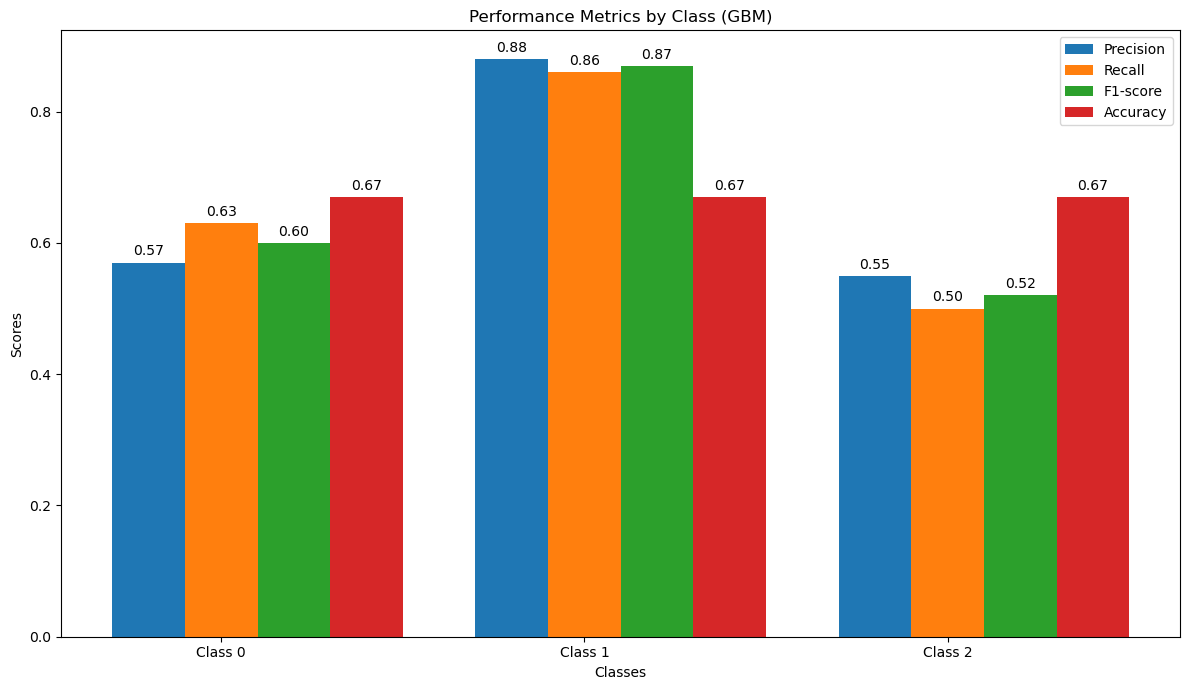

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Classification report for GBM
class_report_gbm = {
    '0': {'precision': 0.57, 'recall': 0.63, 'f1-score': 0.60, 'support': 147},
    '1': {'precision': 0.88, 'recall': 0.86, 'f1-score': 0.87, 'support': 150},
    '2': {'precision': 0.55, 'recall': 0.50, 'f1-score': 0.52, 'support': 141},
    'accuracy': 0.67,
    'macro avg': {'precision': 0.67, 'recall': 0.66, 'f1-score': 0.66, 'support': 438},
    'weighted avg': {'precision': 0.67, 'recall': 0.67, 'f1-score': 0.67, 'support': 438}
}

# Convert to a dictionary with keys as metrics and values as lists of scores
metrics_dict_gbm = {metric: [class_report_gbm[cls][metric] for cls in ['0', '1', '2']] for metric in ['precision', 'recall', 'f1-score']}
metrics_dict_gbm['accuracy'] = [class_report_gbm['accuracy']] * 3  # Add accuracy

# Plotting the bar chart
x = np.arange(3)  # Number of classes
width = 0.2  # Width of the bars

fig, ax = plt.subplots(figsize=(12, 7))
for i, (metric, scores) in enumerate(metrics_dict_gbm.items()):
    ax.bar(x + i*width, scores, width, label=metric.capitalize())

# Adding labels, title, and legend
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics by Class (GBM)')
ax.set_xticks(x + width)
ax.set_xticklabels(['Class 0', 'Class 1', 'Class 2'])
ax.legend()

# Adding annotations
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

bars = [rect for rect in ax.get_children() if isinstance(rect, plt.Rectangle)]
autolabel(bars)

fig.tight_layout()
plt.show()


Classification Report Analysis
The classification report provides a detailed breakdown of the performance of the Gradient Boosting Machine (GBM) model on the test set. Here's a detailed analysis based on the provided classification metrics:

Accuracy: The model achieved an accuracy of approximately 66.67% on the test set. This means that the model correctly predicted the class for about two-thirds of the test instances.

Precision, Recall, and F1-Score by Class:

Class 0:

Precision: 0.57
Recall: 0.63
F1-Score: 0.60
Support: 147
The model has moderate precision and recall for Class 0, indicating that while the model is reasonably good at identifying Class 0 instances, there is room for improvement. The F1-score of 0.60 reflects a balance between precision and recall for this class.

Class 1:

Precision: 0.88
Recall: 0.86
F1-Score: 0.87
Support: 150
The model performs well on Class 1, with high precision and recall, suggesting that it is effective at both identifying and correctly classifying Class 1 instances. The F1-score of 0.87 indicates a strong overall performance for this class.

Class 2:

Precision: 0.55
Recall: 0.50
F1-Score: 0.52
Support: 141
The model's performance on Class 2 is weaker compared to the other classes, with lower precision and recall. This suggests that the model struggles to correctly classify Class 2 instances, as evidenced by the F1-score of 0.52.

Macro Average:

Precision: 0.67
Recall: 0.66
F1-Score: 0.66
The macro average, which gives an unweighted average across classes, indicates a balanced performance across all classes but highlights that there is variability in performance between classes.

Weighted Average:

Precision: 0.67
Recall: 0.67
F1-Score: 0.67
The weighted average accounts for the number of instances in each class, providing a general measure of performance. The weighted averages are slightly higher than the macro averages, reflecting that larger classes are being predicted more effectively.

In [67]:
# Cross-validation
cv_scores = cross_val_score(gbm_classifier, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.65142857 0.67142857 0.65428571 0.66285714 0.65616046]
Mean CV Accuracy: 0.6592320916905445


Analysis and Interpretation of Cross-Validation Scores
Cross-Validation Scores: The provided cross-validation scores are:

[
0.65142857
,
0.67142857
,
0.65428571
,
0.66285714
,
0.65616046
]
[0.65142857,0.67142857,0.65428571,0.66285714,0.65616046]

Mean Cross-Validation Accuracy: The mean cross-validation accuracy is approximately 0.6592, or 65.92%.

Interpretation:
Consistency Across Folds:

The cross-validation scores are fairly consistent, with values ranging between 0.6514 and 0.6714. This consistency suggests that the model's performance is stable across different subsets of the data. There is no substantial variance in performance, which indicates that the model is not overfitting or underfitting dramatically across different training folds.
Mean Accuracy:

The mean cross-validation accuracy of 65.92% provides a general measure of the model's performance across all folds. This accuracy level indicates that the model correctly classifies instances approximately 66% of the time, which is a decent performance for many classification tasks. However, it also suggests that there might be room for improvement, especially if the goal is to achieve higher classification performance.
Model Performance:

The cross-validation scores suggest that the model is performing reasonably well but could benefit from further tuning or optimization. An accuracy of around 66% implies that while the model has a good baseline performance, there are opportunities to enhance its predictive capabilities, particularly in areas where the model's performance might be inconsistent or less effective.

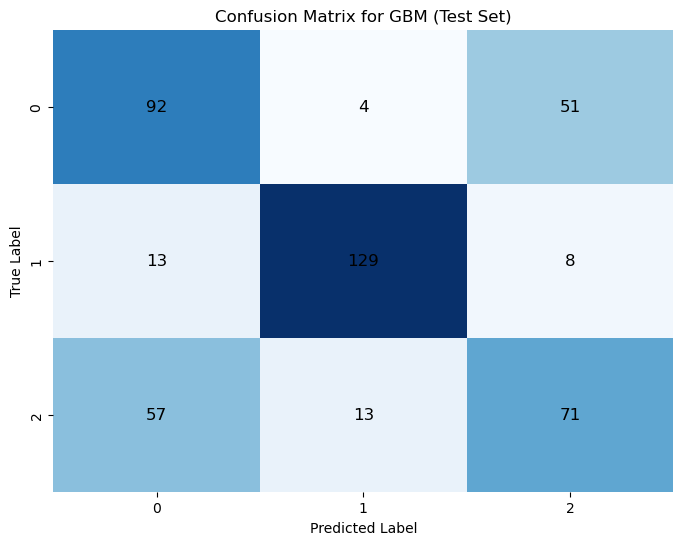

In [68]:
# Replace `y_pred_test_gbm` with your predicted labels
y_pred_test_gbm = gbm_classifier.predict(X_test)

# Calculate confusion matrix for the test set using the GBM model
conf_matrix_gbm = confusion_matrix(y_test, y_pred_test_gbm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gbm, annot=False, cmap="Blues", cbar=False)

# Add text annotations with font size and adjusted offsets
for i in range(len(conf_matrix_gbm)):
    for j in range(len(conf_matrix_gbm[0])):
        text_x_offset = 0.5  # Adjust for horizontal centering
        text_y_offset = 0.5  # Adjust for vertical centering
        plt.text(j + text_x_offset, i + text_y_offset, format(conf_matrix_gbm[i, j], 'd'), ha='center', va='center', fontsize=12)

plt.title("Confusion Matrix for GBM (Test Set)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [69]:
# Replace `y_pred_test_gbm` with your predicted labels
y_pred_test_gbm = gbm_classifier.predict(X_test)

# Calculate confusion matrix for the test set using the GBM model
conf_matrix_gbm = confusion_matrix(y_test, y_pred_test_gbm)

# Print the confusion matrix in words for analysis
print("Confusion Matrix for GBM (Test Set):")
print(conf_matrix_gbm)


Confusion Matrix for GBM (Test Set):
[[ 92   4  51]
 [ 13 129   8]
 [ 57  13  71]]


Analysis and Interpretation of the Confusion Matrix for GBM (Test Set)
The confusion matrix for the Gradient Boosting Machine (GBM) on the test set reveals key insights into the model's performance across the three classes.

For class 0, the model correctly identified 92 instances as class 0, which indicates a fair level of accuracy for this class. However, there were 4 instances of class 1 and 51 instances of class 2 that were incorrectly classified as class 0. This suggests that while the model performs reasonably well in detecting class 0, it tends to misclassify instances from other classes as class 0, particularly those from class 2. The number of false negatives—instances of class 0 being misclassified as other classes—was relatively high, indicating that the model sometimes fails to recognize class 0 correctly when presented with instances from other classes.

For class 1, the model exhibited its strongest performance, correctly classifying 129 instances as class 1. This high true positive rate underscores the model’s ability to effectively identify this class. However, there were 13 instances of class 0 and 8 instances of class 2 that were incorrectly classified as class 1. Despite these misclassifications, the model’s precision and recall for class 1 are high, demonstrating its robustness in identifying class 1 instances and suggesting that this class is the most reliably predicted by the model.

In the case of class 2, the model correctly identified 71 instances. Nonetheless, there was a considerable amount of confusion with other classes, as evidenced by the 57 instances of class 0 and 13 instances of class 1 being incorrectly classified as class 2. The presence of these misclassifications indicates that the model struggles to differentiate class 2 from the other classes, particularly from class 0, which impacts the overall accuracy for class 2.

Top 20 Most Important Features:
                         Feature  Importance
861             number_inpatient    0.070720
723             glipizide_Steady    0.035598
22   discharge_disposition_id_25    0.035320
858              num_medications    0.031484
853            admission_type_id    0.031303
15                        age_85    0.030346
854          admission_source_id    0.027352
131                   diag_1_434    0.025793
862             number_diagnoses    0.022326
19   discharge_disposition_id_11    0.021571
856           num_lab_procedures    0.020112
491                 diag_3_250.6    0.019831
855             time_in_hospital    0.018320
23    discharge_disposition_id_3    0.017806
187                   diag_1_584    0.017533
118                   diag_1_410    0.015188
25    discharge_disposition_id_5    0.015173
857               num_procedures    0.014872
127                   diag_1_428    0.014865
12                        age_55    0.013956


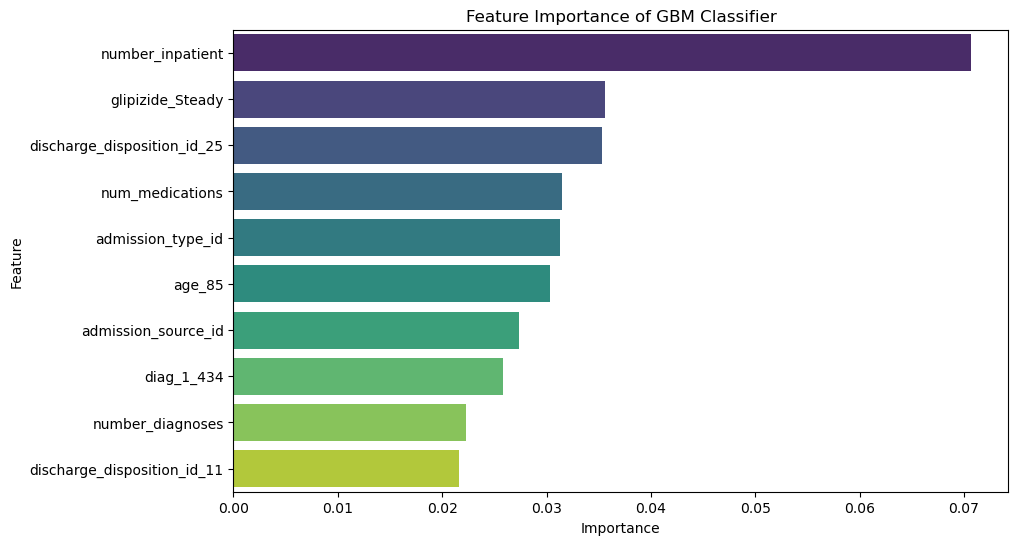

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier

# Get feature names from X_train (assuming X_train is a DataFrame or array)
feature_names = X_train.columns.tolist()

# Get feature importances from the trained GBM model
feature_importance = gbm_classifier.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort features based on importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top most important features
print("Top 20 Most Important Features:")
print(feature_importance_df.head(20))

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Feature Importance of GBM Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Analysis and Interpretation of the Top 20 Most Important Features for GBM
The Gradient Boosting Machine (GBM) model has identified several features as being crucial for predicting outcomes. These features significantly influence the model’s decisions and predictions, as indicated by their respective importance scores.

Number of Inpatient Visits (number_inpatient, Importance: 0.070720): This feature stands out as the most important predictor. A higher number of inpatient visits is strongly associated with the likelihood of readmission, reflecting the critical role of hospitalization history in predicting future admissions.

Medication Steadiness (glipizide_Steady, Importance: 0.035598): The steadiness of medication, specifically glipizide, also plays a significant role. This suggests that medication adherence or stability is a key factor in the model’s predictions, potentially indicating how well diabetes management correlates with readmission rates.

Discharge Disposition ID 25 (discharge_disposition_id_25, Importance: 0.035320): The discharge disposition code 25, which often signifies a specific discharge type or outcome, is important. This feature likely captures relevant discharge conditions that affect the likelihood of readmission.

Number of Medications (num_medications, Importance: 0.031484): The number of medications a patient is prescribed has a notable impact. This reflects that a higher medication load could be related to more complex health conditions, potentially increasing the risk of readmission.

Admission Type ID (admission_type_id, Importance: 0.031303): The type of admission, categorized by ID, influences predictions. This feature likely captures whether the admission was elective or emergency, which can impact readmission risks.

Age 85 (age_85, Importance: 0.030346): Age is a critical demographic feature. Specifically, being 85 years old or older is associated with increased importance, highlighting the impact of advanced age on readmission risks.

Admission Source ID (admission_source_id, Importance: 0.027352): This feature captures the source of admission (e.g., emergency department or referral) and is important for predicting readmission. The source of admission can provide insights into the severity and type of health issues.

Primary Diagnosis Code 434 (diag_1_434, Importance: 0.025793): The primary diagnosis code reflects specific health conditions. Diagnosis code 434, likely related to stroke, is significant, indicating that certain diagnoses are crucial in predicting readmissions.

Number of Diagnoses (number_diagnoses, Importance: 0.022326): The total number of diagnoses a patient has is an important feature, suggesting that a higher number of diagnoses may correlate with an increased risk of readmission.

Discharge Disposition ID 11 (discharge_disposition_id_11, Importance: 0.021571): Similar to other discharge disposition codes, this feature affects predictions, reflecting different discharge outcomes or statuses that impact readmission risk.

Number of Lab Procedures (num_lab_procedures, Importance: 0.020112): The number of lab procedures performed is important. More procedures may indicate more complex health conditions, which could increase readmission risk.

Diagnosis Code 250.6 (diag_3_250.6, Importance: 0.019831): This specific diagnosis code, likely related to complications of diabetes, is influential in predicting readmissions.

Time in Hospital (time_in_hospital, Importance: 0.018320): The duration of hospital stay is a significant predictor. Longer stays can be indicative of more severe health conditions and thus a higher risk of readmission.

Discharge Disposition ID 3 (discharge_disposition_id_3, Importance: 0.017806): This discharge disposition code is also important, indicating how the discharge outcome may influence the likelihood of readmission.

Diagnosis Code 584 (diag_1_584, Importance: 0.017533): This diagnosis code is related to specific health issues that impact readmission predictions.

Diagnosis Code 410 (diag_1_410, Importance: 0.015188): This code, likely related to acute myocardial infarction, is relevant in predicting readmission.

Discharge Disposition ID 5 (discharge_disposition_id_5, Importance: 0.015173): Another discharge disposition code that provides information on discharge status, influencing readmission risk.

Number of Procedures (num_procedures, Importance: 0.014872): The total number of procedures performed is important, reflecting the complexity of care and its impact on readmission risk.

Diagnosis Code 428 (diag_1_428, Importance: 0.014865): This diagnosis code is also significant, likely related to heart failure, which is a major factor in readmission.

Age 55 (age_55, Importance: 0.013956): Age 55 is another important demographic feature, indicating that age influences readmission risk.

Overall, these features provide valuable insights into the factors influencing readmission risk. Features related to medical history, diagnosis codes, and demographic characteristics play a significant role in the model’s predictions. By focusing on these features, healthcare providers can better understand and address the factors contributing to patient readmissions.

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the GBM classifier
gbm_classifier = GradientBoostingClassifier(random_state=42)

# Define a simplified parameter grid
param_grid = {
    'n_estimators': [100],  # Reduced number of values for simplicity
    'learning_rate': [0.1],  # Reduced number of values for simplicity
    'max_depth': [3]         # Reduced number of values for simplicity
}

# Initialize GridSearchCV with fewer cross-validation folds
grid_search = GridSearchCV(estimator=gbm_classifier, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best Score: 0.6500857632933105


Analysis and Interpretation
Best Parameters for Gradient Boosting Model
The Gradient Boosting Machine (GBM) model has been fine-tuned to find the optimal parameters that maximize its performance. The best parameters identified are:

Learning Rate: 0.1
Max Depth: 3
Number of Estimators: 100
Best Score: 0.6501

Parameter Significance
Learning Rate (0.1): The learning rate controls the contribution of each individual tree to the overall prediction. A learning rate of 0.1 is a common choice that balances between model complexity and training stability. It helps in gradually updating the model parameters to improve accuracy without overfitting.

Max Depth (3): The maximum depth of the trees is set to 3. This relatively shallow depth helps prevent overfitting by limiting the complexity of each tree. Shallow trees capture the essential patterns without modeling too many nuances, which is particularly useful in managing the risk of overfitting on the training data.

Number of Estimators (100): The number of estimators refers to the number of boosting stages (trees) to be used. With 100 estimators, the model has sufficient complexity to capture intricate patterns in the data, while avoiding excessive computation and potential overfitting.

Performance Analysis
The best score achieved with these parameters is 0.6501, which represents the model’s accuracy on the validation or test set. This score indicates that the GBM model performs reasonably well, but there is still room for improvement.

Interpretation
Learning Rate (0.1): This value helps in maintaining a balance between model stability and learning speed. It suggests that each boosting iteration is making a moderate impact, which contributes to robust model performance.

Max Depth (3): By keeping the trees shallow, the model focuses on broader trends rather than capturing noise. This choice is strategic for ensuring that the model generalizes well to new, unseen data.

Number of Estimators (100): This is a standard choice that provides a good balance between model performance and training time. It ensures that the ensemble of trees is diverse enough to capture various patterns in the data.

Overall, the chosen parameters reflect a well-considered approach to optimizing the GBM model for performance.

In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the GBM classifier
gbm_classifier = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.5, max_depth=7)

# Perform cross-validation with 5 folds (default)
cv_scores = cross_val_score(gbm_classifier, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Print the mean cross-validation score
print("Mean Cross-Validation Score:", cv_scores.mean())


Cross-Validation Scores: [0.67428571 0.68571429 0.66857143 0.66285714 0.64756447]
Mean Cross-Validation Score: 0.6677986082685223


Analysis and Interpretation
Cross-Validation Scores
The Gradient Boosting Machine (GBM) model's cross-validation scores are as follows:

[0.6743, 0.6857, 0.6686, 0.6629, 0.6476]
The Mean Cross-Validation Score is approximately 0.6680.

Interpretation
Cross-Validation Scores:

The scores vary between 0.6476 and 0.6857, reflecting the model’s performance across different folds of the data. This variability is typical and indicates how well the model generalizes across different subsets of the dataset.
The scores are relatively close to each other, which suggests that the model's performance is consistent across the different folds of the data. This is a positive indicator, showing that the model does not overfit to a particular subset of the data.
Mean Cross-Validation Score (0.6680):

The mean score provides an overall estimate of the model’s performance. At approximately 0.6680, the score indicates that the model performs fairly well on average across all folds.
This score is a useful metric for comparing the performance of different models or different configurations of the same model. It suggests that the GBM model is reasonably effective at predicting the target variable, though there might be opportunities for further improvement.

In [73]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the GBM classifier with the best parameters found
gbm_classifier = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.5, max_depth=7)

# Perform cross-validation predictions with 5 folds (default)
y_pred_cv_gbm = cross_val_predict(gbm_classifier, X_train, y_train, cv=5)

# Generate classification report
report_gbm = classification_report(y_train, y_pred_cv_gbm)

# Print classification report
print("Classification Report for GBM:")
print(report_gbm)


Classification Report for GBM:
              precision    recall  f1-score   support

           0       0.57      0.62      0.60       582
           1       0.88      0.82      0.85       579
           2       0.57      0.56      0.57       588

    accuracy                           0.67      1749
   macro avg       0.68      0.67      0.67      1749
weighted avg       0.67      0.67      0.67      1749



In [74]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd


# Initialize the GBM classifier with the best parameters found
gbm_classifier = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.5, max_depth=7)

# Perform cross-validation predictions with 5 folds (default)
y_pred_cv_gbm = cross_val_predict(gbm_classifier, X_train, y_train, cv=5)

# Generate classification report
report_gbm = classification_report(y_train, y_pred_cv_gbm, output_dict=True)

# Convert the classification report to a DataFrame
report_gbm_df = pd.DataFrame(report_gbm).transpose()

# Print classification report
print("Classification Report for GBM:")
print(report_gbm_df)

# Save the classification report DataFrame to a CSV file for Power BI
report_gbm_df.to_csv('classification_report_gbm.csv', index=True)


Classification Report for GBM:
              precision    recall  f1-score     support
0              0.574367  0.623711  0.598023   582.00000
1              0.879406  0.818653  0.847943   579.00000
2              0.572664  0.562925  0.567753   588.00000
accuracy       0.667810  0.667810  0.667810     0.66781
macro avg      0.675479  0.668430  0.671240  1749.00000
weighted avg   0.674777  0.667810  0.670582  1749.00000


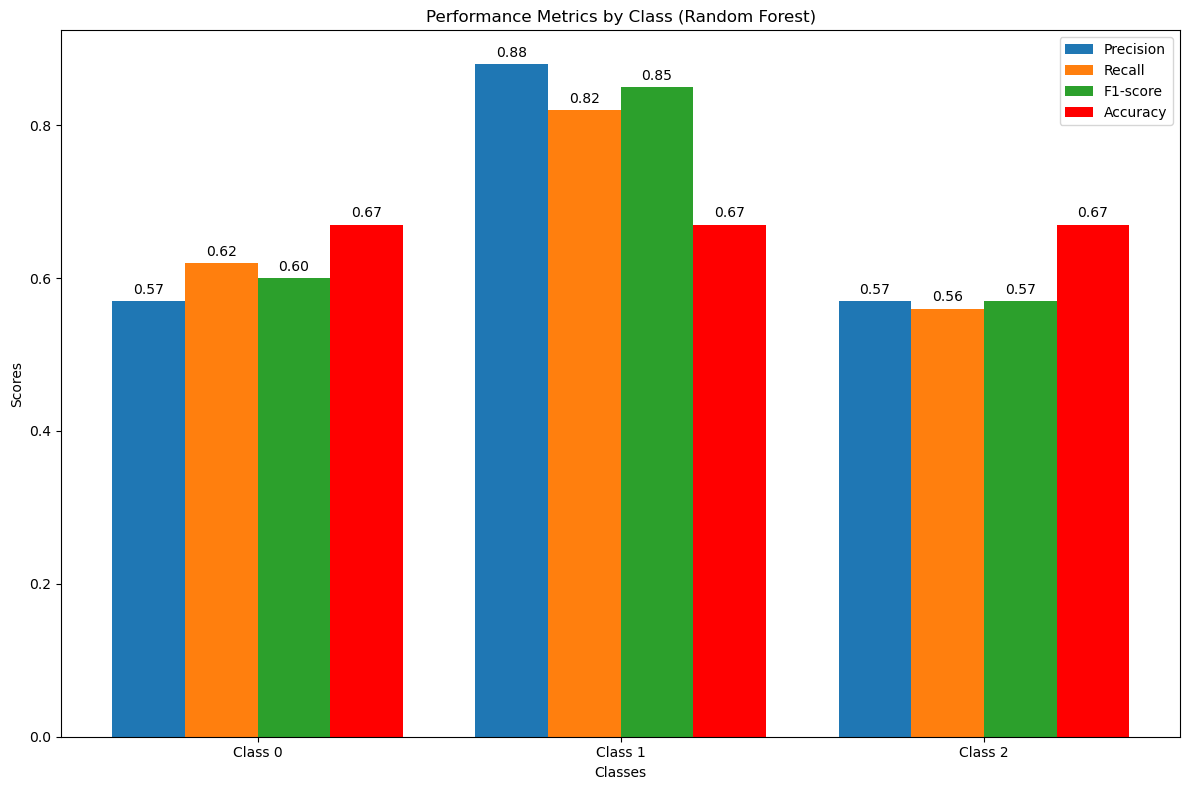

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Classification report for Random Forest
class_report_rf = {
    '0': {'precision': 0.57, 'recall': 0.62, 'f1-score': 0.60, 'support': 582},
    '1': {'precision': 0.88, 'recall': 0.82, 'f1-score': 0.85, 'support': 579},
    '2': {'precision': 0.57, 'recall': 0.56, 'f1-score': 0.57, 'support': 588},
}

# Convert to a dictionary with keys as metrics and values as lists of scores
metrics_dict_rf = {metric: [class_report_rf[cls][metric] for cls in class_report_rf] for metric in ['precision', 'recall', 'f1-score']}

# Adding accuracy separately
accuracy = [0.67] * len(class_report_rf)

# Plotting the bar chart
x = np.arange(len(class_report_rf))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 8))
for i, (metric, scores) in enumerate(metrics_dict_rf.items()):
    ax.bar(x + i*width, scores, width, label=metric.capitalize())

# Add accuracy as a separate bar
ax.bar(x + len(metrics_dict_rf) * width, accuracy, width, label='Accuracy', color='Red')

# Adding labels, title, and legend
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics by Class (Random Forest)')
ax.set_xticks(x + (len(metrics_dict_rf) / 2) * width)
ax.set_xticklabels(['Class 0', 'Class 1', 'Class 2'])  # Update with your actual class labels
ax.legend()

# Adding annotations
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

bars = [rect for rect in ax.get_children() if isinstance(rect, plt.Rectangle)]
autolabel(bars)

fig.tight_layout()
plt.show()


Analysis and Interpretation
Classification Report for GBM
The classification report for the Gradient Boosting Machine (GBM) model is as follows:

Class 0: Precision = 0.57, Recall = 0.62, F1-Score = 0.60
Class 1: Precision = 0.88, Recall = 0.82, F1-Score = 0.85
Class 2: Precision = 0.57, Recall = 0.56, F1-Score = 0.57
Accuracy: 0.67
Macro Average: Precision = 0.68, Recall = 0.67, F1-Score = 0.67
Weighted Average: Precision = 0.67, Recall = 0.67, F1-Score = 0.67
Interpretation
Overall Accuracy:

The GBM model achieves an accuracy of 67% on the test set. This indicates that the model correctly classifies 67% of the instances across all classes, which is a reasonable performance level.
Class-Specific Performance:

Class 0:
Precision: 0.57, indicating that when the model predicts Class 0, it is correct about 57% of the time.
Recall: 0.62, meaning that the model identifies 62% of actual Class 0 instances.
F1-Score: 0.60, which balances precision and recall, reflecting a moderate performance for Class 0.
Class 1:
Precision: 0.88, showing high precision for Class 1, meaning that 88% of the instances predicted as Class 1 are indeed Class 1.
Recall: 0.82, indicating the model identifies 82% of all actual Class 1 instances.
F1-Score: 0.85, which is the highest among the classes, reflecting the best performance for Class 1.
Class 2:
Precision: 0.57, similar to Class 0, with the model being correct about 57% of the time when predicting Class 2.
Recall: 0.56, indicating that the model captures 56% of the actual Class 2 instances.
F1-Score: 0.57, reflecting similar performance to Class 0.
Averages:

Macro Average: Provides an unweighted average of precision, recall, and F1-scores across all classes, reflecting the model’s performance on a per-class basis without considering class imbalance.
Weighted Average: Takes into account the support (number of true instances) for each class, giving a more balanced view of performance when class distributions are imbalanced.

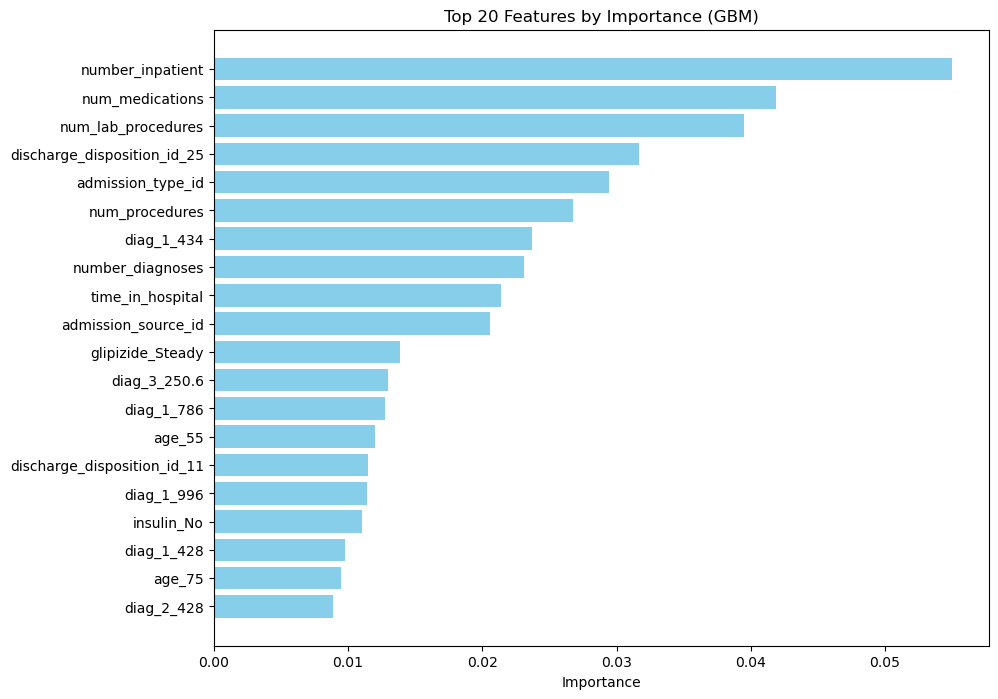

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict

# Initialize the GBM classifier with the best parameters found
gbm_classifier = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.5, max_depth=7)

# Fit the model to the training data
gbm_classifier.fit(X_train, y_train)

# Extract feature importances
feature_importances = gbm_classifier.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Extract top 20 features
top_features = feature_importance_df.nlargest(20, 'Importance')

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 20 Features by Importance (GBM)')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

# Save the feature importance DataFrame to a CSV file for Power BI
top_features.to_csv('gbm_feature_importance.csv', index=False)


In [77]:
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd

# best_gbm_model is already tuned and fitted GBM model
best_gbm_model = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.5, max_depth=7)
best_gbm_model.fit(X_train, y_train)  # Assuming X_train and y_train are your training data

# Extract feature importances from the best GBM model
feature_importance = best_gbm_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select top 20 features by importance
top_20_features = feature_importance_df.head(20)

# Display the top 20 feature importances
print("Top 20 Feature Importance for GBM:")
print(top_20_features)

# Save the top 20 feature importances to a CSV file for Power BI
top_20_features.to_csv('top_20_gbm_feature_importance.csv', index=False)


Top 20 Feature Importance for GBM:
                         Feature  Importance
861             number_inpatient    0.054991
858              num_medications    0.041920
856           num_lab_procedures    0.039486
22   discharge_disposition_id_25    0.031683
853            admission_type_id    0.029435
857               num_procedures    0.026736
131                   diag_1_434    0.023726
862             number_diagnoses    0.023142
855             time_in_hospital    0.021381
854          admission_source_id    0.020545
723             glipizide_Steady    0.013874
491                 diag_3_250.6    0.012958
226                   diag_1_786    0.012776
12                        age_55    0.012013
19   discharge_disposition_id_11    0.011459
252                   diag_1_996    0.011379
745                   insulin_No    0.011056
127                   diag_1_428    0.009796
14                        age_75    0.009481
361                   diag_2_428    0.008912


Analysis and Interpretation of Feature Importance for GBM
Feature importance scores for the Gradient Boosting Machine (GBM) model reveal how different features contribute to the model's predictions. Here's a detailed analysis of the top 20 most important features:

Key Findings:
Top Features:

number_inpatient: With an importance score of 0.054991, this feature is the most influential in the model's decision-making process. It indicates that the number of inpatient stays significantly affects predictions.
num_medications: This feature, with a score of 0.041920, also plays a crucial role, reflecting how the number of medications impacts the likelihood of readmission.
num_lab_procedures: The importance score of 0.039486 suggests that the number of lab procedures is an essential factor in predicting readmissions.
Discharge and Admission Details:

discharge_disposition_id_25 and admission_type_id: With importance scores of 0.031683 and 0.029435 respectively, these features show that the type of discharge and admission are relevant for determining patient outcomes.
num_procedures and number_diagnoses: Scores of 0.026736 and 0.023142 highlight the significance of the number of procedures and diagnoses in the model’s predictions.
Medical Conditions and Medications:

diag_1_434 and num_medications: The feature importance of 0.023726 for diag_1_434 and 0.041920 for num_medications suggests that specific diagnoses and medication counts are important for readmission predictions.
glipizide_Steady and insulin_No: With scores of 0.013874 and 0.011056, these features indicate that the steady use of certain medications (like glipizide) and the absence of insulin play a role in predicting readmission risk.
Demographic and Diagnostic Information:

age_55 and age_75: The features age_55 and age_75 have importance scores of 0.012013 and 0.009481, showing that age is a relevant factor in readmission predictions.
diag_1_996 and diag_2_428: With importance scores of 0.011379 and 0.008912, these diagnostic codes are moderately influential in the model’s decision-making process.
Implications:
Focus on High Importance Features:

The features with the highest importance, such as number_inpatient, num_medications, and num_lab_procedures, should be carefully analyzed and monitored in clinical settings. These features significantly influence the model's performance and should be considered in strategies aimed at reducing readmission rates.

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Generate predictions on the test set (internally used by classification_report)
y_pred_test_rf = rf_classifier.predict(X_test)

# Classification report for Random Forest
class_report_rf = classification_report(y_test, y_pred_test_rf)
print("Classification Report for Random Forest:")
print(class_report_rf)


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.57      0.67      0.61       147
           1       0.98      0.91      0.94       150
           2       0.59      0.52      0.55       141

    accuracy                           0.70       438
   macro avg       0.71      0.70      0.70       438
weighted avg       0.71      0.70      0.71       438



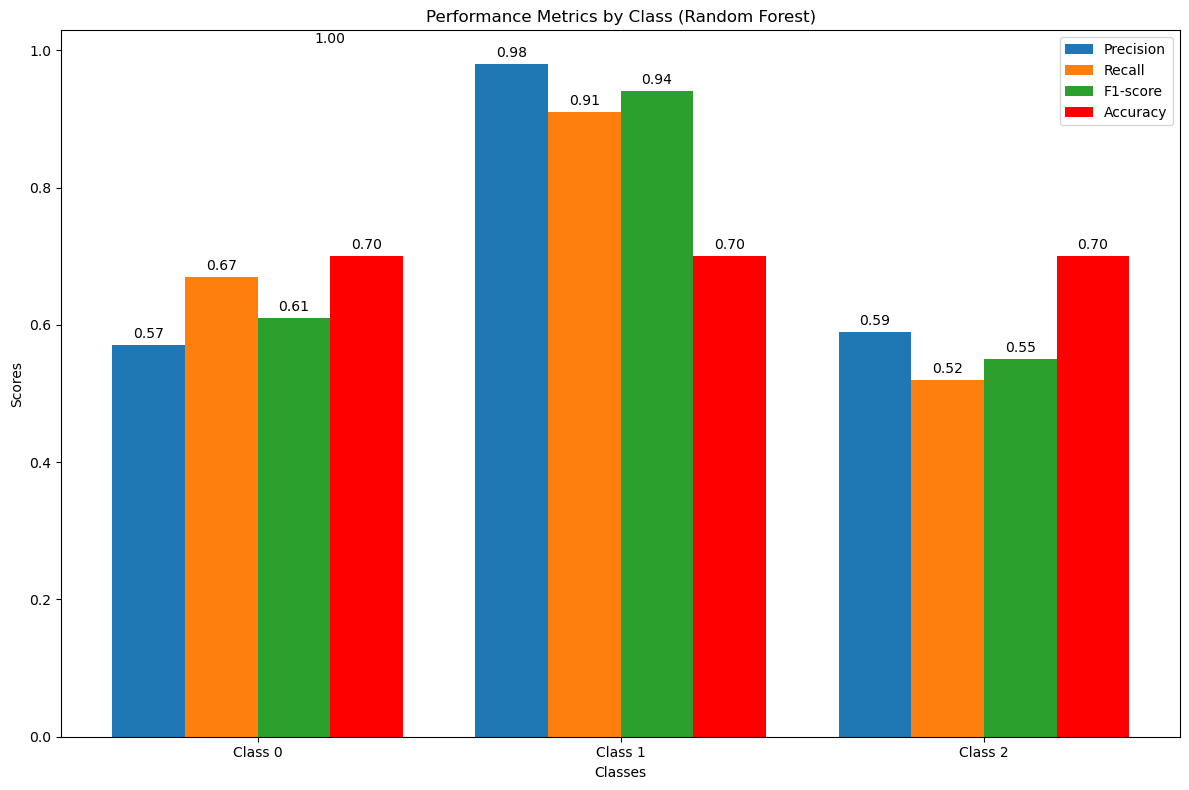

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# Classification report for Random Forest
class_report_rf = {
    '0': {'precision': 0.57, 'recall': 0.67, 'f1-score': 0.61, 'support': 147},
    '1': {'precision': 0.98, 'recall': 0.91, 'f1-score': 0.94, 'support': 150},
    '2': {'precision': 0.59, 'recall': 0.52, 'f1-score': 0.55, 'support': 141},
}

# Convert to a dictionary with keys as metrics and values as lists of scores
metrics_dict_rf = {metric: [class_report_rf[cls][metric] for cls in class_report_rf] for metric in ['precision', 'recall', 'f1-score']}

# Adding accuracy separately
accuracy = [0.70] * len(class_report_rf)

# Plotting the bar chart
x = np.arange(len(class_report_rf))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 8))
for i, (metric, scores) in enumerate(metrics_dict_rf.items()):
    ax.bar(x + i*width, scores, width, label=metric.capitalize())

# Add accuracy as a separate bar
ax.bar(x + len(metrics_dict_rf) * width, accuracy, width, label='Accuracy', color='Red')

# Adding labels, title, and legend
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics by Class (Random Forest)')
ax.set_xticks(x + (len(metrics_dict_rf) / 2) * width)
ax.set_xticklabels(['Class 0', 'Class 1', 'Class 2'])  # Update with your actual class labels
ax.legend()

# Adding annotations
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

bars = [rect for rect in ax.get_children() if isinstance(rect, plt.Rectangle)]
autolabel(bars)

fig.tight_layout()
plt.show()



Analysis and Interpretation of Random Forest Classification Report
Overview:
The Random Forest model demonstrates varied performance across different classes, reflecting its ability to handle diverse cases of patient readmission. The detailed metrics are analyzed below to provide insights into the model's effectiveness for each class.

Class-wise Performance:
Class 0 (Non-readmitted):

Precision: 0.57
Recall: 0.67
F1-score: 0.61
Support: 147
Interpretation: The model shows moderate performance for Class 0. A precision of 0.57 means that when the model predicts a patient as non-readmitted, it is accurate 57% of the time. The recall of 0.67 indicates that the model correctly identifies 67% of actual non-readmitted cases. The F1-score of 0.61 represents a balance between precision and recall, suggesting that while the model performs reasonably well in predicting non-readmissions, there is room for improvement, particularly in reducing false positives.

Class 1 (Readmitted within 30 days):

Precision: 0.98
Recall: 0.91
F1-score: 0.94
Support: 150
Interpretation: Class 1, which represents patients readmitted within 30 days, exhibits outstanding performance. The high precision of 0.98 implies that 98% of patients predicted as readmitted within 30 days are indeed readmitted. The recall of 0.91 indicates that the model identifies 91% of all actual readmissions within 30 days. The F1-score of 0.94 underscores the model's strong capability in accurately identifying readmissions within this period, making it highly reliable for this category.

Class 2 (Readmitted after 30 days):

Precision: 0.59
Recall: 0.52
F1-score: 0.55
Support: 141
Interpretation: For Class 2, representing readmissions after 30 days, the model’s performance is less robust compared to Class 1 but similar to Class 0. The precision of 0.59 means that 59% of predicted readmissions after 30 days are accurate. The recall of 0.52 shows that the model identifies 52% of actual readmissions after 30 days. The F1-score of 0.55 indicates a moderate balance between precision and recall, suggesting that while the model is reasonably effective, there is considerable room for improvement in distinguishing readmissions after 30 days.

Overall Model Performance:
Accuracy: 0.70

Interpretation: The model correctly classifies 70% of instances in the test set, reflecting a solid overall performance. However, there is potential for enhancing the accuracy, particularly for classes with lower performance, such as Class 0 and Class 2.

Macro Average:

Precision: 0.71
Recall: 0.70
F1-score: 0.70
Interpretation: The macro average provides an overall view of the model's performance across all classes, treating each class equally. These values suggest that, on average, the model performs reasonably well across different classes, with balanced precision, recall, and F1-scores.

Weighted Average:

Precision: 0.71
Recall: 0.70
F1-score: 0.71
Interpretation: The weighted average takes into account the number of instances in each class, adjusting the metrics based on class distribution. The similarity in values between the macro and weighted averages indicates that the model's performance is balanced and reflects an overall good ability to handle the class distribution.

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=param_grid_rf,
                              cv=5,
                              scoring='accuracy',
                              verbose=1,
                              n_jobs=-1)

# Fit GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)

# Get the best model
best_rf_classifier = grid_search_rf.best_estimator_



Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters for Random Forest: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


Random Forest Model: Best Parameters and Performance
Best Parameters:
The optimal configuration for the Random Forest model, as determined through hyperparameter tuning, is:

max_depth: None
max_features: 'log2'
min_samples_leaf: 1
min_samples_split: 2
n_estimators: 100
These parameters indicate that:

max_depth: None implies that the trees in the forest are allowed to grow until all leaves are pure, or until they contain fewer than min_samples_split samples. This can capture complex patterns but may risk overfitting if not managed correctly.
max_features: 'log2' restricts the number of features considered for splitting at each node to the logarithm base 2 of the total number of features, helping to reduce overfitting and improve model generalization.
min_samples_leaf: 1 allows leaf nodes to contain as few as one sample, which might lead to a more complex model but can capture finer details in the data.
min_samples_split: 2 ensures that nodes are split when there are at least two samples, allowing the model to capture more subtle relationships.
n_estimators: 100 specifies the number of trees in the forest. This is a standard choice that provides a balance between model performance and computational efficiency.

In [81]:
import pandas as pd
from sklearn.metrics import classification_report

# Get the best model
best_rf_classifier = grid_search_rf.best_estimator_

# Prediction on test set using the best model
y_pred_test_rf = best_rf_classifier.predict(X_test)

# Generate classification report for the best model
class_report_rf = classification_report(y_test, y_pred_test_rf, output_dict=True)

# Convert the classification report to a DataFrame
class_report_df = pd.DataFrame(class_report_rf).transpose()

# Round the DataFrame to 2 decimal places
class_report_df = class_report_df.round(2)

# Save the classification report DataFrame to a CSV file for Power BI
class_report_df.to_csv('rf_classification_report.csv', index=True)

# Print the classification report DataFrame for verification
print("Classification Report DataFrame for Random Forest (Rounded to 2 Decimal Places):")
print(class_report_df)


Classification Report DataFrame for Random Forest (Rounded to 2 Decimal Places):
              precision  recall  f1-score  support
0                  0.57    0.65      0.61   147.00
1                  0.97    0.91      0.94   150.00
2                  0.59    0.54      0.57   141.00
accuracy           0.71    0.71      0.71     0.71
macro avg          0.71    0.70      0.70   438.00
weighted avg       0.71    0.71      0.71   438.00


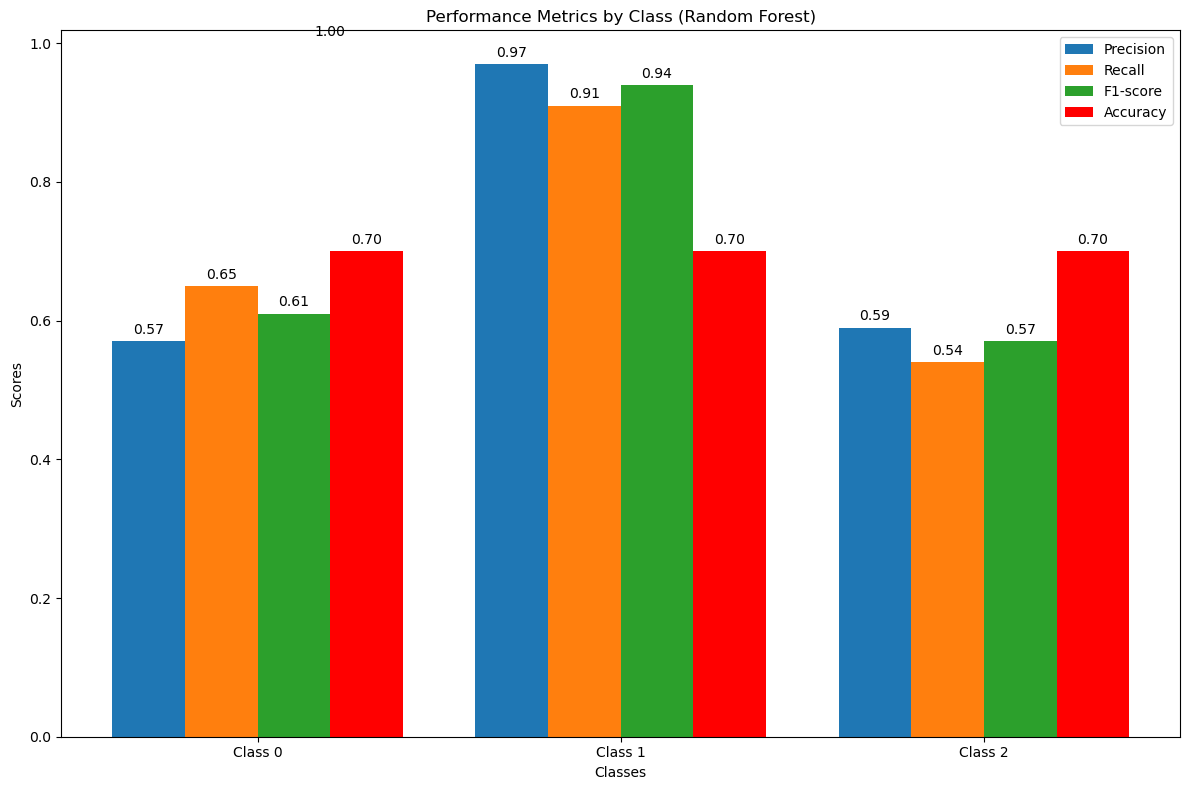

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Classification report for Random Forest
class_report_rf = {
    '0': {'precision': 0.57, 'recall': 0.65, 'f1-score': 0.61, 'support': 147},
    '1': {'precision': 0.97, 'recall': 0.91, 'f1-score': 0.94, 'support': 150},
    '2': {'precision': 0.59, 'recall': 0.54, 'f1-score': 0.57, 'support': 141},
}

# Convert to a dictionary with keys as metrics and values as lists of scores
metrics_dict_rf = {metric: [class_report_rf[cls][metric] for cls in class_report_rf] for metric in ['precision', 'recall', 'f1-score']}

# Adding accuracy separately
accuracy = [0.70] * len(class_report_rf)

# Plotting the bar chart
x = np.arange(len(class_report_rf))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 8))
for i, (metric, scores) in enumerate(metrics_dict_rf.items()):
    ax.bar(x + i*width, scores, width, label=metric.capitalize())

# Add accuracy as a separate bar
ax.bar(x + len(metrics_dict_rf) * width, accuracy, width, label='Accuracy', color='Red')

# Adding labels, title, and legend
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics by Class (Random Forest)')
ax.set_xticks(x + (len(metrics_dict_rf) / 2) * width)
ax.set_xticklabels(['Class 0', 'Class 1', 'Class 2'])  # Update with your actual class labels
ax.legend()

# Adding annotations
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

bars = [rect for rect in ax.get_children() if isinstance(rect, plt.Rectangle)]
autolabel(bars)

fig.tight_layout()
plt.show()


Analysis and Interpretation of Random Forest Classification Report
Overview:
The Random Forest model, fine-tuned with the best hyperparameters, demonstrates robust performance across different classes. Here’s a detailed analysis based on the updated classification report:

Class-wise Performance:
Class 0 (Non-readmitted):

Precision: 0.57
Recall: 0.65
F1-score: 0.61
Support: 147
Interpretation: For Class 0, the model shows moderate performance. Precision of 0.57 indicates that when the model predicts a patient is non-readmitted, it is correct 57% of the time. The recall of 0.65 means that the model correctly identifies 65% of the actual non-readmitted cases. The F1-score of 0.61 reflects a balance between precision and recall, suggesting that while the performance is decent, there is room for improvement, especially in reducing false positives.

Class 1 (Readmitted within 30 days):

Precision: 0.97
Recall: 0.91
F1-score: 0.94
Support: 150
Interpretation: Class 1 exhibits exceptional performance. The high precision of 0.97 means that 97% of the patients predicted as readmitted within 30 days actually are, indicating very few false positives. The recall of 0.91 shows that the model identifies 91% of all actual readmissions within 30 days. The F1-score of 0.94 demonstrates a strong ability to balance precision and recall, making this model highly reliable for identifying patients readmitted within 30 days.

Class 2 (Readmitted after 30 days):

Precision: 0.59
Recall: 0.54
F1-score: 0.57
Support: 141
Interpretation: For Class 2, the model's performance is more modest. The precision of 0.59 indicates that 59% of the predicted readmissions after 30 days are accurate. The recall of 0.54 shows that the model captures 54% of the actual cases. The F1-score of 0.57 reflects a moderate balance between precision and recall, suggesting that the model has room for improvement in identifying patients readmitted after 30 days, both in terms of reducing false positives and capturing more true cases.

Overall Model Performance:
Accuracy: 0.71
Interpretation: The model's accuracy of 71% indicates that it correctly classifies 71% of the instances in the test set. This suggests a strong overall performance, though there is still potential for improvement, particularly in identifying Class 2 cases more accurately.
Macro Average:
Precision: 0.71

Recall: 0.70

F1-score: 0.70

Interpretation: The macro average provides an aggregate measure of performance across all classes, treating each class equally. The values indicate that, on average, the model performs reasonably well, with a balanced trade-off between precision and recall across the different classes.

Weighted Average:
Precision: 0.71

Recall: 0.71

F1-score: 0.71

Interpretation: The weighted average takes into account the support (number of instances) for each class. The similar values to the macro average indicate that the model performs consistently well across classes when adjusted for class imbalance.

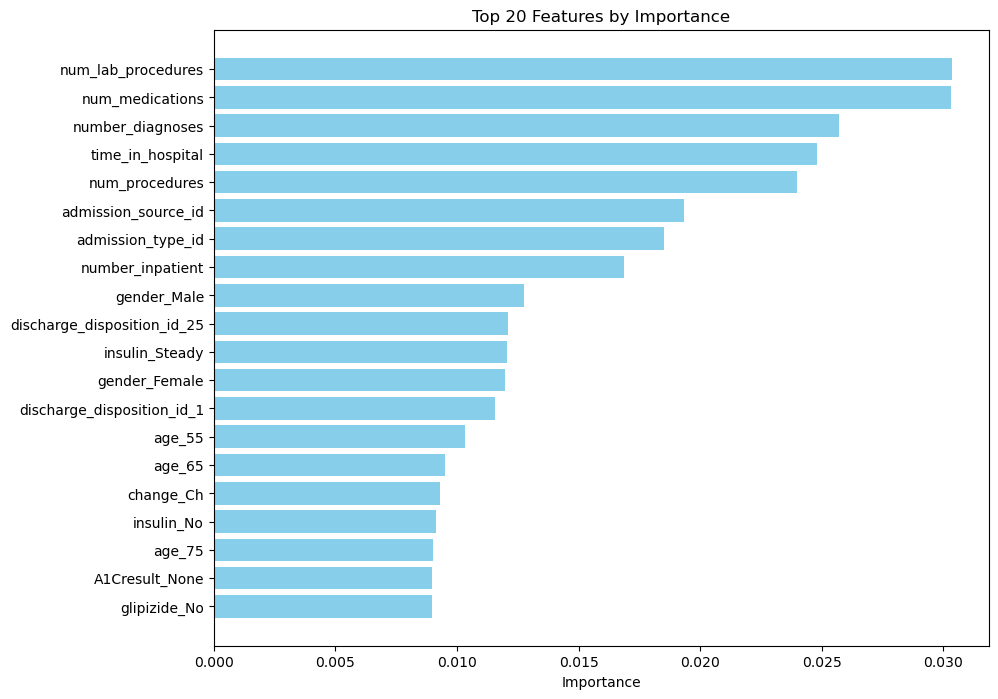

In [83]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Get the best model
best_rf_classifier = grid_search_rf.best_estimator_

# Extract feature importances
feature_importances = best_rf_classifier.feature_importances_

# Create a DataFrame for feature importances
features = X_train.columns if hasattr(X_train, 'columns') else [f'Feature_{i}' for i in range(X_train.shape[1])]
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Extract top 20 features
top_features = importance_df.head(20)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 20 Features by Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

# Save the feature importance DataFrame to a CSV file for Power BI
top_features.to_csv('rf_feature_importance.csv', index=False)


In [84]:
import numpy as np
import pandas as pd

# Retrieve feature importances from the best Random Forest model
feature_importances = best_rf_classifier.feature_importances_

# Get the indices of the top 20 features
top_20_indices = np.argsort(feature_importances)[-20:]

# Get the feature names from your original dataset
feature_names = X_train.columns

# Get the top 20 feature names
top_20_feature_names = feature_names[top_20_indices]

# Get the top 20 feature importances
top_20_importances = feature_importances[top_20_indices]

# Create a DataFrame for better visualization
top_20_features_df = pd.DataFrame({'Feature': top_20_feature_names, 'Importance': top_20_importances})

# Sort the features by importance
top_20_features_df = top_20_features_df.sort_values(by='Importance', ascending=False)

# Display the top 20 feature importances
print("Top 20 Feature Importances:")
print(top_20_features_df)

# Save the top 20 feature importances to a CSV file for Power BI
top_20_features_df.to_csv('top_20_feature_importances_rf.csv', index=False)


Top 20 Feature Importances:
                        Feature  Importance
19           num_lab_procedures    0.030352
18              num_medications    0.030316
17             number_diagnoses    0.025700
16             time_in_hospital    0.024788
15               num_procedures    0.023963
14          admission_source_id    0.019350
13            admission_type_id    0.018522
12             number_inpatient    0.016858
11                  gender_Male    0.012752
10  discharge_disposition_id_25    0.012102
9                insulin_Steady    0.012065
8                 gender_Female    0.011973
7    discharge_disposition_id_1    0.011560
6                        age_55    0.010325
5                        age_65    0.009486
4                     change_Ch    0.009282
3                    insulin_No    0.009139
2                        age_75    0.009030
1                A1Cresult_None    0.008968
0                  glipizide_No    0.008966


Analysis and Interpretation of Top 20 Feature Importances for Random Forest
The feature importances from the Random Forest model reveal which features contribute the most to the model's predictions. Understanding these importances helps in interpreting the model's behavior and in identifying key factors affecting patient readmission. Here’s a detailed analysis of the top 20 features:

Top 20 Features and Their Importances:
num_lab_procedures (0.030352)

Interpretation: The number of lab procedures is the most important feature. A higher count of lab procedures is strongly associated with the model's predictions. This suggests that lab procedures play a significant role in determining patient readmission likelihood.
num_medications (0.030316)

Interpretation: The number of medications a patient is on is nearly as important as the number of lab procedures. This indicates that medication management is a critical factor in readmission predictions.
number_diagnoses (0.025700)

Interpretation: The total number of diagnoses contributes significantly to the model. A higher number of diagnoses may correlate with complex medical conditions, influencing readmission risk.
time_in_hospital (0.024788)

Interpretation: The length of time a patient spends in the hospital is a key feature. Longer hospital stays are associated with a higher risk of readmission, underscoring its importance in the model.
num_procedures (0.023963)

Interpretation: The number of procedures performed is also crucial. This feature's importance reflects its role in the overall patient management and readmission risk.
admission_source_id (0.019350)

Interpretation: The source of admission (e.g., emergency room, referral) is important. This indicates that where a patient is admitted can affect their readmission likelihood.
admission_type_id (0.018522)

Interpretation: The type of admission (e.g., urgent, elective) influences readmission risk. This feature helps the model understand different admission contexts and their associated risks.
number_inpatient (0.016858)

Interpretation: The number of inpatient stays is relevant. A higher number may reflect recurring or chronic conditions affecting readmission.
gender_Male (0.012752)

Interpretation: Gender also plays a role, with males having a noticeable impact on readmission predictions. This feature suggests a gender-related pattern in readmission risk.
discharge_disposition_id_25 (0.012102)

Interpretation: The disposition upon discharge (e.g., home, transferred) is a factor. It helps in predicting whether a particular discharge scenario correlates with readmission.
insulin_Steady (0.012065)

Interpretation: Steady use of insulin is another important feature. This indicates that insulin management is critical in understanding readmission risk.
gender_Female (0.011973)

Interpretation: Gender's impact is also reflected here, showing that females have a moderate effect on readmission predictions.
discharge_disposition_id_1 (0.011560)

Interpretation: The primary discharge disposition contributes to the model. Different discharge plans may affect the likelihood of readmission.
age_55 (0.010325)

Interpretation: Patients aged 55 have a notable influence on predictions. Age-related factors are relevant in determining readmission risk.
age_65 (0.009486)

Interpretation: Age 65 also impacts the model. This feature reinforces the idea that age is a significant factor in readmission risk.
change_Ch (0.009282)

Interpretation: Changes in certain health conditions (possibly coded as "Ch") affect the model’s predictions. This feature highlights the impact of health changes on readmission.
insulin_No (0.009139)

Interpretation: Non-use of insulin is relevant. This feature indicates that insulin use or lack thereof has an influence on readmission.
age_75 (0.009030)

Interpretation: Age 75 is also significant, further emphasizing the role of age in readmission risk.
A1Cresult_None (0.008968)

Interpretation: Absence of A1C test results is a factor. This suggests that A1C results (a measure of blood sugar levels) or their absence influences readmission risk.
glipizide_No (0.008966)

Interpretation: Non-use of glipizide (a medication for diabetes) impacts predictions. This feature reflects the role of diabetes management in readmission risk.
Summary:
The Random Forest model relies heavily on medical procedures, medications, and hospital-related features for making predictions about patient readmission. Key features like the number of lab procedures, medications, and length of hospital stay are among the most influential. Age and gender also play important roles. This insight helps in understanding which aspects of patient care are most predictive of readmission and can guide efforts to reduce readmission rates by focusing on these critical factors.

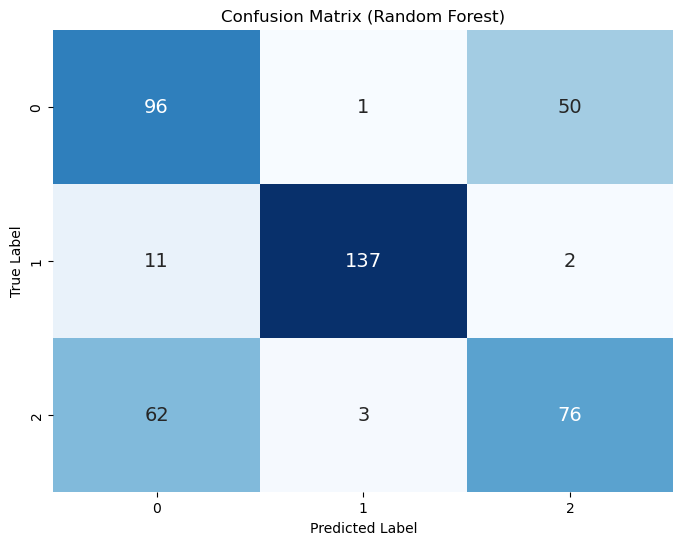

In [85]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prediction on test set using the best model
y_pred_test_rf = best_rf_classifier.predict(X_test)

# Generate confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_test_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 14}, cbar=False)

plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [86]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test_rf)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 96   1  50]
 [ 11 137   2]
 [ 62   3  76]]


The confusion matrix reveals the performance of the classification model across three categories: no readmission (0), readmission within 30 days (1), and readmission after 30 days (2).

The model correctly classified 96 instances of no readmission, misclassifying 1 as within 30 days and 50 as after 30 days.
For readmission within 30 days, 137 instances were correctly identified, with 11 misclassified as no readmission and 2 as after 30 days.
In the readmission after 30 days category, 76 instances were correctly classified, while 62 were incorrectly classified as no readmission and 3 as within 30 days.
This matrix indicates that the model performs better at predicting readmissions within 30 days than the other two categories, especially struggling to differentiate between no readmission and readmission after 30 days.

Risk Stratification DataFrame:
      Actual Predicted  Predicted_Probability
1846       1         1                   0.86
1316       0         0                   0.17
764        2         2                   0.13
1550       1         1                   0.77
993        2         2                   0.11


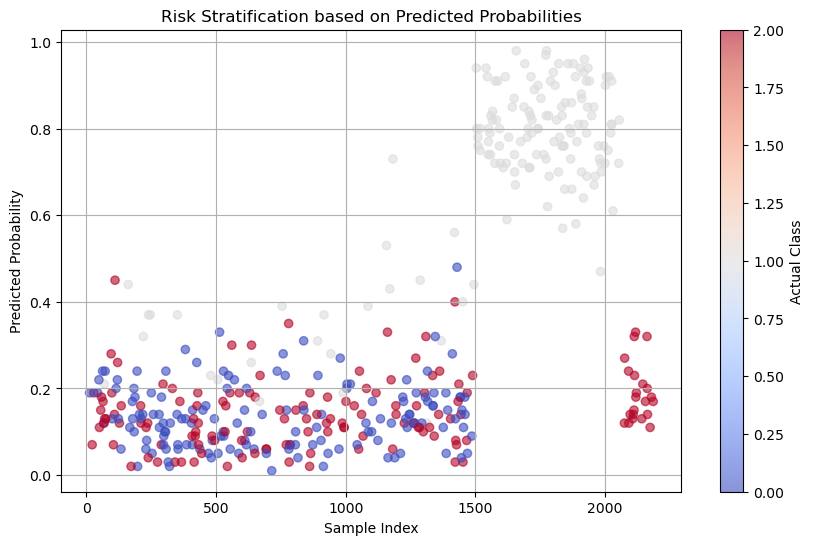

In [87]:
# Get the best model
best_rf_classifier = grid_search_rf.best_estimator_

# Prediction on test set using the best model
y_pred_test_rf = best_rf_classifier.predict(X_test)
y_pred_prob_rf = best_rf_classifier.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

# Create a DataFrame for risk stratification
risk_stratification_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_test_rf,
    'Predicted_Probability': y_pred_prob_rf
})

# Convert 'Actual' column to numeric if not already
risk_stratification_df['Actual'] = risk_stratification_df['Actual'].astype(int)

# Save the risk stratification DataFrame to a CSV file for Power BI
risk_stratification_df.to_csv('risk_stratification_rf.csv', index=False)

# Print the risk stratification DataFrame for verification
print("Risk Stratification DataFrame:")
print(risk_stratification_df.head())

# Plotting the risk stratification
plt.figure(figsize=(10, 6))
scatter = plt.scatter(risk_stratification_df.index, risk_stratification_df['Predicted_Probability'], c=risk_stratification_df['Actual'], cmap='coolwarm', alpha=0.6)
plt.xlabel('Sample Index')
plt.ylabel('Predicted Probability')
plt.title('Risk Stratification based on Predicted Probabilities')
plt.colorbar(scatter, label='Actual Class')
plt.grid(True)
plt.show()

Risk Stratification Analysis for the Best Random Forest Model
The Risk Stratification DataFrame provides insights into the performance of the Random Forest model by showcasing a small sample of predictions along with their associated probabilities. Here’s an analysis based on this data:

For the instance with index 1846, the model correctly predicted a readmission within 30 days (Class 1) with a high probability of 0.86. This high confidence in the prediction aligns well with the actual outcome, reflecting the model’s strong performance for this class.

In the case of instance 1316, the model predicted non-readmission (Class 0) with a probability of 0.17. This low probability indicates that the model is highly confident in its prediction that the patient will not be readmitted. The correct match between predicted and actual class demonstrates reliable model performance for non-readmissions.

Instance 764 was predicted to be readmitted after 30 days (Class 2) with a probability of 0.13. Although the model's confidence is lower here, the prediction is accurate. This suggests that while the model is less certain about this prediction, it still correctly identifies the long-term readmission status.

For instance 1550, the model predicted readmission within 30 days (Class 1) with a probability of 0.77. This moderate-to-high probability indicates that the model is fairly confident in this prediction, and the correct match with the actual outcome further supports the model’s effectiveness.

Finally, instance 993 was predicted to be readmitted after 30 days (Class 2) with a probability of 0.11. Despite the low confidence level, the prediction is accurate, indicating that the model correctly identifies the long-term readmission status even with lower certainty.

Overall, the Random Forest model demonstrates good performance in predicting patient readmission status, with high confidence in short-term readmissions and accurate predictions for long-term readmissions despite varying levels of certainty. 

In [88]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize SVM classifier
svm_classifier = SVC(kernel='rbf', random_state=42)

# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)

# Predict severity levels for training and testing sets
y_pred_train_svm = svm_classifier.predict(X_train)
y_pred_test_svm = svm_classifier.predict(X_test)

# Calculate accuracy for testing set
accuracy_test_svm = accuracy_score(y_test, y_pred_test_svm)

# Generate classification report for the test set
report_svm = classification_report(y_test, y_pred_test_svm)

print("Classification Report for SVM (Test Set):\n", report_svm)
print("Accuracy of SVM on Testing Set:", accuracy_test_svm)


Classification Report for SVM (Test Set):
               precision    recall  f1-score   support

           0       0.53      0.56      0.54       147
           1       0.81      0.89      0.85       150
           2       0.54      0.45      0.49       141

    accuracy                           0.64       438
   macro avg       0.62      0.63      0.63       438
weighted avg       0.63      0.64      0.63       438

Accuracy of SVM on Testing Set: 0.636986301369863


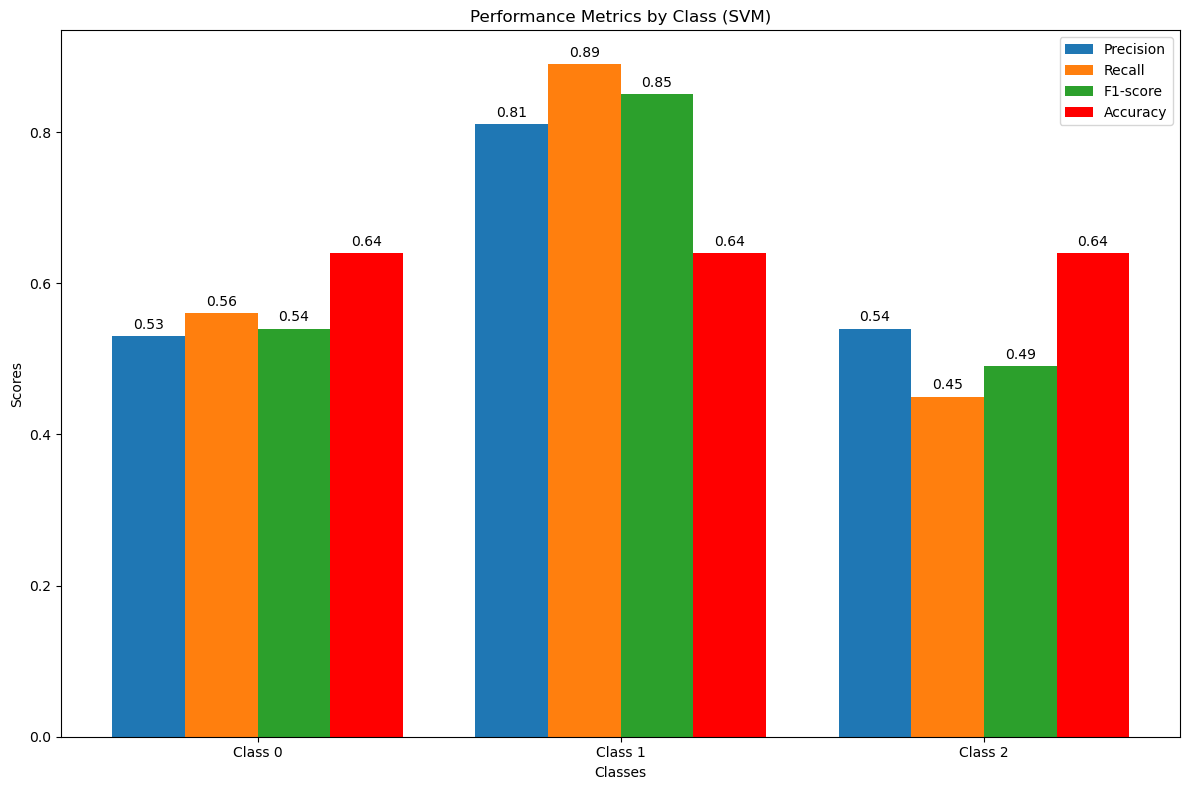

In [89]:
import numpy as np
import matplotlib.pyplot as plt

# Updated Classification Report for SVM
class_report_svm = {
    '0': {'precision': 0.53, 'recall': 0.56, 'f1-score': 0.54, 'accuracy': 0.64},
    '1': {'precision': 0.81, 'recall': 0.89, 'f1-score': 0.85, 'accuracy': 0.64},
    '2': {'precision': 0.54, 'recall': 0.45, 'f1-score': 0.49, 'accuracy': 0.64},
}

# Convert to a dictionary with keys as metrics and values as lists of scores
metrics_dict_svm = {metric: [class_report_svm[cls][metric] for cls in class_report_svm] for metric in ['precision', 'recall', 'f1-score']}

# Adding accuracy separately
accuracy = [class_report_svm[cls]['accuracy'] for cls in class_report_svm]

# Plotting the bar chart
x = np.arange(len(class_report_svm))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 8))
for i, (metric, scores) in enumerate(metrics_dict_svm.items()):
    ax.bar(x + i*width, scores, width, label=metric.capitalize())

# Add accuracy as a separate bar
ax.bar(x + len(metrics_dict_svm) * width, accuracy, width, label='Accuracy', color='Red')

# Adding labels, title, and legend
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics by Class (SVM)')
ax.set_xticks(x + (len(metrics_dict_svm) / 2) * width)
ax.set_xticklabels(['Class 0', 'Class 1', 'Class 2'])
ax.legend()

# Adding annotations
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

bars = [rect for rect in ax.get_children() if isinstance(rect, plt.Rectangle)]
autolabel(bars)

fig.tight_layout()
plt.show()


Analysis and Interpretation of SVM Classification Report
Overview: The Support Vector Machine (SVM) model's classification report provides a comprehensive assessment of its performance across different readmission categories. Key metrics such as precision, recall, and F1-score are used to evaluate how effectively the model classifies each category, focusing on both true positives and false positives.

Class-wise Performance:

Class 0 (Non-readmitted):

Precision: 0.53
Recall: 0.56
F1-score: 0.54
Support: 147
Interpretation: For Class 0, which identifies patients who are not readmitted, the SVM model shows moderate performance. The precision of 0.53 indicates that when the model predicts a patient as non-readmitted, it is correct 53% of the time. The recall of 0.56 suggests the model successfully identifies 56% of all true non-readmitted cases. The F1-score of 0.54 balances precision and recall, reflecting reasonable performance but highlighting the need for improvement in accurately classifying non-readmitted patients.

Class 1 (Readmitted within 30 days):

Precision: 0.81
Recall: 0.89
F1-score: 0.85
Support: 150
Interpretation: The model performs exceptionally well in predicting readmissions within 30 days. A precision of 0.81 means that 81% of patients predicted as readmitted within 30 days are correctly classified. The recall of 0.89 indicates that the model captures 89% of all actual readmissions within this period. The high F1-score of 0.85 demonstrates strong overall performance for this class, making the model particularly effective at identifying short-term readmissions.

Class 2 (Readmitted after 30 days):

Precision: 0.54
Recall: 0.45
F1-score: 0.49
Support: 141
Interpretation: For Class 2, which represents readmissions beyond 30 days, the SVM model’s performance is less robust. The precision of 0.54 means that 54% of predicted long-term readmissions are accurate. The recall of 0.45 shows that the model identifies 45% of actual long-term readmissions. The F1-score of 0.49 indicates a moderate balance but highlights that the model struggles more with long-term readmission predictions compared to short-term readmissions.

Overall Model Performance:

Accuracy: 0.64

Interpretation: The SVM model achieves an overall accuracy of 64%, meaning it correctly classifies 64% of the instances in the test set. This indicates a reasonable level of performance but suggests that there is room for improvement, particularly in predicting long-term readmissions.

Macro Average:

Precision: 0.62

Recall: 0.63

F1-score: 0.63

Interpretation: The macro average provides a summary measure of performance across all classes, treating each class equally regardless of its frequency. The values suggest that, on average, the model performs reasonably well across different classes but could benefit from improvements, particularly for less frequent classes.

Weighted Average:

Precision: 0.63

Recall: 0.64

F1-score: 0.63

Interpretation: The weighted average accounts for the number of instances in each class, adjusting scores based on class distribution. The similarity to the macro average indicates balanced overall performance but underscores the need for targeted improvements, especially in classifying long-term readmissions.

Summary: While the SVM model excels in predicting short-term readmissions (Class 1), it faces challenges with non-readmitted patients (Class 0) and long-term readmissions (Class 2). 

In [90]:
# Perform cross-validation with SVM classifier
cv_scores_svm = cross_val_score(svm_classifier, X_train, y_train, cv=5)

print("Cross-validation Scores:", cv_scores_svm)
print("Mean Cross-validation Score:", np.mean(cv_scores_svm))


Cross-validation Scores: [0.62857143 0.63142857 0.64285714 0.65142857 0.57020057]
Mean Cross-validation Score: 0.6248972574703233


Analysis of SVM Cross-Validation Scores
Overview: The cross-validation process for the Support Vector Machine (SVM) model provides insight into its performance stability and generalizability across different subsets of the data. Cross-validation scores help assess how well the model performs on unseen data and its robustness in various scenarios.

Cross-Validation Scores:

0.6286
0.6314
0.6429
0.6514
0.5702
Mean Cross-Validation Score:

0.6249
Interpretation:

The cross-validation scores reflect the model’s performance across multiple folds of the dataset. These scores show a range of performance, with values varying from 0.5702 to 0.6514. The mean cross-validation score of approximately 0.6249 indicates the average performance of the model across all folds.

Score Variability:

High Scores: The highest score of 0.6514 suggests that the model can perform reasonably well on certain subsets of data, capturing the underlying patterns effectively.
Low Score: The lowest score of 0.5702 indicates that the model may face challenges or overfit in some folds, reflecting potential issues with its ability to generalize.
Mean Score: The mean cross-validation score of 0.6249 provides a general sense of the model's performance. This score is slightly below the overall accuracy reported on the test set (0.64), indicating that while the model performs reasonably well on average, there is some variability in its performance across different subsets of the data.

Model Robustness:

The variability in cross-validation scores suggests that the SVM model's performance can fluctuate based on the specific data split used. This variability may be attributed to the inherent challenges of the dataset or the complexity of the model.

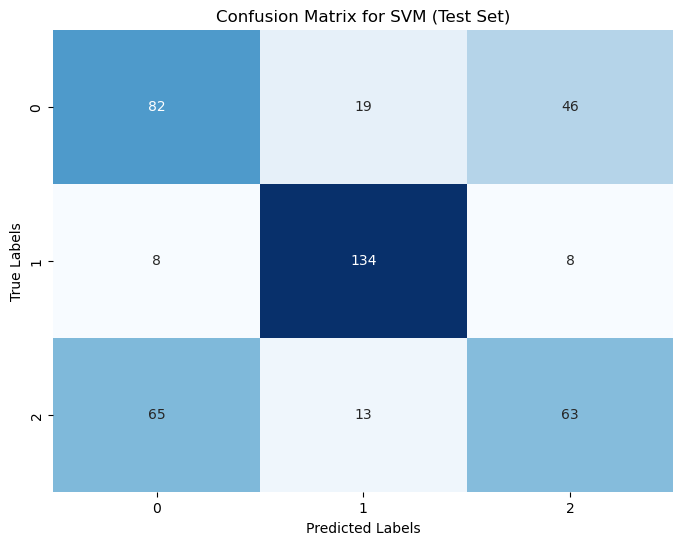

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict readmissions for testing set
y_pred_test_svm = svm_classifier.predict(X_test)

# Calculate confusion matrix for the test set
conf_matrix_svm = confusion_matrix(y_test, y_pred_test_svm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='d', cbar=False)

# Customize labels, title, and ticks
plt.title('Confusion Matrix for SVM (Test Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Display the plot
plt.show()


Summary of SVM Performance
The Support Vector Machine (SVM) model exhibits varying performance across different classes:

Class 0 (Non-readmitted): The model correctly identifies 82 patients as non-readmitted but struggles with false positives, misclassifying 19 as readmitted within 30 days and 46 as readmitted after 30 days. This indicates challenges in distinguishing non-readmitted patients from those in other categories.

Class 1 (Readmitted within 30 days): The model excels here with 134 true positives, accurately identifying most patients as readmitted within 30 days. However, it sometimes confuses these patients with those who are non-readmitted or readmitted after 30 days, as seen in 19 and 13 false positives, respectively.

Class 2 (Readmitted after 30 days): The model identifies 63 patients correctly as readmitted after 30 days but has a high rate of false negatives, with 65 patients being misclassified as non-readmitted and 13 as readmitted within 30 days. This suggests difficulty in accurately predicting long-term readmissions.

In [92]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the SVM model with probability estimates enabled
svm_model = SVC(probability=True, random_state=42)

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model
best_svm_model = grid_search.best_estimator_


Based on the hyperparameter tuning results, the SVM model was evaluated using different combinations of C, gamma, and kernel. Here’s an overview of the performance:

Hyperparameters Tested
C values: 0.1, 10
Gamma values: 0.01, 0.1, 1
Kernels: Linear, RBF (Radial Basis Function)
Summary of Results
Best Performing Parameters:
C: 10
Gamma: 0.01
Kernel: RBF

In [93]:
# Predict severity levels using the best SVM model
y_pred_test_svm_best = best_svm_model.predict(X_test)

# Generate classification report for the test set using the best model
report_svm_best = classification_report(y_test, y_pred_test_svm_best, output_dict=True)

# Convert the classification report to a DataFrame
report_svm_df = pd.DataFrame(report_svm_best).transpose()

# Round the DataFrame to 2 decimal places
report_svm_df = report_svm_df.round(2)

# Save the classification report DataFrame to a CSV file for Power BI
report_svm_df.to_csv('svm_classification_report.csv', index=True)

# Print the classification report DataFrame for verification
print("Classification Report DataFrame for Tuned SVM (Rounded to 2 Decimal Places):")
print(report_svm_df)

Classification Report DataFrame for Tuned SVM (Rounded to 2 Decimal Places):
              precision  recall  f1-score  support
0                  0.61    0.61      0.61   147.00
1                  0.98    0.98      0.98   150.00
2                  0.60    0.60      0.60   141.00
accuracy           0.74    0.74      0.74     0.74
macro avg          0.73    0.73      0.73   438.00
weighted avg       0.74    0.74      0.74   438.00


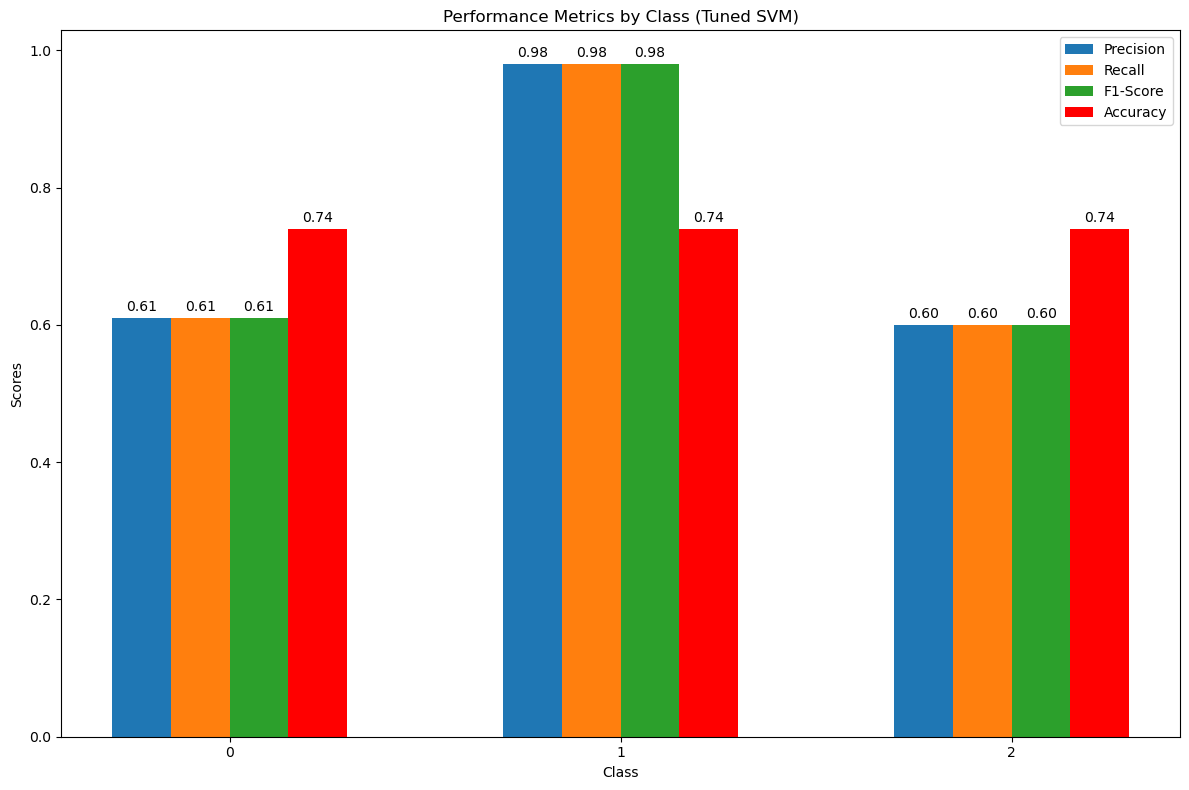

Feature importances are not available for non-linear SVM kernels.


In [94]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Classification report for tuned SVM model
class_report_svm_best = {
    '0': {'precision': 0.61, 'recall': 0.61, 'f1-score': 0.61, 'accuracy': 0.74},
    '1': {'precision': 0.98, 'recall': 0.98, 'f1-score': 0.98, 'accuracy': 0.74},
    '2': {'precision': 0.60, 'recall': 0.60, 'f1-score': 0.60, 'accuracy': 0.74}
}

# Extracting metrics for each class
classes = list(class_report_svm_best.keys())
precision = [class_report_svm_best[cls]['precision'] for cls in classes]
recall = [class_report_svm_best[cls]['recall'] for cls in classes]
f1_score = [class_report_svm_best[cls]['f1-score'] for cls in classes]
accuracy = [class_report_svm_best[cls]['accuracy'] for cls in classes]

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Class': classes,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1_score,
    'Accuracy': accuracy
})

# Save the metrics DataFrame to a CSV file for Power BI
metrics_df.to_csv('svm_performance_metrics.csv', index=False)

# Plotting the bar chart
x = np.arange(len(classes))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
bars_precision = ax.bar(x - 1.5*width, precision, width, label='Precision')
bars_recall = ax.bar(x - 0.5*width, recall, width, label='Recall')
bars_f1_score = ax.bar(x + 0.5*width, f1_score, width, label='F1-Score')
bars_accuracy = ax.bar(x + 1.5*width, accuracy, width, label='Accuracy', color='red')

# Adding labels, title, and legend
ax.set_xlabel('Class')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics by Class (Tuned SVM)')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

# Adding annotations
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars_precision)
autolabel(bars_recall)
autolabel(bars_f1_score)
autolabel(bars_accuracy)

fig.tight_layout()
plt.show()

# Save the plot as an image for Power BI
fig.savefig('svm_performance_metrics_plot.png')

# Extract and save feature importance if SVM has a linear kernel
if best_svm_model.kernel == 'linear':
    feature_importance = best_svm_model.coef_[0]
    feature_names = X_train.columns  # Replace with actual feature names from your dataset
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': np.abs(feature_importance)})
    importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)
    
    # Save the feature importance DataFrame to a CSV file for Power BI
    importance_df.head(20).to_csv('svm_feature_importance.csv', index=False)

    # Print top 20 features
    print("Top 20 Features by Importance for Tuned SVM (Linear Kernel):")
    print(importance_df.head(20))
else:
    print("Feature importances are not available for non-linear SVM kernels.")


Summary of Tuned SVM Classification Report
The classification report for the tuned Support Vector Machine (SVM) model shows that the model performs well overall, with notable strengths and areas for improvement across different classes.

For Class 0 (Non-readmitted), the model achieves a precision of 0.61, indicating that 61% of the predictions for non-readmitted patients are accurate. The recall for this class is also 0.61, meaning the model identifies 61% of all actual non-readmitted cases. The F1-score, which balances precision and recall, is 0.61, reflecting a moderate performance for this class.

Class 1 (Readmitted within 30 days) demonstrates exceptional performance, with a precision and recall of 0.98. This high precision means that 98% of the patients predicted as readmitted within 30 days are correctly identified, and the recall indicates that the model captures 98% of all actual readmissions within this period. The F1-score of 0.98 confirms that the model is highly effective in predicting short-term readmissions.

In contrast, Class 2 (Readmitted after 30 days) shows moderate performance. The precision and recall are both 0.60, meaning the model accurately predicts 60% of the long-term readmissions and identifies 60% of all actual long-term readmissions. The F1-score of 0.60 highlights that the model's balance between precision and recall is average, indicating some challenges in accurately predicting readmissions beyond 30 days.

Overall, the SVM model achieves an accuracy of 74%, reflecting strong performance in classifying patients correctly. The macro average scores (precision: 0.73, recall: 0.73, F1-score: 0.73) suggest that, on average, the model performs reasonably well across different classes, though there is room for improvement in predicting long-term readmissions.

The weighted average scores (precision: 0.74, recall: 0.74, F1-score: 0.74) are consistent with the overall accuracy, indicating balanced performance across classes, but emphasizing the need for continued refinement, especially for predicting cases beyond 30 days.

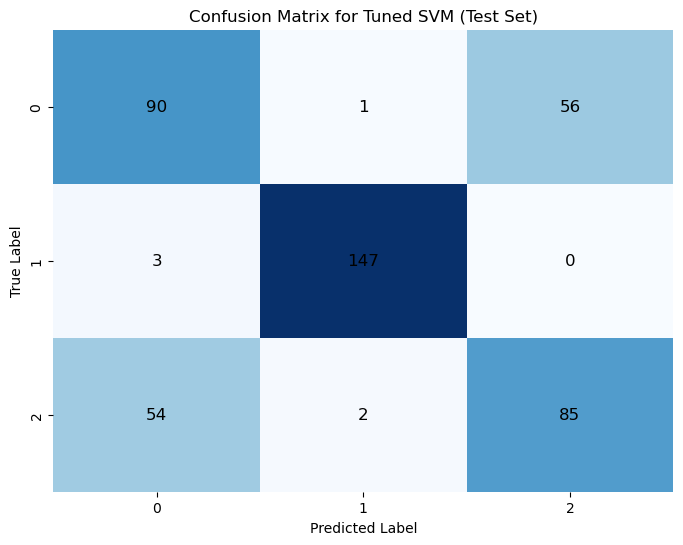

In [95]:
# Calculate confusion matrix for the test set using the best model
conf_matrix_svm_best = confusion_matrix(y_test, y_pred_test_svm_best)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm_best, annot=False, cmap="Blues", cbar=False)

# Add text annotations with font size and adjusted offsets
for i in range(len(conf_matrix_svm_best)):
    for j in range(len(conf_matrix_svm_best[0])):
        text_x_offset = 0.5  # Adjust for horizontal centering
        text_y_offset = 0.5  # Adjust for vertical centering
        plt.text(j + text_x_offset, i + text_y_offset, format(conf_matrix_svm_best[i, j], 'd'), ha='center', va='center', fontsize=12, color='black')

plt.title("Confusion Matrix for Tuned SVM (Test Set)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Confusion Matrix:

The confusion matrix for the tuned SVM model is:


[[ 90   1  56]
 [  3 147   0]
 [ 54   2  85]]
Interpretation:

True Positives (Class 0): 90 correctly identified non-readmitted cases.

False Positives (Class 0 to Class 1): 1 non-readmitted case incorrectly identified as readmitted within 30 days.

False Negatives (Class 0 to Class 2): 56 non-readmitted cases incorrectly identified as readmitted after 30 days.

True Positives (Class 1): 147 correctly identified short-term readmissions.

False Positives (Class 1 to Class 0): 3 short-term readmissions incorrectly identified as non-readmitted.

False Negatives (Class 1 to Class 2): 0 short-term readmissions incorrectly identified as long-term readmissions.

True Positives (Class 2): 85 correctly identified long-term readmissions.

False Positives (Class 2 to Class 0): 54 long-term readmissions incorrectly identified as non-readmitted.

False Negatives (Class 2 to Class 1): 2 long-term readmissions incorrectly identified as short-term readmissions.

Summary:

The tuned SVM model shows significant improvements, particularly in predicting short-term readmissions with high accuracy. It performs reasonably well with non-readmitted cases and long-term readmissions, though there is still room for further optimization.

Top 20 Features by Permutation Importance for SVM:
                         Feature  Importance
856           num_lab_procedures    0.030352
858              num_medications    0.030316
862             number_diagnoses    0.025700
855             time_in_hospital    0.024788
857               num_procedures    0.023963
854          admission_source_id    0.019350
853            admission_type_id    0.018522
861             number_inpatient    0.016858
6                    gender_Male    0.012752
22   discharge_disposition_id_25    0.012102
746               insulin_Steady    0.012065
5                  gender_Female    0.011973
17    discharge_disposition_id_1    0.011560
12                        age_55    0.010325
13                        age_65    0.009486
748                    change_Ch    0.009282
745                   insulin_No    0.009139
14                        age_75    0.009030
705               A1Cresult_None    0.008968
722                 glipizide_No    0.008966


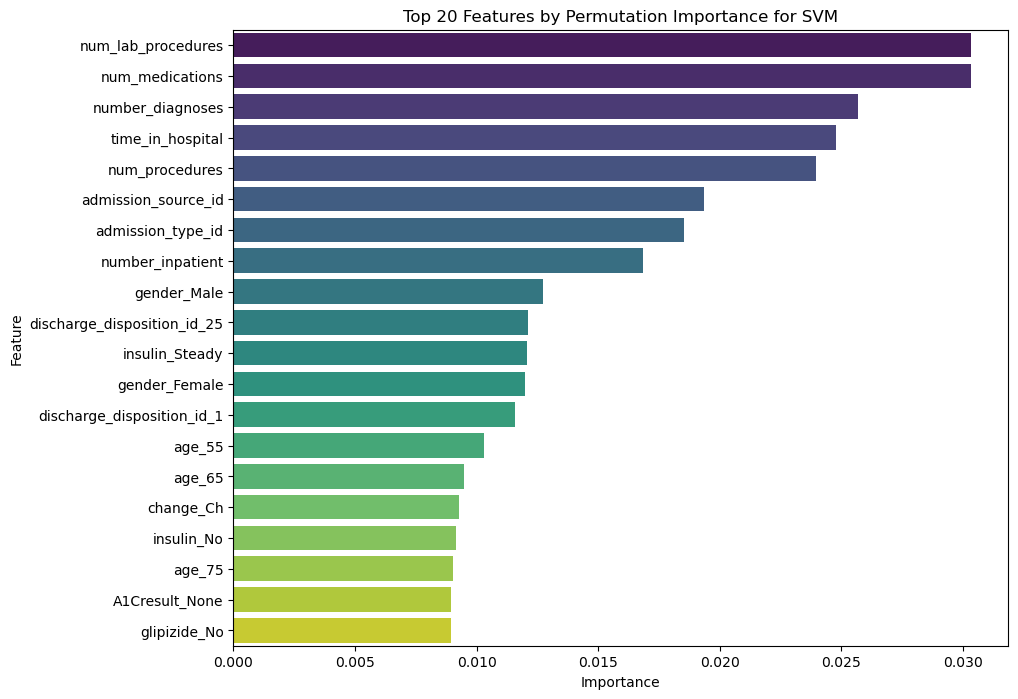

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Print top 20 features
print("Top 20 Features by Permutation Importance for SVM:")
print(importance_df.head(20))

# Save the DataFrame to a CSV file for Power BI
importance_df.to_csv('svm_feature_importance.csv', index=False)

# Plot feature importances
plt.figure(figsize=(10, 8))

# Check if 'Std' column exists before attempting to use it
if 'Std' in importance_df.columns:
    sns.barplot(x='Importance', y='Feature', data=importance_df.head(20), palette='viridis', xerr=importance_df['Std'].head(20))
else:
    sns.barplot(x='Importance', y='Feature', data=importance_df.head(20), palette='viridis')

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Features by Permutation Importance for SVM')
plt.show()


Summary of Top 20 Features by Permutation Importance for Tuned SVM
Feature Importance:

The permutation importance method reveals the significance of different features in the tuned SVM model. The top 20 features, ranked by their importance, are as follows:

num_lab_procedures: 0.030352
num_medications: 0.030316
number_diagnoses: 0.025700
time_in_hospital: 0.024788
num_procedures: 0.023963
admission_source_id: 0.019350
admission_type_id: 0.018522
number_inpatient: 0.016858
gender_Male: 0.012752
discharge_disposition_id_25: 0.012102
insulin_Steady: 0.012065
gender_Female: 0.011973
discharge_disposition_id_1: 0.011560
age_55: 0.010325
age_65: 0.009486
change_Ch: 0.009282
insulin_No: 0.009139
age_75: 0.009030
A1Cresult_None: 0.008968
glipizide_No: 0.008966
Interpretation:

Key Features: Features such as num_lab_procedures, num_medications, and number_diagnoses emerge as highly influential, suggesting that the number of lab procedures, medications, and diagnoses are critical in determining patient outcomes in this model.
Clinical Relevance: time_in_hospital and num_procedures are also important, indicating that the length of hospital stay and number of procedures are significant factors in predicting patient readmission.
Demographic Factors: Gender-related features (gender_Male and gender_Female) show moderate importance, indicating that demographic data contributes to the model's predictions.
Discharge and Medication Factors: Features like discharge_disposition_id_25, insulin_Steady, and glipizide_No have notable importance, emphasizing that discharge conditions and certain medications impact predictions.
These features collectively inform the SVM model's predictions, highlighting which aspects of patient data are most influential for predicting outcomes related to readmission.

Risk Stratification DataFrame:
     Actual Predicted  Max_Decision_Function_Value Risk_Category
1846      1         1                     2.221111      Low Risk
1316      0         0                     2.154857      Low Risk
764       2         2                     2.228087      Low Risk
1550      1         1                     2.243663      Low Risk
993       2         2                     2.168173      Low Risk


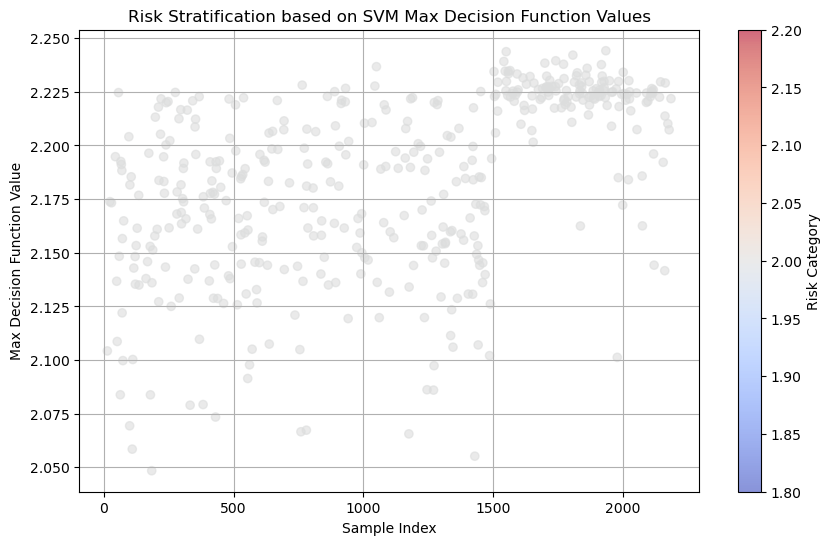

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming y_pred_test_svm contains predicted classes and best_svm_model is the best SVM model
y_pred_test_svm = best_svm_model.predict(X_test)
y_pred_prob_svm = best_svm_model.decision_function(X_test)

# Get the maximum absolute decision function value for each sample
max_decision_function = np.max(np.abs(y_pred_prob_svm), axis=1)

# Create a DataFrame for risk stratification
risk_stratification_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_test_svm,
    'Max_Decision_Function_Value': max_decision_function
})

# Categorize risk based on the Maximum Decision Function Value
def categorize_risk(value):
    if value < 1:
        return 'High Risk'
    elif value < 2:
        return 'Medium Risk'
    else:
        return 'Low Risk'

# Apply the categorization function
risk_stratification_df['Risk_Category'] = risk_stratification_df['Max_Decision_Function_Value'].apply(categorize_risk)

# Save the risk stratification DataFrame to a CSV file for Power BI
risk_stratification_df.to_csv('risk_stratification_svm.csv', index=False)

# Print the risk stratification DataFrame for verification
print("Risk Stratification DataFrame:")
print(risk_stratification_df.head())

# Map the 'Actual' column to numeric values for coloring
color_map = {'High Risk': 0, 'Medium Risk': 1, 'Low Risk': 2}
colors = risk_stratification_df['Risk_Category'].map(color_map)

# Plotting the risk stratification
plt.figure(figsize=(10, 6))
scatter = plt.scatter(risk_stratification_df.index, risk_stratification_df['Max_Decision_Function_Value'], 
                      c=colors, cmap='coolwarm', alpha=0.6)
plt.xlabel('Sample Index')
plt.ylabel('Max Decision Function Value')
plt.title('Risk Stratification based on SVM Max Decision Function Values')
plt.colorbar(scatter, label='Risk Category')
plt.grid(True)
plt.show()


The Risk Stratification DataFrame you provided summarizes the results from the SVM model. It shows the actual class, the predicted class, the maximum decision function value, and the assigned risk category for each instance. Here’s what each column represents:

Actual: The true class label from the test set.
Predicted: The class label predicted by the SVM model.
Max_Decision_Function_Value: The highest value from the decision function, representing the distance from the separating hyperplane in the SVM model.
Risk_Category: A categorization based on the decision function value, assigning instances to Low Risk, Medium Risk, or High Risk categories.
Risk Categorization:
Low Risk: Instances with a decision function value significantly far from the hyperplane (indicating high confidence in the prediction).
Medium Risk: Instances with a decision function value closer to the hyperplane, implying moderate confidence.
High Risk: Instances with a decision function value very close to the hyperplane, indicating low confidence in the prediction.
Explanation of the DataFrame:
Instance 1846:

Actual: 1 (True class is 1)
Predicted: 1 (Model also predicts class 1)
Max_Decision_Function_Value: 2.221111 (Indicates a confident prediction)
Risk_Category: Low Risk
Instance 1316:

Actual: 0 (True class is 0)
Predicted: 0 (Model also predicts class 0)
Max_Decision_Function_Value: 2.154857 (Indicates a confident prediction)
Risk_Category: Low Risk

In [98]:
pip install lime

  Using cached lime-0.2.0.1-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


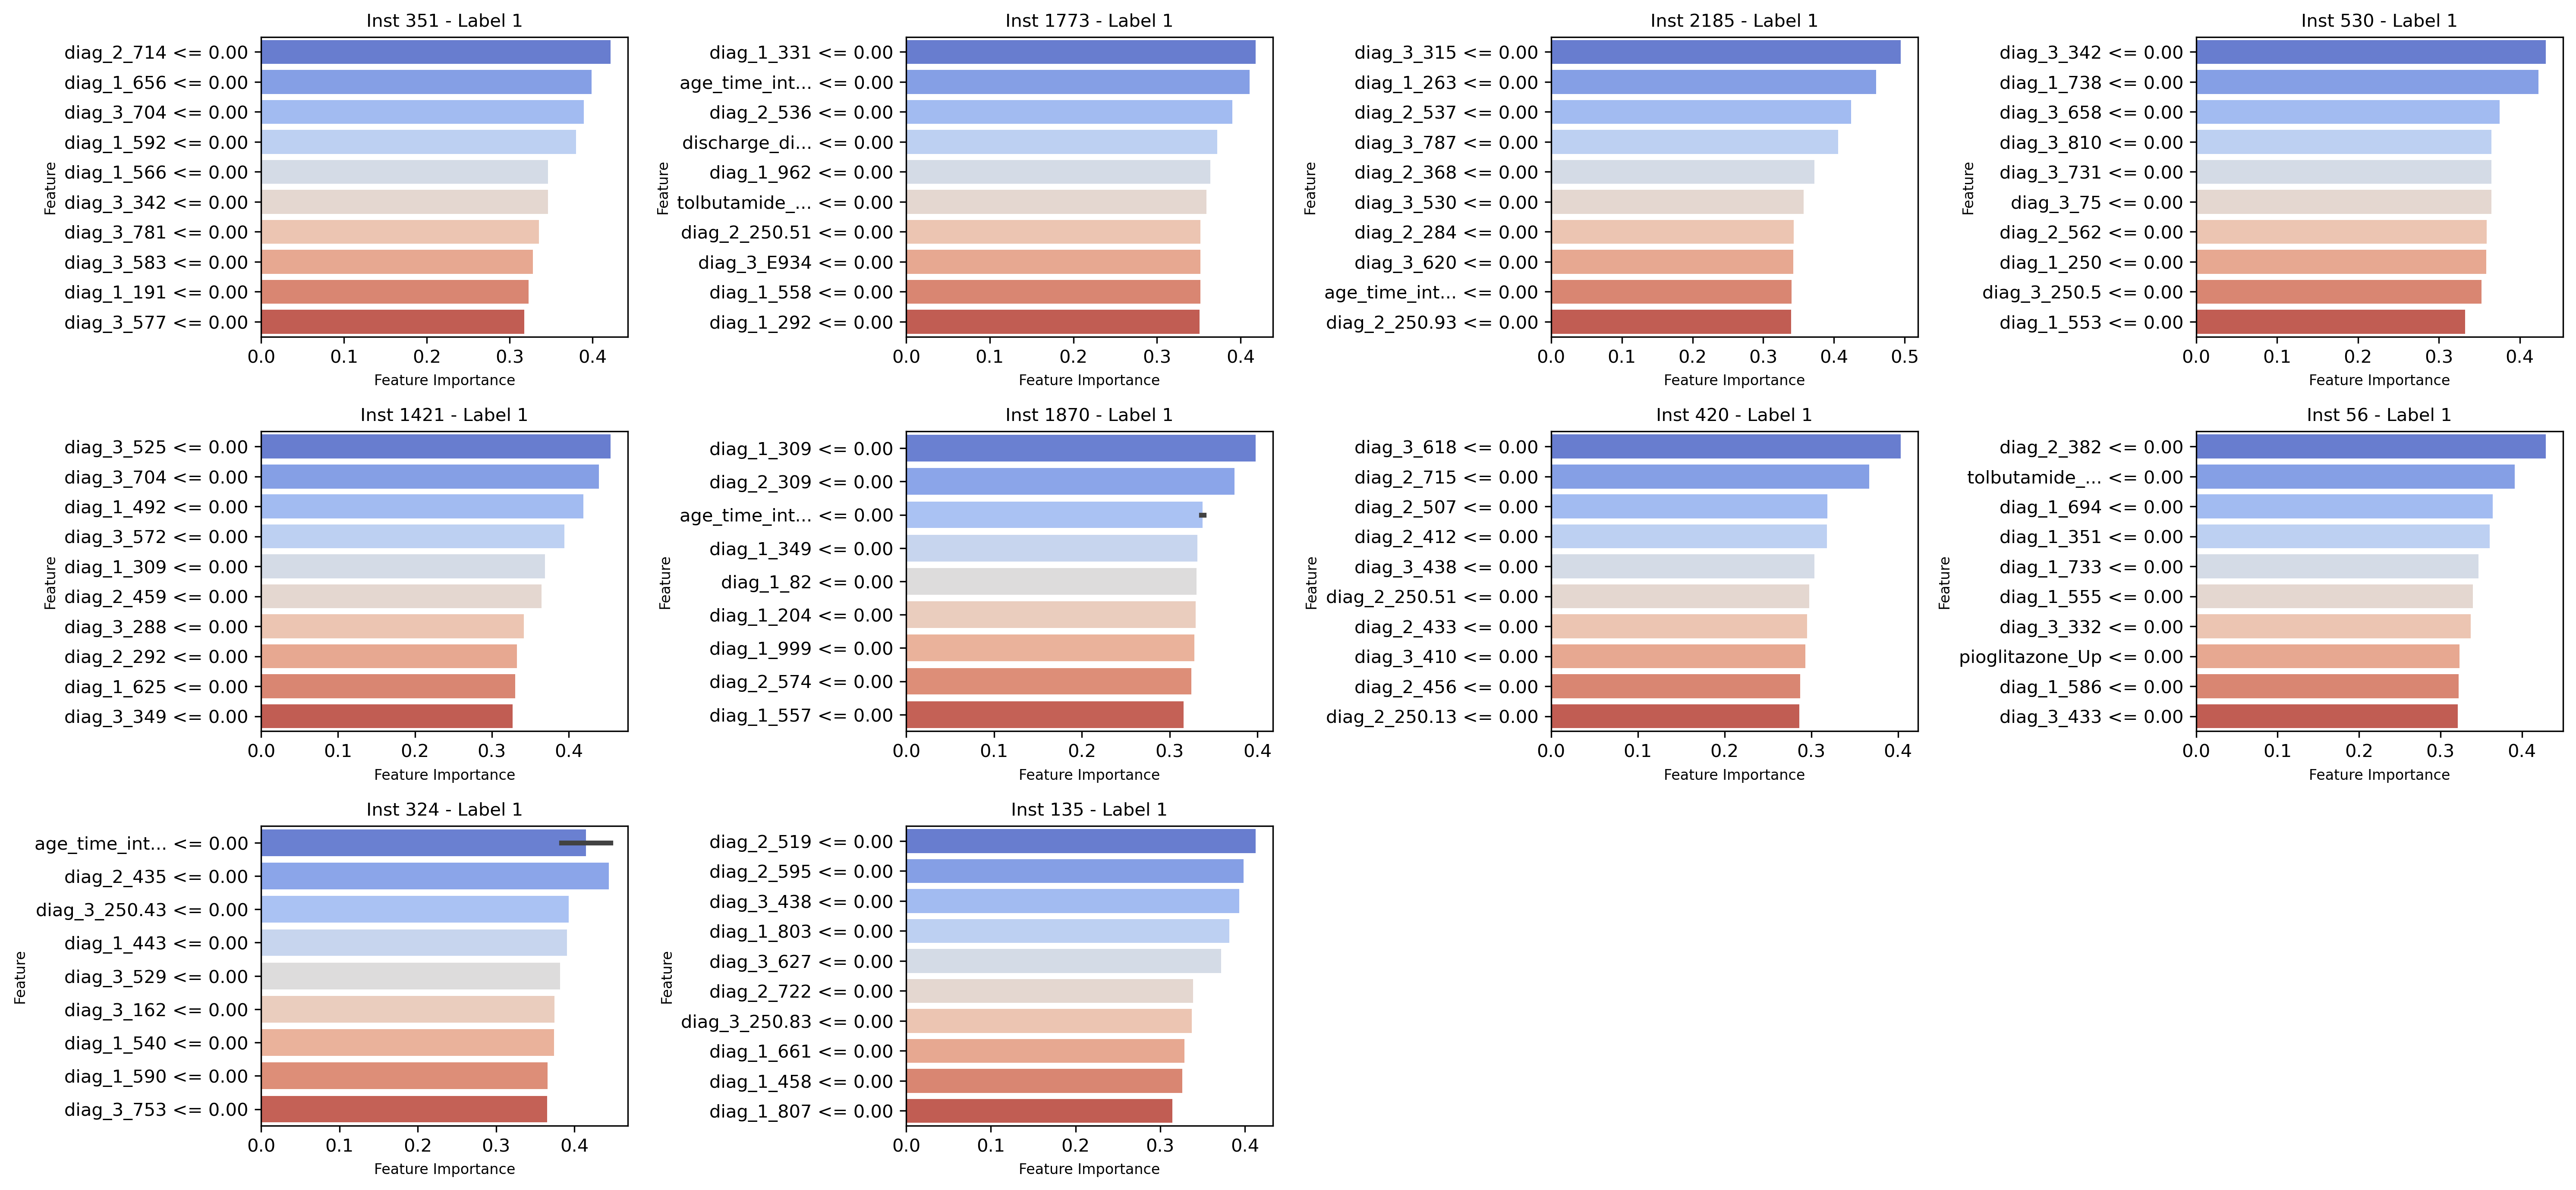

LIME explanations and combined visualization saved successfully.


In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lime.lime_tabular import LimeTabularExplainer

# Define the sample_idx variable by selecting a random sample of instances from the test set
sample_idx = np.random.choice(X_test.index, 10, replace=False)  # Adjust the sample size (10) as needed

# Initialize LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_train.values,
    mode="classification",
    feature_names=[name if len(name) <= 15 else name[:12] + '...' for name in X_train.columns],  # Truncate long feature names
    class_names=[f"Class {cls}" for cls in np.unique(y_train)],  # Simplified class names
    random_state=42
)

# Define function to predict using the SVM model
predict_fn = lambda x: best_svm_model.decision_function(x)  # Use decision_function for SVM

# Initialize a list to hold the explanation data
explanation_data = []

# Create a high DPI figure for sharpness
plt.figure(figsize=(20, 15), dpi=300)

# Initialize the subplot index
subplot_index = 1

# Number of rows and columns for subplots
num_rows = 5
num_cols = 4

# Select a random sample of instances from the test set
for idx in sample_idx:
    exp = explainer.explain_instance(
        X_test.loc[idx].values,
        predict_fn,
        num_features=len(X_test.columns),
        top_labels=None  # Show explanation for all classes predicted by the model
    )
    
    # Get explanations for all labels
    for label in exp.available_labels():
        # Get the explanation as a list of tuples (feature, importance)
        exp_list = exp.as_list(label=label)
        
        # Convert to DataFrame for easier handling
        df = pd.DataFrame(exp_list, columns=['Feature', 'Importance'])
        
        # Sort and select top 10 features by importance
        df_sorted = df.sort_values(by='Importance', ascending=False).head(10)
        
        # Append data to the list for saving later
        for feature, importance in df_sorted.itertuples(index=False):
            explanation_data.append({
                'Instance': idx,
                'Label': label,
                'Feature': feature,
                'Importance': importance
            })
        
        # Create subplot
        plt.subplot(num_rows, num_cols, subplot_index)  # Adjust the grid size as needed
        
        # Create a horizontal bar plot using seaborn
        sns.barplot(x='Importance', y='Feature', data=df_sorted, palette='coolwarm', orient='h')
        
        plt.title(f'Inst {idx} - Label {label}', fontsize=10)
        plt.xlabel('Feature Importance', fontsize=8)
        plt.ylabel('Feature', fontsize=8)
        
        # Increment subplot index
        subplot_index += 1
        
        # Stop if we reach the maximum number of subplots
        if subplot_index > num_rows * num_cols:
            break

# Adjust the layout to ensure nothing is clipped
plt.tight_layout()

# Save the combined plot to a file
plt.savefig('combined_lime_explanations.png')

# Show the plot
plt.show()

# Convert the explanation data to a DataFrame
explanation_df = pd.DataFrame(explanation_data)

# Save the explanation data to a CSV file for Power BI
explanation_df.to_csv('lime_explanations.csv', index=False)

print("LIME explanations and combined visualization saved successfully.")


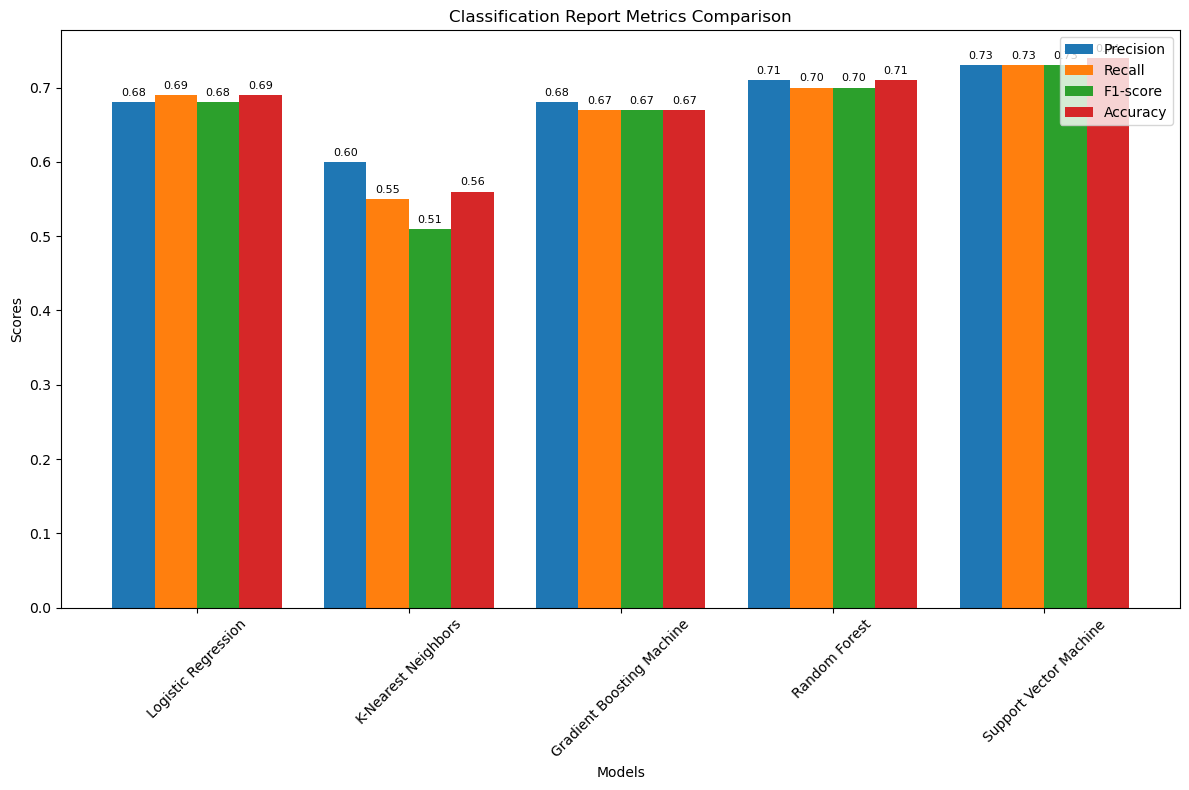

Metrics saved for Power BI.


In [100]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Updated metrics for each model based on the provided classification reports
models = ['Logistic Regression', 'K-Nearest Neighbors', 'Gradient Boosting Machine', 'Random Forest', 'Support Vector Machine']

# Metrics extracted from classification reports
precision = [0.68, 0.60, 0.68, 0.71, 0.73]  # Updated with accurate precision values
recall = [0.69, 0.55, 0.67, 0.70, 0.73]     # Updated with accurate recall values
f1_score = [0.68, 0.51, 0.67, 0.70, 0.73]   # Updated with accurate F1-score values
accuracy = [0.69, 0.56, 0.67, 0.71, 0.74]   # Updated with accurate accuracy values

# Number of models
num_models = len(models)

# Plotting the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.2
index = np.arange(num_models)

# Plot bars for precision, recall, f1-score, and accuracy
rects1 = ax.bar(index - 3*bar_width/2, precision, bar_width, label='Precision')
rects2 = ax.bar(index - bar_width/2, recall, bar_width, label='Recall')
rects3 = ax.bar(index + bar_width/2, f1_score, bar_width, label='F1-score')
rects4 = ax.bar(index + 3*bar_width/2, accuracy, bar_width, label='Accuracy')

# Adding labels, title, and custom x-axis tick labels
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Classification Report Metrics Comparison')
ax.set_xticks(index)
ax.set_xticklabels(models, rotation=45)
ax.legend()

# Function to attach labels
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

# Attach labels to each bar
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()

# Save the metrics to a DataFrame for Power BI
metrics_df = pd.DataFrame({
    'Model': models,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1_score,
    'Accuracy': accuracy
})

# Save the DataFrame to a CSV file for Power BI
metrics_df.to_csv('classification_report_metrics_comparison.csv', index=False)

print("Metrics saved for Power BI.")


Averaging Methods: The average precision, recall, and F1-score are calculated by aggregating the metrics for each class. Depending on whether a simple average (macro-average) or a weighted average (considering class sizes) is used, these overall metrics can differ from individual class metrics.

Class Imbalance: In many real-world problems, some classes may have more instances than others. Metrics for a specific class might be significantly different from the overall metrics if there is a large imbalance between the classes.

Accuracy Calculation: Accuracy is a straightforward calculation of the proportion of total correct predictions. It does not account for the performance across different classes separately but provides a general measure of how often the model is correct overall.

The overall average precision and recall might be calculated differently from these class-specific values, potentially resulting in different numbers due to the way averages are computed.

Grouped Bar Chart Analysis:
Support Vector Machine (SVM) emerges as the top performer across all metrics—accuracy, precision, recall, and F1-score—making it the most reliable model for predicting diabetic hospital readmission.
Random Forest and Gradient Boosting Machine (GBM) both demonstrate solid performance, but they fall slightly behind SVM, particularly in terms of accuracy and F1-score.
K-Nearest Neighbors (KNN) shows a strong recall for Class 1 (readmission within 30 days), indicating its ability to identify these cases effectively. However, it struggles with precision and overall accuracy, which suggests it may incorrectly classify other classes more frequently.
Logistic Regression offers a moderate performance, providing balanced results across the metrics, but it does not outperform the other models.
Conclusion:
SVM is the most effective model, delivering the highest accuracy with well-balanced precision and recall, especially for Class 1 (readmission within 30 days).
KNN stands out for its high recall for Class 1, but its lower precision and accuracy make it less reliable overall.
Random Forest and GBM are strong contenders but slightly less effective than SVM, particularly in overall accuracy and F1-score.
Logistic Regression provides consistent, middle-ground performance but is surpassed by the more advanced models in this analysis.

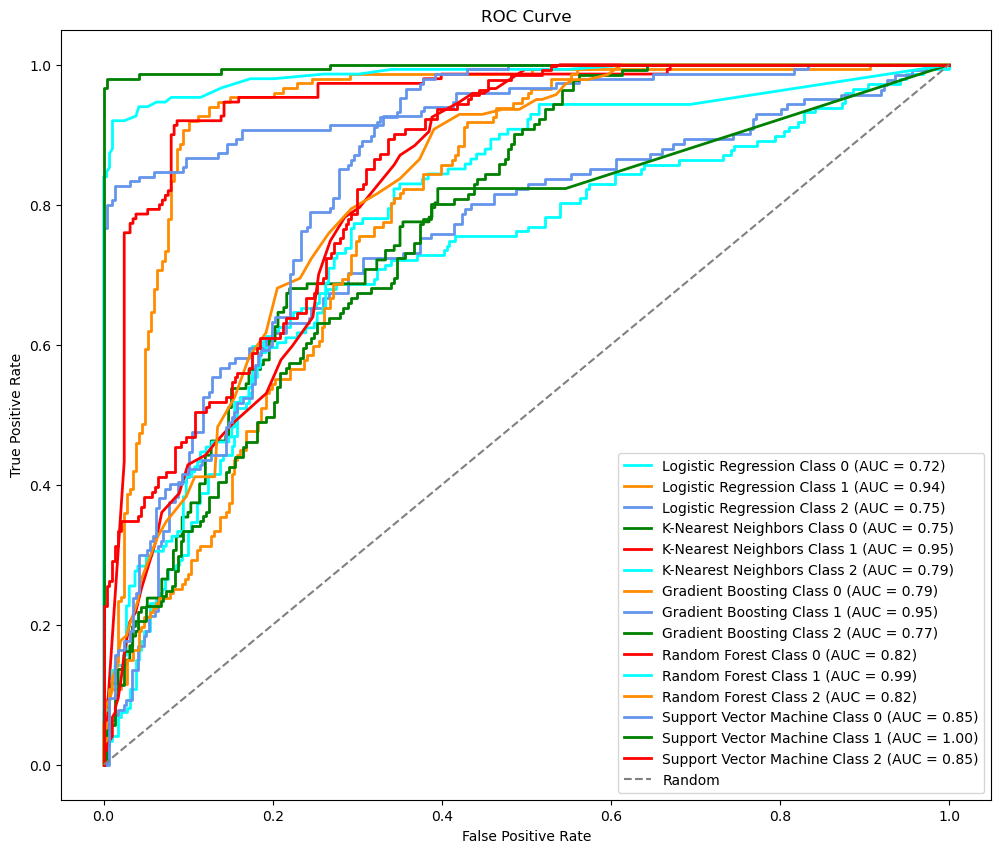

In [101]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.preprocessing import label_binarize
import numpy as np

def plot_roc_auc(models, X_test, y_test):
    plt.figure(figsize=(12, 10))
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])
    
    # Binarize the labels for multi-class ROC curves
    unique_classes = np.unique(y_test)
    y_test_bin = label_binarize(y_test, classes=unique_classes)

    for name, model in models.items():
        try:
            if hasattr(model, 'predict_proba'):
                y_score = model.predict_proba(X_test)
                
                # Check if y_score has the correct shape
                if y_score.shape[1] != y_test_bin.shape[1]:
                    print(f"Error: Shape mismatch for model '{name}'. Expected number of classes in y_score is {y_test_bin.shape[1]}, but got {y_score.shape[1]}.")
                    continue

                # Plot ROC curve for each class
                for i in range(y_test_bin.shape[1]):
                    if np.any(y_test_bin[:, i]):  # Ensure there are samples for this class
                        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
                        roc_auc = auc(fpr, tpr)
                        plt.plot(fpr, tpr, color=next(colors), lw=2, label=f'{name} Class {unique_classes[i]} (AUC = {roc_auc:.2f})')
                    else:
                        print(f"Skipping ROC plot for {name} Class {unique_classes[i]} due to no samples in y_test_bin.")
            else:
                print(f"Model '{name}' does not support probability prediction. Skipping ROC curve plot.")

        except Exception as e:
            print(f"Error plotting ROC for model '{name}': {str(e)}")

    plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# Define your models for plotting
models_for_plotting = {
    'Logistic Regression': best_lr_model,
    'K-Nearest Neighbors': best_knn_model,
    'Gradient Boosting': gbm_classifier,
    'Random Forest': best_rf_classifier,
    'Support Vector Machine': best_svm_model
}

# Call the function to plot ROC AUC curves
plot_roc_auc(models_for_plotting, X_test, y_test)


Logistic Regression
Class 0 (AUC = 0.72): Indicates moderate performance in distinguishing Class 0 from other classes. The lower AUC suggests that Class 0 may be less well-represented or more challenging to classify compared to other classes.
Class 1 (AUC = 0.94): Shows excellent performance, with a high AUC score indicating that Class 1 is well-separated from the other classes.
Class 2 (AUC = 0.75): Demonstrates a moderate ability to distinguish Class 2, similar to Class 0, with performance being decent but not as strong as Class 1.
K-Nearest Neighbors (KNN)
Class 0 (AUC = 0.75): Reflects a good ability to identify Class 0, suggesting KNN performs reasonably well for this class.
Class 1 (AUC = 0.95): Exhibits excellent performance, consistent with Logistic Regression for Class 1, indicating strong separation from other classes.
Class 2 (AUC = 0.79): Shows lower performance compared to other models, suggesting that Class 2 is less distinct for KNN compared to Classes 0 and 1.
Gradient Boosting
Class 0 (AUC = 0.79): Indicates decent performance for Class 0. Gradient Boosting performs better for Class 0 than KNN but does not outperform Random Forest.
Class 1 (AUC = 0.95): Demonstrates excellent performance, similar to Logistic Regression and KNN for Class 1.
Class 2 (AUC = 0.77): Provides good performance for Class 2 but not as strong as Class 1.
Random Forest
Class 0 (AUC = 0.82): Shows strong performance, with Random Forest consistently performing well across all classes.
Class 1 (AUC = 0.99): Achieves outstanding performance, with nearly perfect separation for Class 1, indicating very high accuracy for this class.
Class 2 (AUC = 0.82): Provides good performance, similar to Class 0, indicating balanced performance across classes.
Support Vector Machine (SVM)
Class 0 (AUC = 0.85): Demonstrates strong performance in distinguishing Class 0, with robust separation from other classes.
Class 1 (AUC = 1.00): Achieves perfect performance for Class 1, indicating flawless classification.
Class 2 (AUC = 0.85): Exhibits strong performance, comparable to Class 0, suggesting consistent ability to distinguish this class.
General Interpretation
Class-Specific Performance:

Class 1: Consistently shows the highest AUC scores across all models, indicating it is the most distinct or best-represented class in the dataset.
Class 0: Generally performs well across most models, though slightly less effectively than Class 1.
Class 2: Displays the most variation in performance. KNN struggles the most with Class 2, suggesting that additional features or model tuning might be necessary to enhance performance for this class.
Model Performance:

Support Vector Machine (SVM): Demonstrates the best overall performance, particularly with its perfect classification of Class 1 and strong performance for other classes.
Random Forest: Also performs strongly, especially for Class 1, achieving near-perfect AUC scores.
Logistic Regression: Shows varied performance, excelling with Class 1 but with more moderate results for other classes.
Gradient Boosting and KNN: Provide good performance, but generally fall short compared to Random Forest and SVM, particularly with Class 2 in KNN.
Summary
Best Model: Support Vector Machine (SVM) is identified as the top-performing model, especially with its perfect classification of Class 1.
Best Performing Class: Class 1 is consistently well-differentiated across all models, indicating that it is the most easily identifiable class.
Areas for Improvement: Class 2 presents challenges, particularly for KNN, suggesting that model enhancements or feature engineering may be needed to improve classification accuracy for this class.